In [2]:
import sys
import os

# Add the root of your project to sys.path
project_root = os.path.abspath('..')  # or '.' if your notebook is in root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.eda import univariate_categorical_analysis, univariate_numerical_analysis

In [4]:
df = pd.read_csv('./../data/processed/After_Cleaning_13.csv')

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.head()

Name                             MainCamera_Cameraspecs  \
0  Microsoft Lumia 1330                                          14 MP, AF   
1      Meizu PRO 5 mini                                   16 MP, f/2.2, AF   
2    ZTE Blade 11 Prime  16 MP, (wide), AF,\n8 MP, f/2.2, 120˚, 16mm (u...   
3       Umidigi One Max          12 MP, f/2.0, PDAF,\n5 MP, f/2.4, (depth)   
4          Coolpad 3632                                           5 MP, AF   

                    SelfieCamera_Cameraspecs SelfieCamera_Features  \
0                                       5 MP           1080p@30fps   
1                                5 MP, f/2.0                   NaN   
2                                       8 MP           1080p@30fps   
3  16 MP, f/2.2, 26mm (wide), 1/3.06", 1.0µm           1080p@30fps   
4                                       2 MP                  720p   

  Sound_3.5mmjack                                         COMMS_WLAN  \
0             Yes                    WLANWi-Fi 802.11 b/g/n, hotspot   
1             Yes  WLANWi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi ...   
2             Yes  WLANWi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi ...   
3             Yes             WLANWi-Fi 802.11 a/b/g/n, Wi-Fi Direct   
4             Yes                             WLANWi-Fi 802.11 b/g/n   

            COMMS_Bluetooth COMMS_NFC COMMS_Radio       COMMS_USB  \
0  4.0, A2DP, EDR, LE, aptX        No    FM radio    microUSB 2.0   
1             4.1, A2DP, LE        No          No    microUSB 2.0   
2             5.1, A2DP, LE        No          No  USB Type-C 2.0   
3             4.1, A2DP, LE       Yes          No  USB Type-C 2.0   
4                 4.0, A2DP        No    FM radio    microUSB 2.0   

                             Colors      Brand           Model  has_GSM  \
0         Yellow, white, black, red  Microsoft      Lumia 1330      1.0   
1  Gray, Gold, Silver, Black/Silver      Meizu      PRO 5 mini      1.0   
2                          Sky Blue        ZTE  Blade 11 Prime      1.0   
3      Twilight Color, Carbon Fiber    Umidigi         One Max      1.0   
4                              Gold    Coolpad            3632      1.0   

   has_UMTS  has_HSPA  has_LTE  has_5G  has_CDMA  has_CDMA2000  has_EVDO  \
0       0.0       1.0      1.0     0.0       0.0           0.0       0.0   
1       0.0       1.0      1.0     0.0       0.0           0.0       0.0   
2       0.0       1.0      1.0     0.0       0.0           0.0       0.0   
3       0.0       1.0      1.0     0.0       1.0           0.0       1.0   
4       0.0       1.0      1.0     0.0       0.0           0.0       0.0   

   number_of_sims  number_of_2g_bands  aws_support  number_of_3g_bands  \
0             1.0                 4.0          0.0                 3.0   
1             2.0                 4.0          0.0                 1.0   
2             2.0                 4.0          0.0                 3.0   
3             2.0                 4.0          1.0                 5.0   
4             2.0                 3.0          0.0                 2.0   

  is_foldable_phone  thickness  has_Nano_SIM  has_Micro_SIM  has_Mini_SIM  \
0             False        NaN           0.0            1.0           0.0   
1             False        NaN           1.0            0.0           0.0   
2             False        8.7           1.0            0.0           0.0   
3             False        8.4           1.0            0.0           0.0   
4             False        NaN           0.0            0.0           0.0   

   has_eSIM  has_SIM_Type_Specified  has_memory_card  memory_type_microSDXC  \
0       0.0                     1.0            False                  False   
1       0.0                     1.0             True                   True   
2       0.0                     1.0             True                   True   
3       0.0                     1.0             True                   True   
4       0.0                     0.0             True                  

In [7]:
columnsToExcludeForEDA = ['MainCamera_Cameraspecs', 'SelfieCamera_Cameraspecs', 'SelfieCamera_Features', 'COMMS_WLAN', 'COMMS_Bluetooth', 'Colors', 'camera_has_led_flash', 'COMMS_USB', 'COMMS_NFC', 'COMMS_Radio', 'Parsed_Camera_Features']

In [8]:
df = df.drop(columns = columnsToExcludeForEDA)

In [9]:
df.shape

(5917, 70)

In [10]:
category_columns = ['Sound_3.5mmjack', 'Brand', 'has_GSM', 'has_UMTS', 'has_HSPA', 'has_LTE', 'has_5G', 'has_CDMA', 'has_CDMA2000', 'has_EVDO', 'number_of_sims', 'number_of_2g_bands', 'aws_support', 'number_of_3g_bands', 'is_foldable_phone', 'has_Nano_SIM', 'has_Micro_SIM', 'has_Mini_SIM', 'has_eSIM', 'has_SIM_Type_Specified', 'has_memory_card', 'memory_type_microSDXC', 'memory_type_microSDHC', 'memory_type_microSD', 'memory_type_SD', 'memory_type_Nano_Memory', 'Battery_Is_removable', 'Battery_Type_Lithium', 'Sound_has_stereo_speakers', 'camera_hdr', 'camera_laser_af', 'camera_panorama', 'GPU_company', 'Number_of_cores', 'CPU_Brand', 'Is_OS_Upgradable', 'os_version', 'Resolution_Width', 'Resolution_Height', 'has_8k',	'has_4k',	'has_1440p',	'has_1080p',	'has_720p',	'has_480p',	'has_EIS',	'has_HDR',	'has_stereo',	'has_dolby_vision',	'has_OIS'	,'max_resolution',	'max_FPS',	'ram', 'number_of_camera_features',	'maincamera_mp',	'selfiecamera_mp',	'latest_wifi_version',	'Bluetooth_version',	'has_nfc',	'USB_Type']

In [11]:
for col in category_columns:
  df[col] = df[col].astype('category')

#### Temporarily fixing the data types of some columns to analyze


In [12]:
df = df[df['PPI'].str.isnumeric() == True]
df['PPI'] = df['PPI'].astype('int')
df['Resolution_Height'] = df['Resolution_Height'].astype('int')
df['Resolution_Width'] = df['Resolution_Width'].astype('int')

#### Getting the Numerical and Categorical Columns


In [13]:
numerical_cols = df.select_dtypes(include = ['int64', 'float64'])
categorical_cols = df.select_dtypes(include = ['category'])

#### Analyzing Numerical Columns


📊 Analyzing Numerical Column: **thickness**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 150 (2.54%)
🔹 Unique Values: 163

🔹 Descriptive Statistics (excluding NaNs):
count    5764.000000
mean        8.849967
std         2.064094
min         0.000000
25%         7.900000
50%         8.400000
75%         9.000000
max        27.500000
Name: thickness, dtype: float64

🔹 Outliers Detected (IQR): 545
    - Lower bound: 6.25
    - Upper bound: 10.65


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


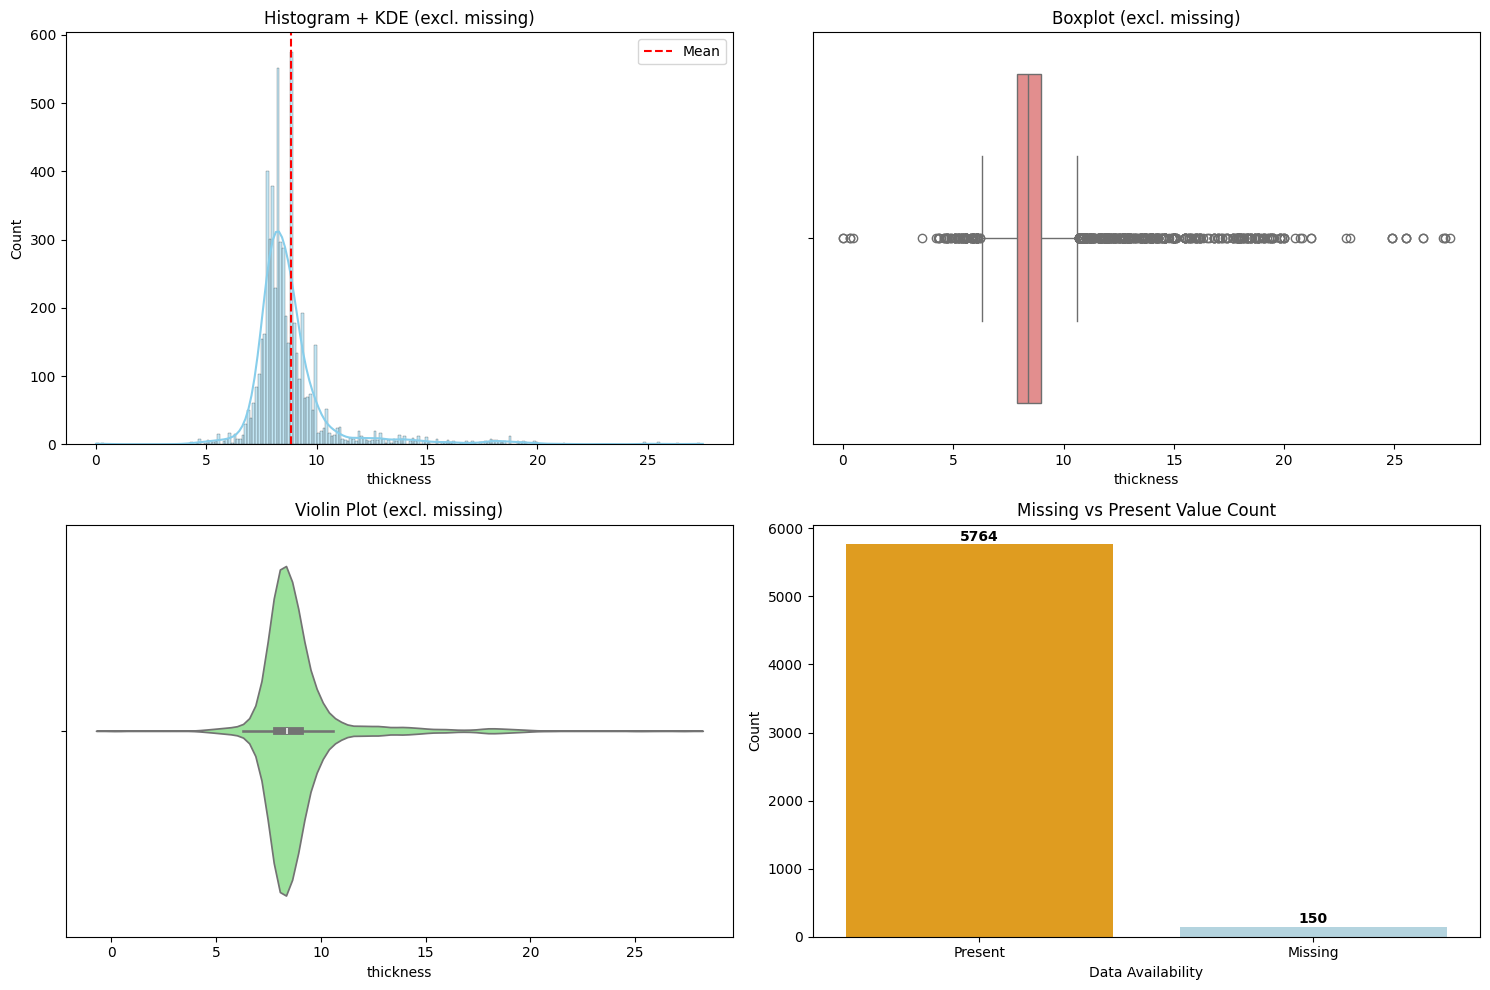

📊 Analyzing Numerical Column: **Battery_Capacity**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 52 (0.88%)
🔹 Unique Values: 451

🔹 Descriptive Statistics (excluding NaNs):
count     5862.000000
mean      4415.941658
std       1929.970550
min        770.000000
25%       3142.500000
50%       4500.000000
75%       5000.000000
max      33280.000000
Name: Battery_Capacity, dtype: float64

🔹 Outliers Detected (IQR): 216
    - Lower bound: 356.25
    - Upper bound: 7786.25


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


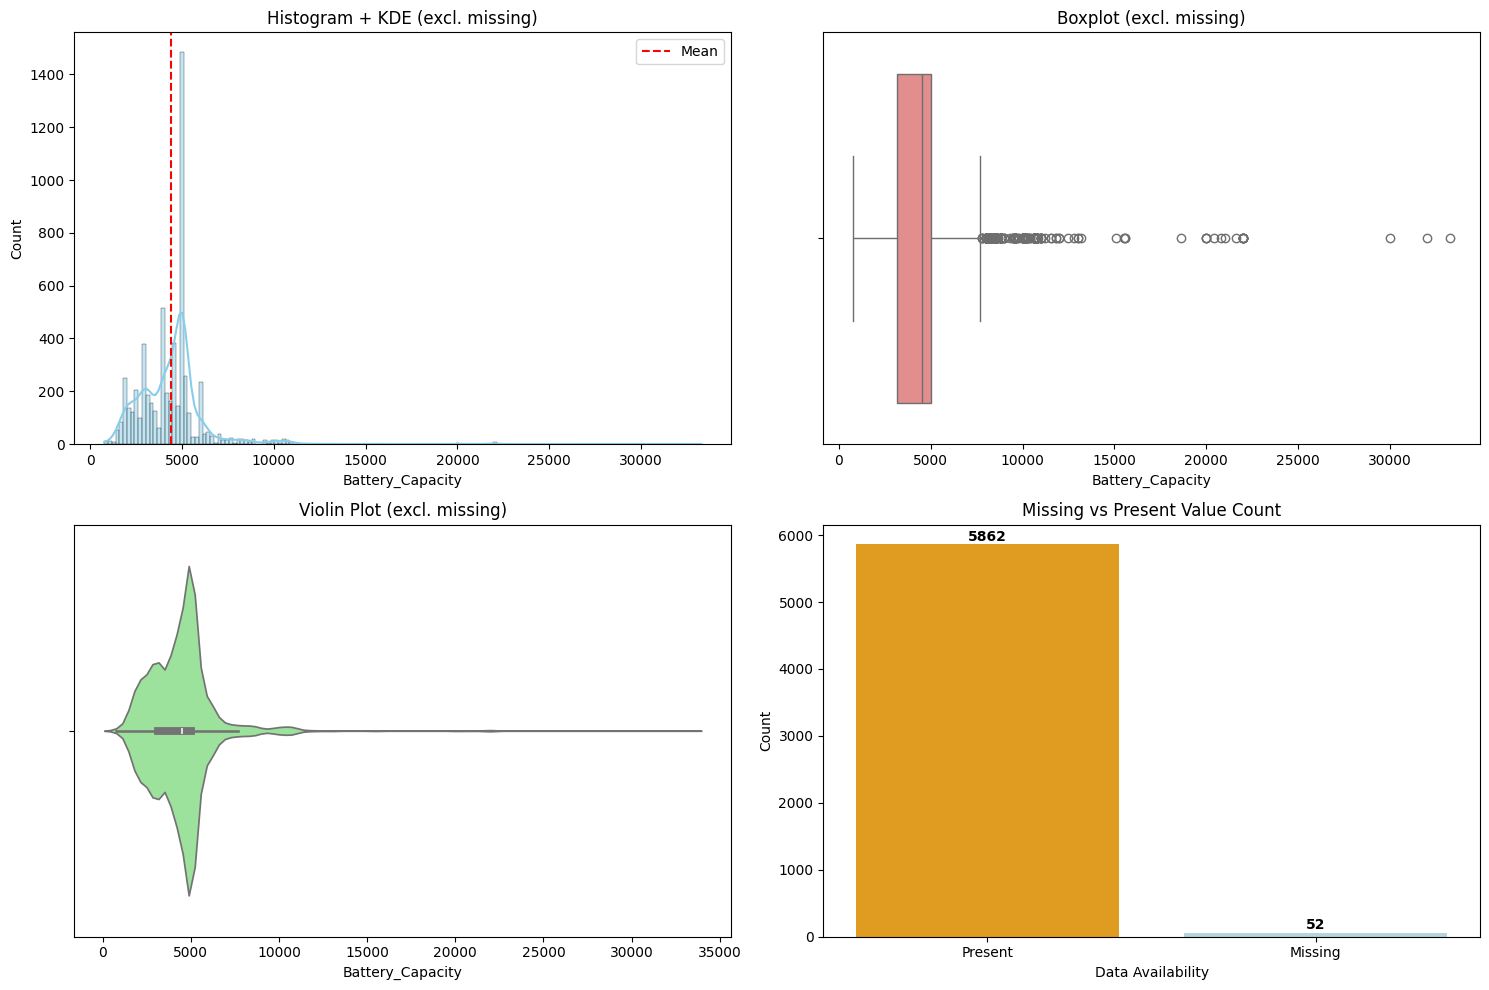

📊 Analyzing Numerical Column: **CPU_Transistor_Size**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 666 (11.26%)
🔹 Unique Values: 18

🔹 Descriptive Statistics (excluding NaNs):
count    5248.000000
mean        0.119412
std         0.073299
min         0.015385
25%         0.071429
50%         0.083333
75%         0.166667
max         0.333333
Name: CPU_Transistor_Size, dtype: float64

🔹 Outliers Detected (IQR): 61
    - Lower bound: -0.07
    - Upper bound: 0.31


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


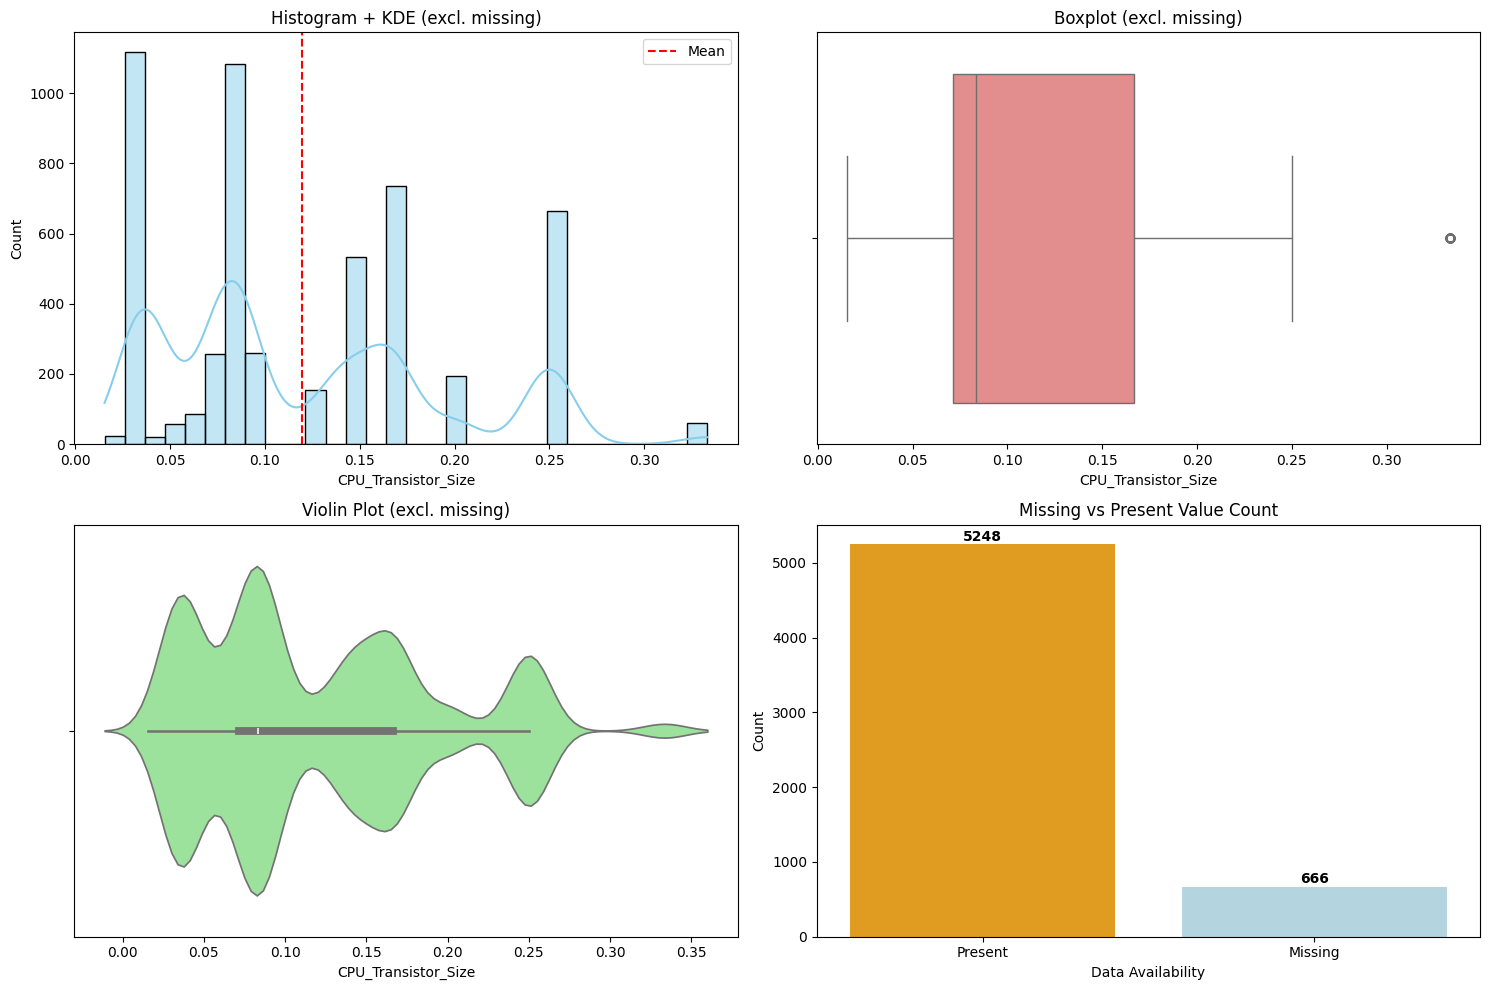

📊 Analyzing Numerical Column: **Resolution_Width**
--------------------------------------------------
🔹 Data Type: int64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 93

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean      963.080656
std       303.320286
min       128.000000
25%       720.000000
50%      1080.000000
75%      1080.000000
max      3840.000000
Name: Resolution_Width, dtype: float64

🔹 Outliers Detected (IQR): 125
    - Lower bound: 180.00
    - Upper bound: 1620.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


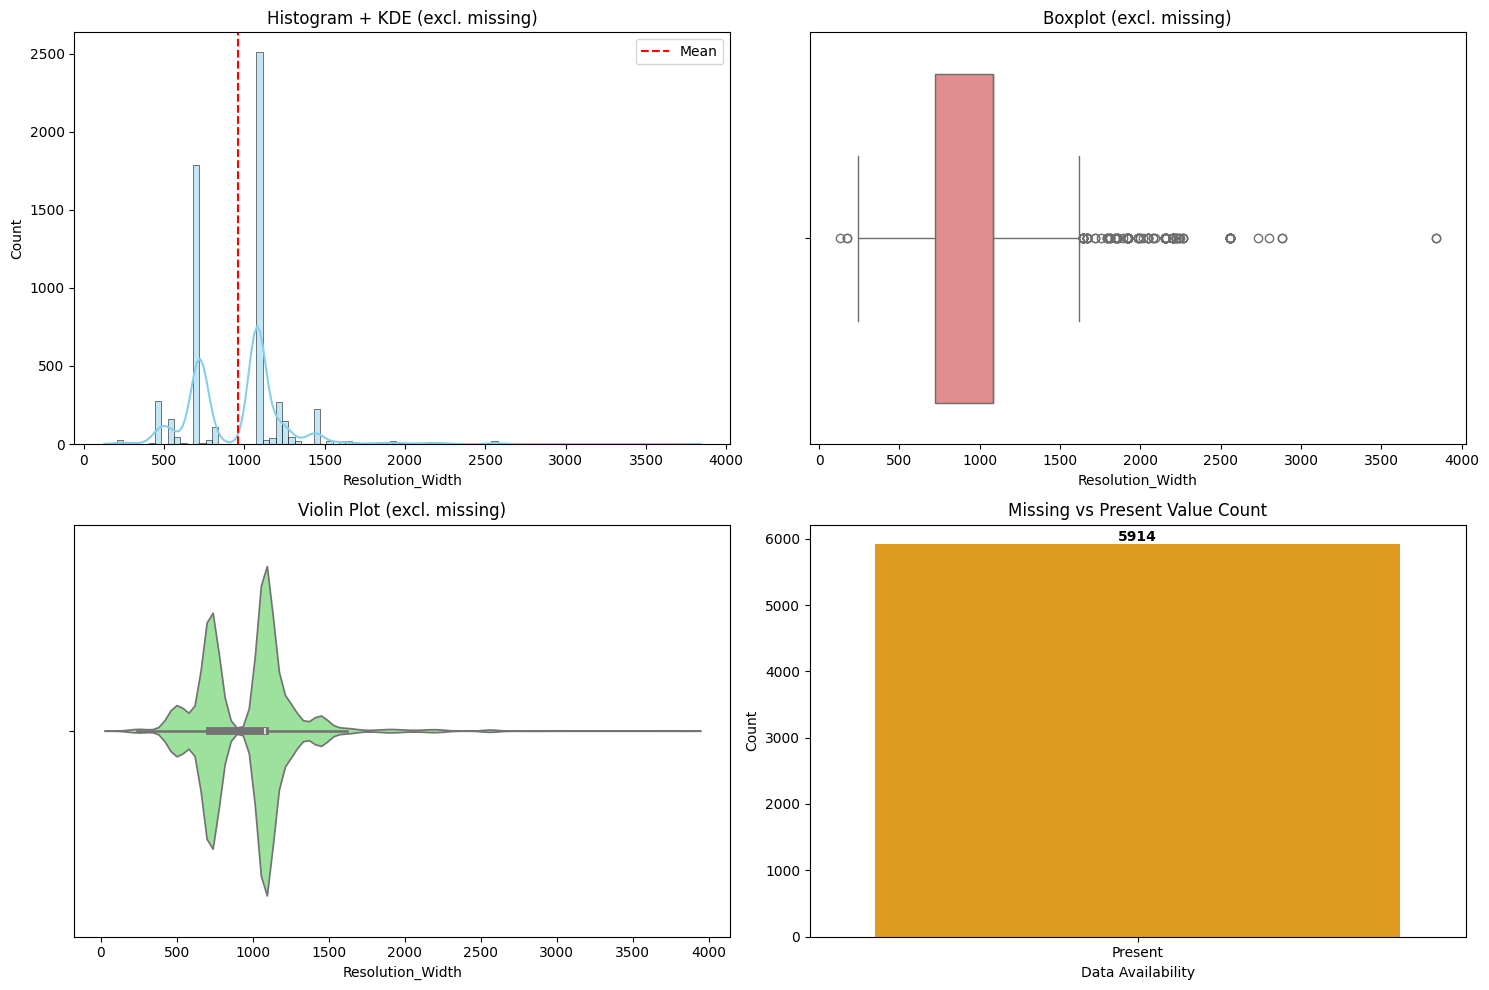

📊 Analyzing Numerical Column: **Resolution_Height**
--------------------------------------------------
🔹 Data Type: int64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 142

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean     1940.712885
std       597.919816
min       160.000000
25%      1520.000000
50%      1920.000000
75%      2400.000000
max      4320.000000
Name: Resolution_Height, dtype: float64

🔹 Outliers Detected (IQR): 15
    - Lower bound: 200.00
    - Upper bound: 3720.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


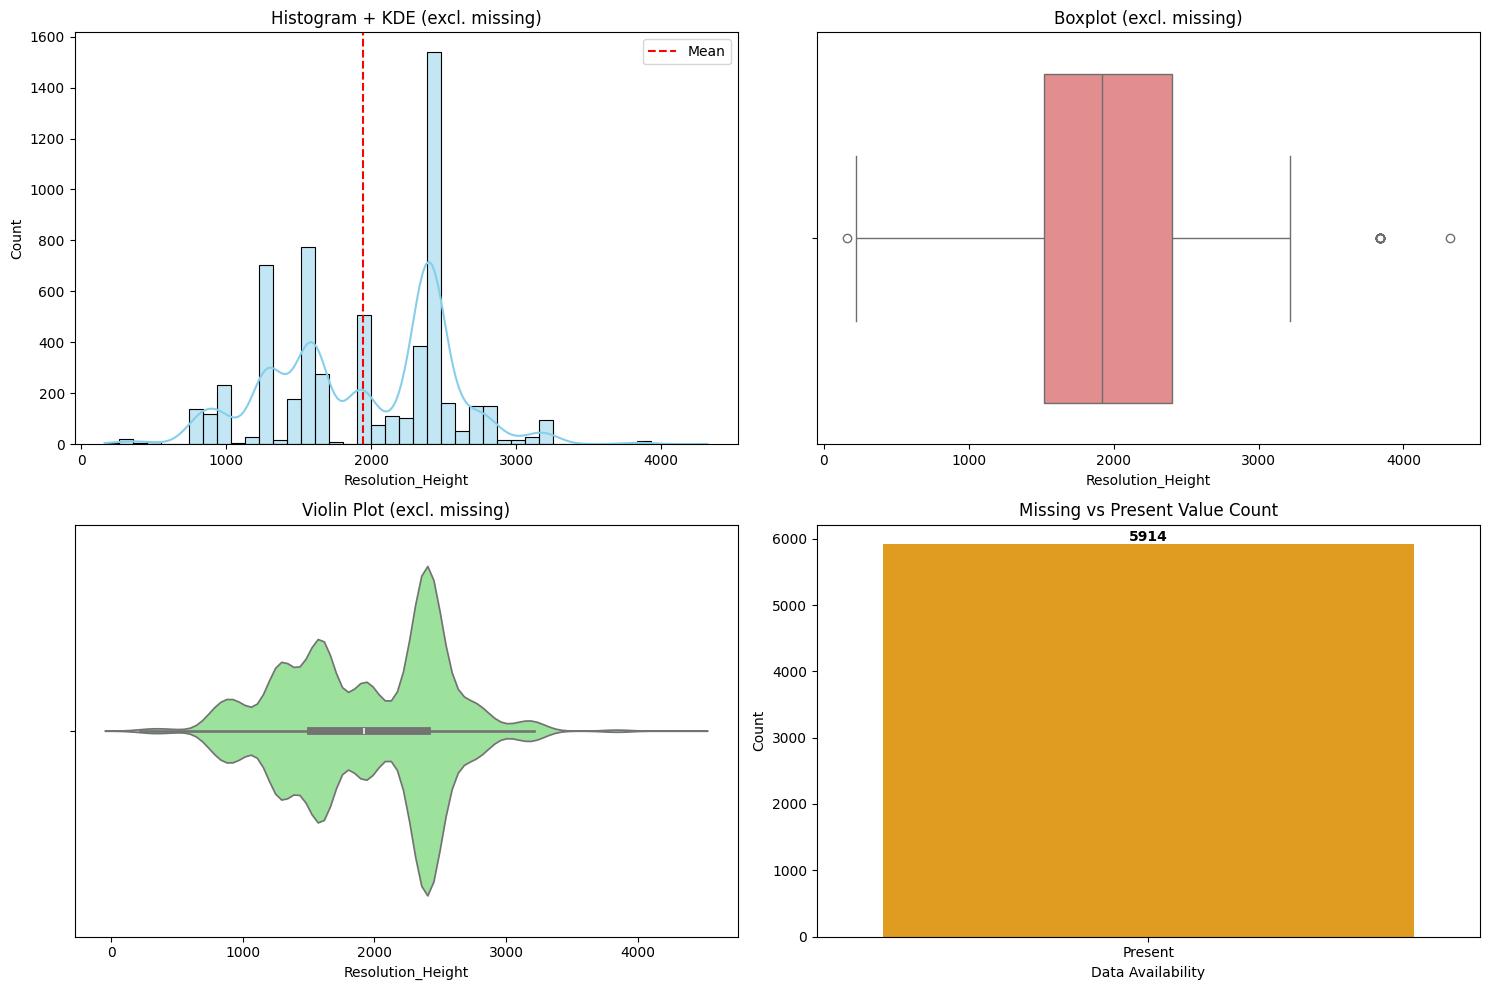

📊 Analyzing Numerical Column: **PPI**
--------------------------------------------------
🔹 Data Type: int64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 296

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean      344.583531
std        89.679899
min        73.000000
25%       269.000000
50%       388.000000
75%       402.000000
max       847.000000
Name: PPI, dtype: float64

🔹 Outliers Detected (IQR): 16
    - Lower bound: 69.50
    - Upper bound: 601.50


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


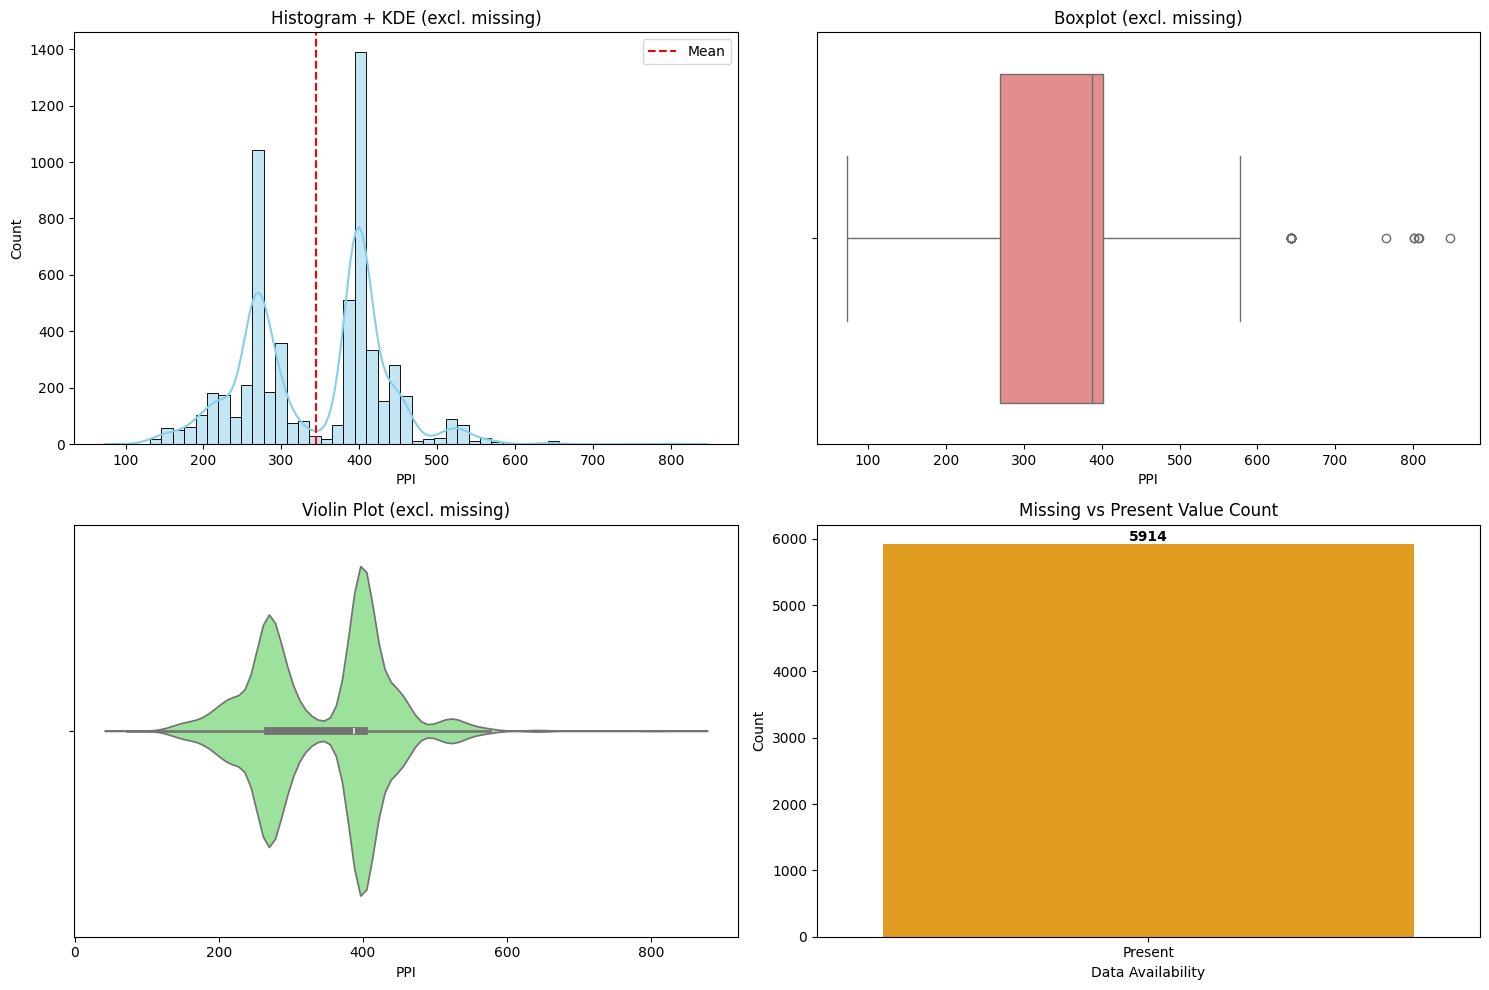

📊 Analyzing Numerical Column: **Display_Size**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 192

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean        6.320372
std         1.252421
min         2.000000
25%         5.500000
50%         6.500000
75%         6.700000
max        14.600000
Name: Display_Size, dtype: float64

🔹 Outliers Detected (IQR): 310
    - Lower bound: 3.70
    - Upper bound: 8.50


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


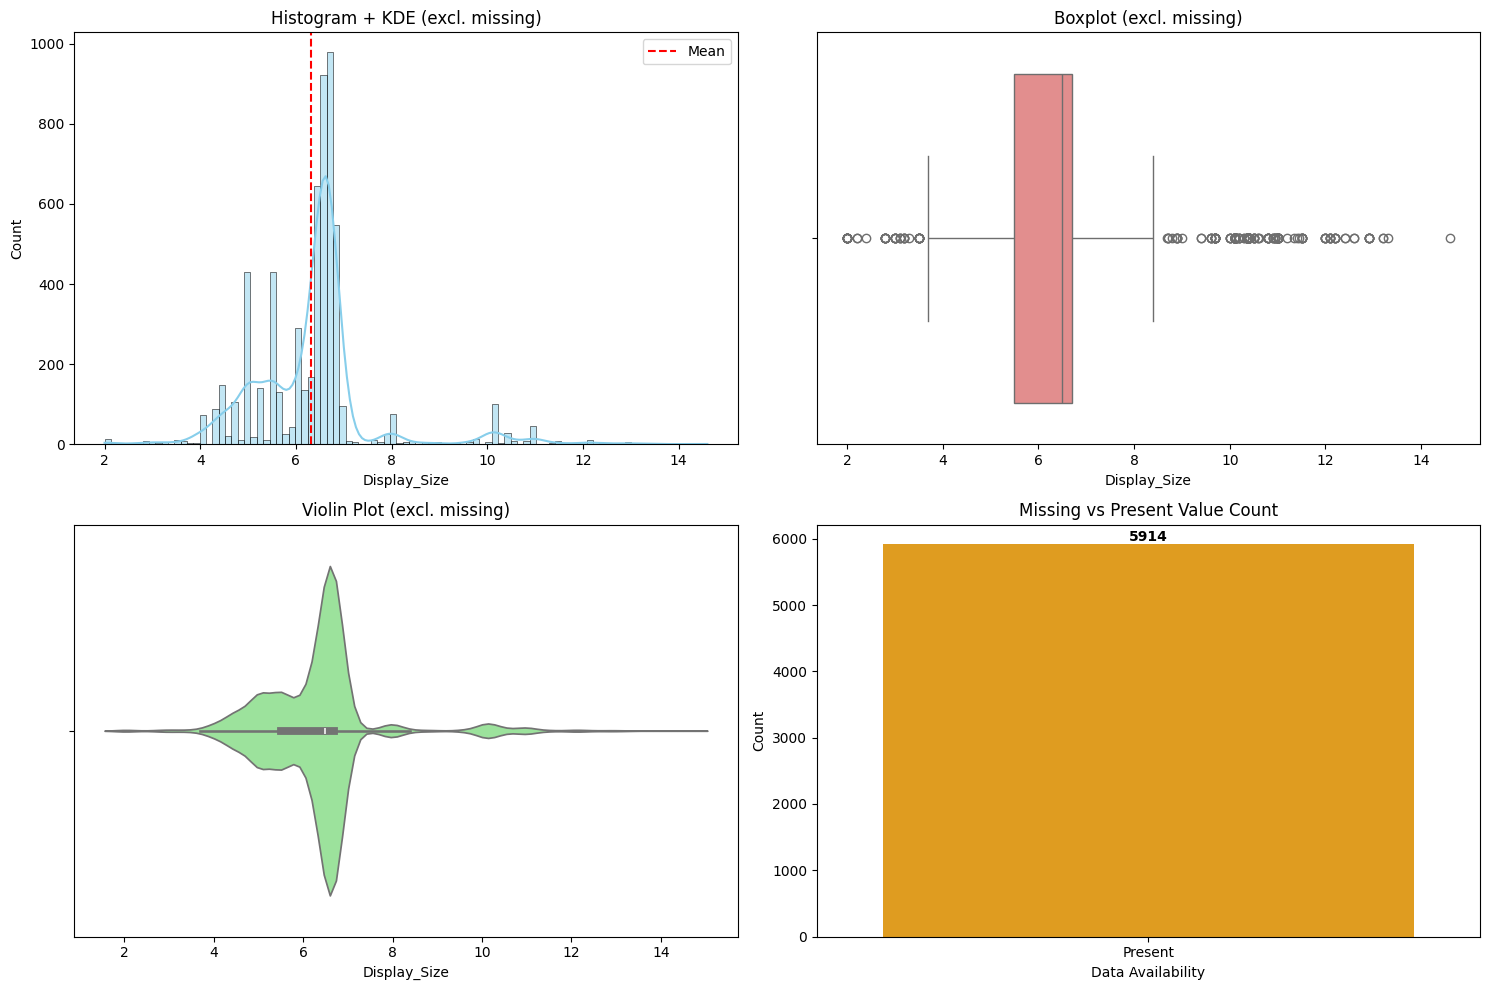

📊 Analyzing Numerical Column: **Price_In_Dollars**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 575 (9.72%)
🔹 Unique Values: 1047

🔹 Descriptive Statistics (excluding NaNs):
count    5339.000000
mean      318.479904
std       309.585988
min        32.400000
25%       162.000000
50%       237.600000
75%       367.200000
max      9999.990000
Name: Price_In_Dollars, dtype: float64

🔹 Outliers Detected (IQR): 418
    - Lower bound: -145.80
    - Upper bound: 675.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


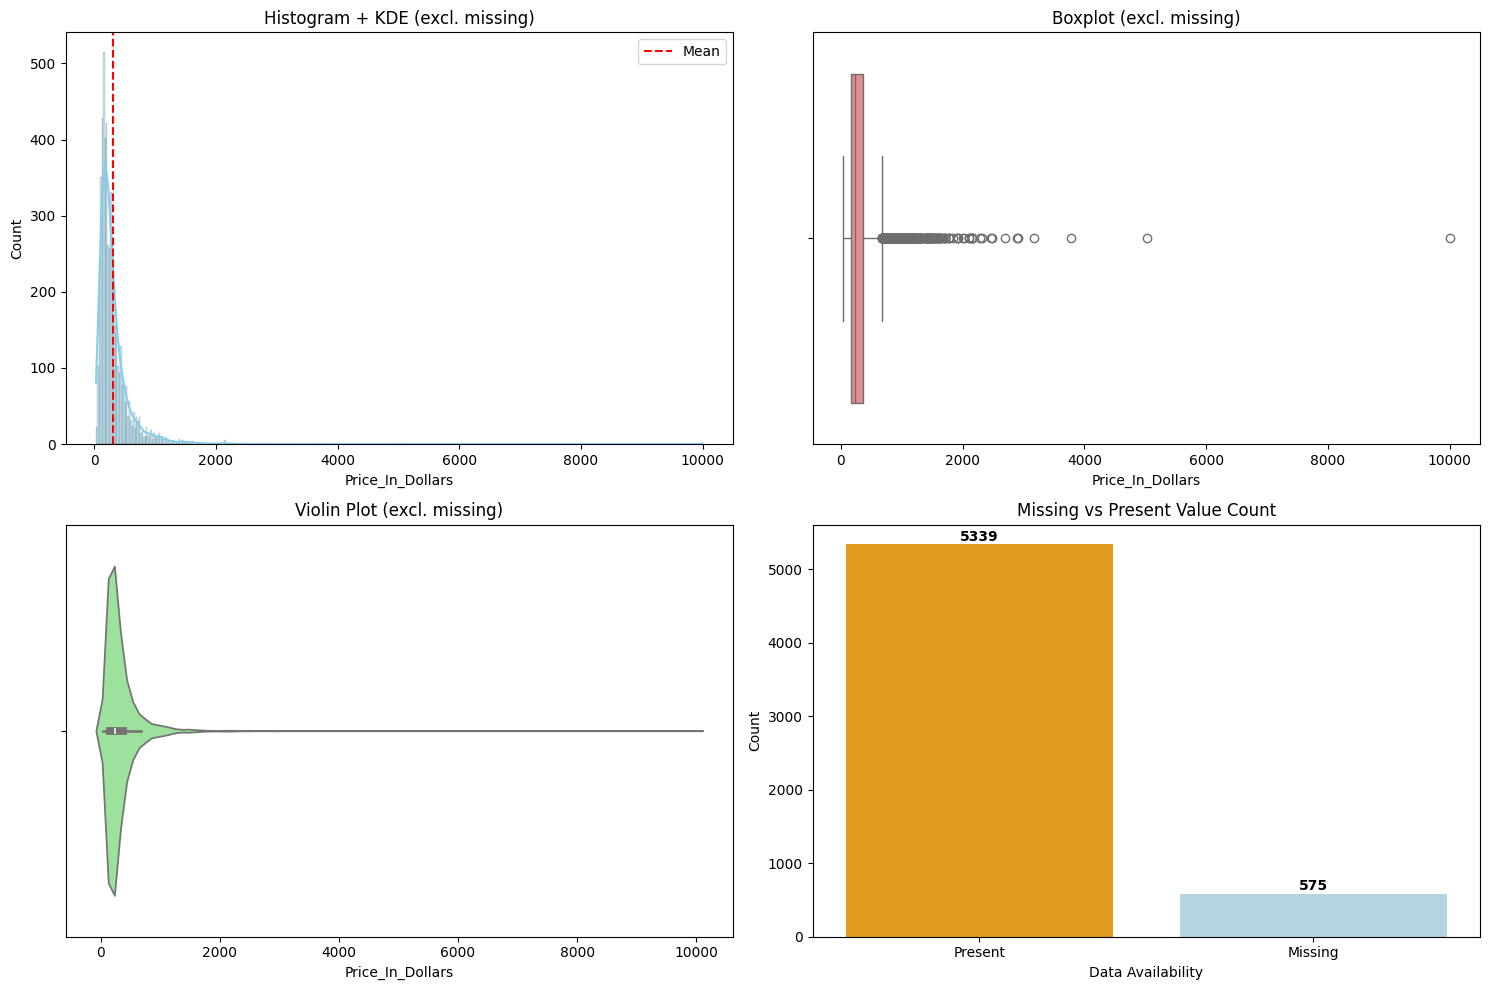

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


📊 Analyzing Numerical Column: **Total_Pixels**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 197

🔹 Descriptive Statistics (excluding NaNs):
count    5.914000e+03
mean     2.009501e+06
std      1.080114e+06
min      2.048000e+04
25%      1.094400e+06
50%      2.304000e+06
75%      2.592000e+06
max      9.331200e+06
Name: Total_Pixels, dtype: float64

🔹 Outliers Detected (IQR): 53
    - Lower bound: -1152000.00
    - Upper bound: 4838400.00


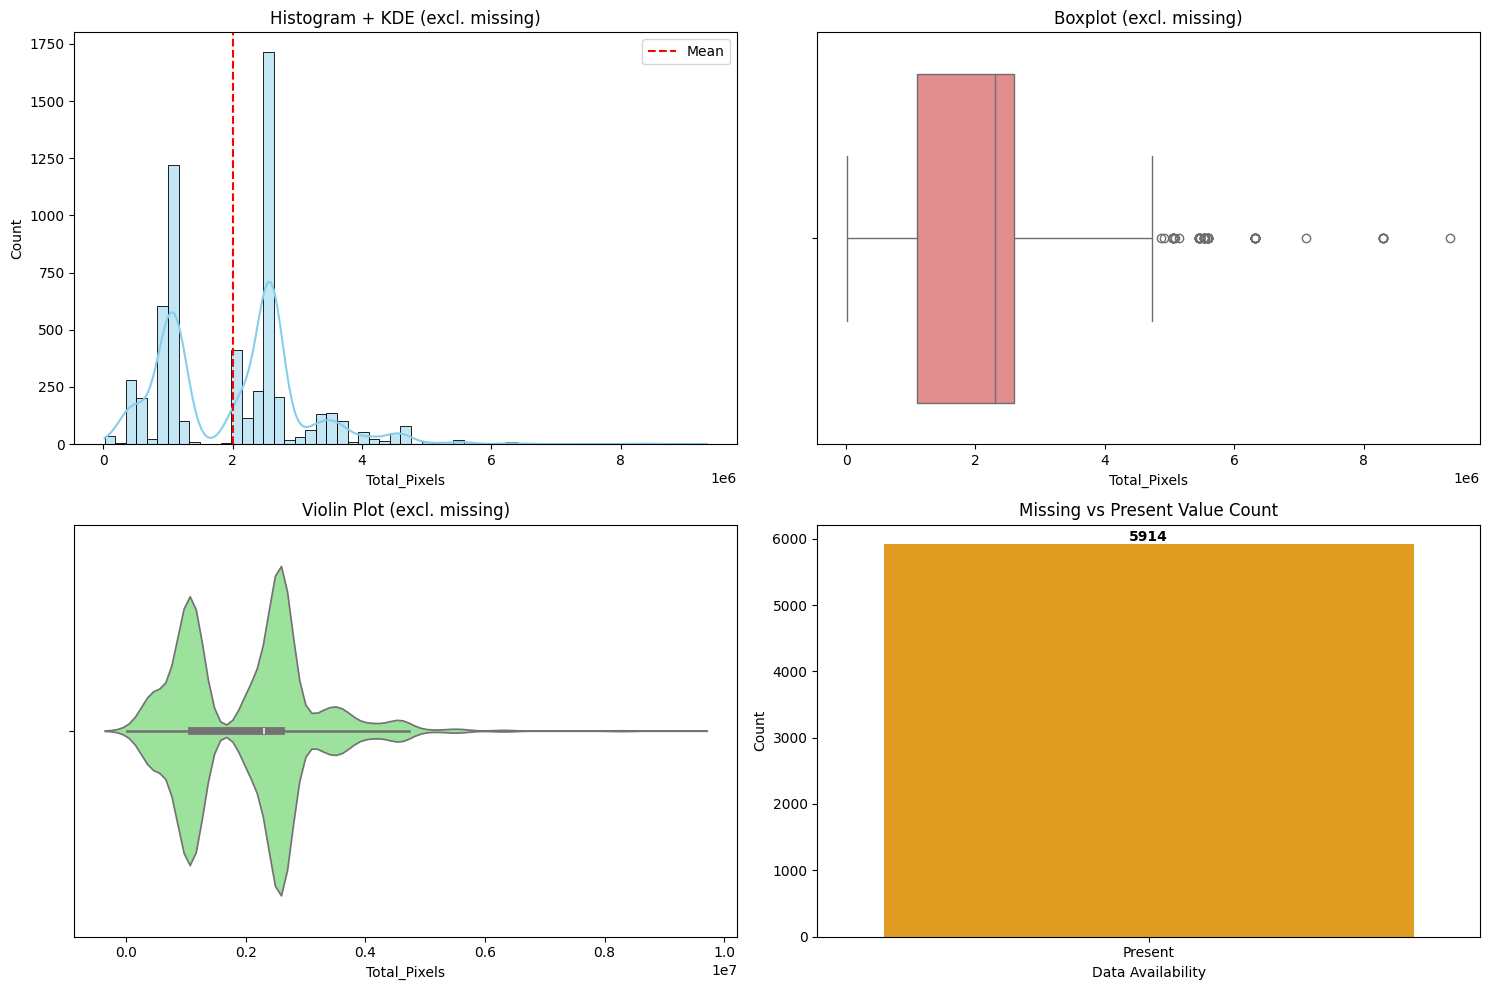

In [14]:
for col in numerical_cols:
  univariate_numerical_analysis(df, col)

## Analyzing all Categorical Columns


📊 Analyzing Categorical Column: **Sound_3.5mmjack**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                 Count  Percentage
Sound_3.5mmjack                   
Yes               4322       73.08
No                1592       26.92


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


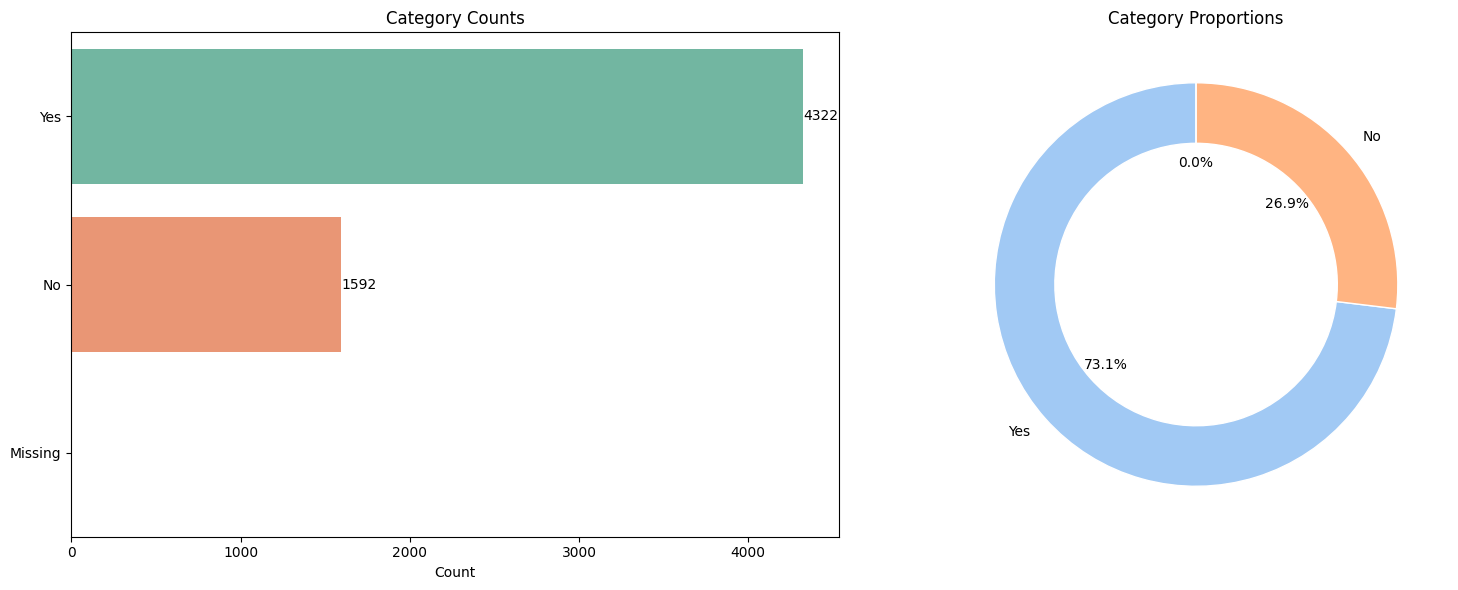

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


📊 Analyzing Categorical Column: **Brand**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 36

🔹 Category Distribution (including NaNs):
           Count  Percentage
Brand                       
Xiaomi       568        9.60
vivo         520        8.79
Oppo         338        5.72
Huawei       329        5.56
Motorola     317        5.36
ZTE          306        5.17
Realme       301        5.09
Samsung      286        4.84
Honor        238        4.02
LG           234        3.96
Lenovo       192        3.25
HTC          170        2.87
Tecno        163        2.76
Asus         158        2.67
Infinix      147        2.49
Sony         136        2.30
Micromax     132        2.23
Apple        131        2.22
Nokia        130        2.20
alcatel      122        2.06
Ulefone      111        1.88
OnePlus      105        1.78
Doogee       102        1.72
Blackview     84        1.42
Meizu         81        1.37
TCL    

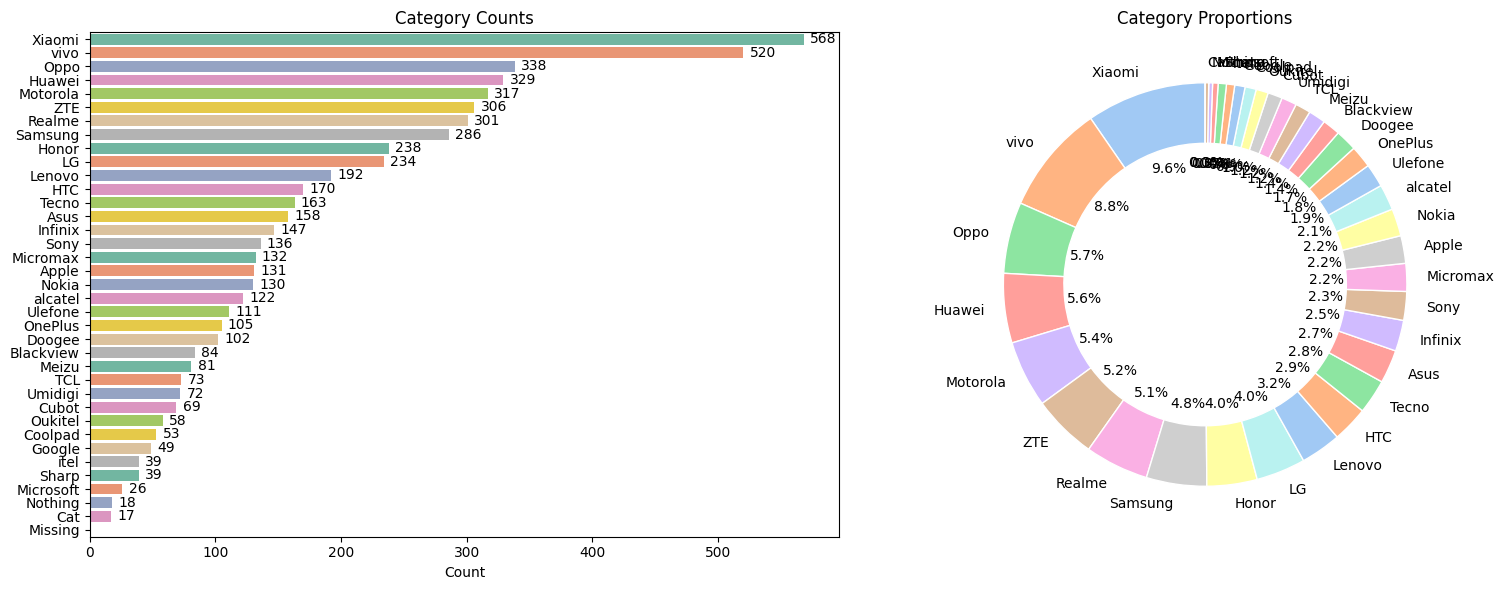

📊 Analyzing Categorical Column: **has_GSM**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
         Count  Percentage
has_GSM                   
1.0       5844       98.82
0.0         70        1.18


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


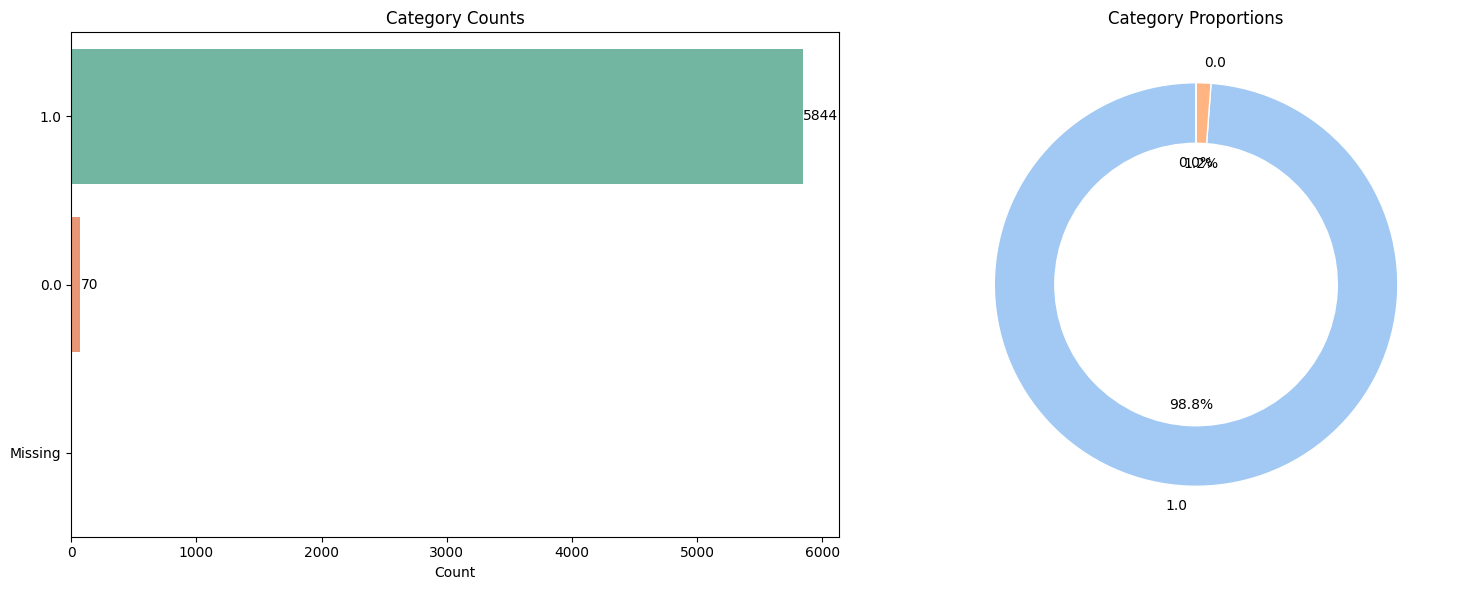

📊 Analyzing Categorical Column: **has_UMTS**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_UMTS                   
0.0        5904       99.83
1.0          10        0.17


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


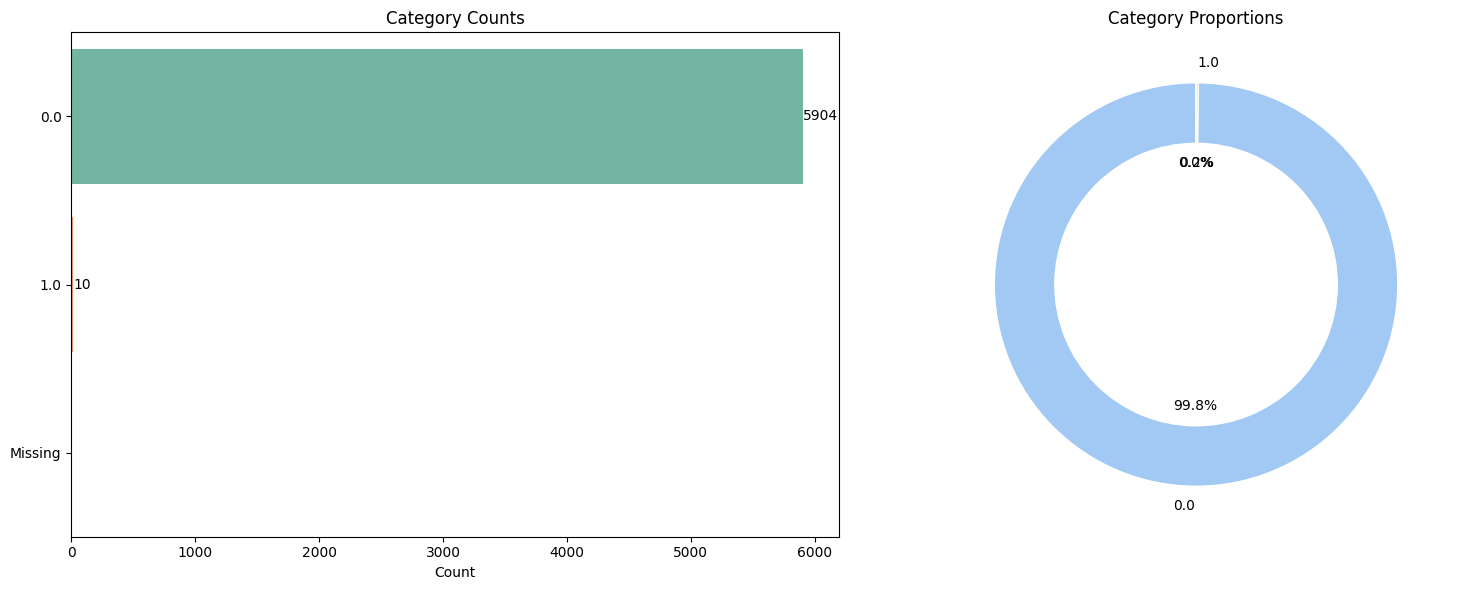

📊 Analyzing Categorical Column: **has_HSPA**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_HSPA                   
1.0        5817       98.36
0.0          97        1.64


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


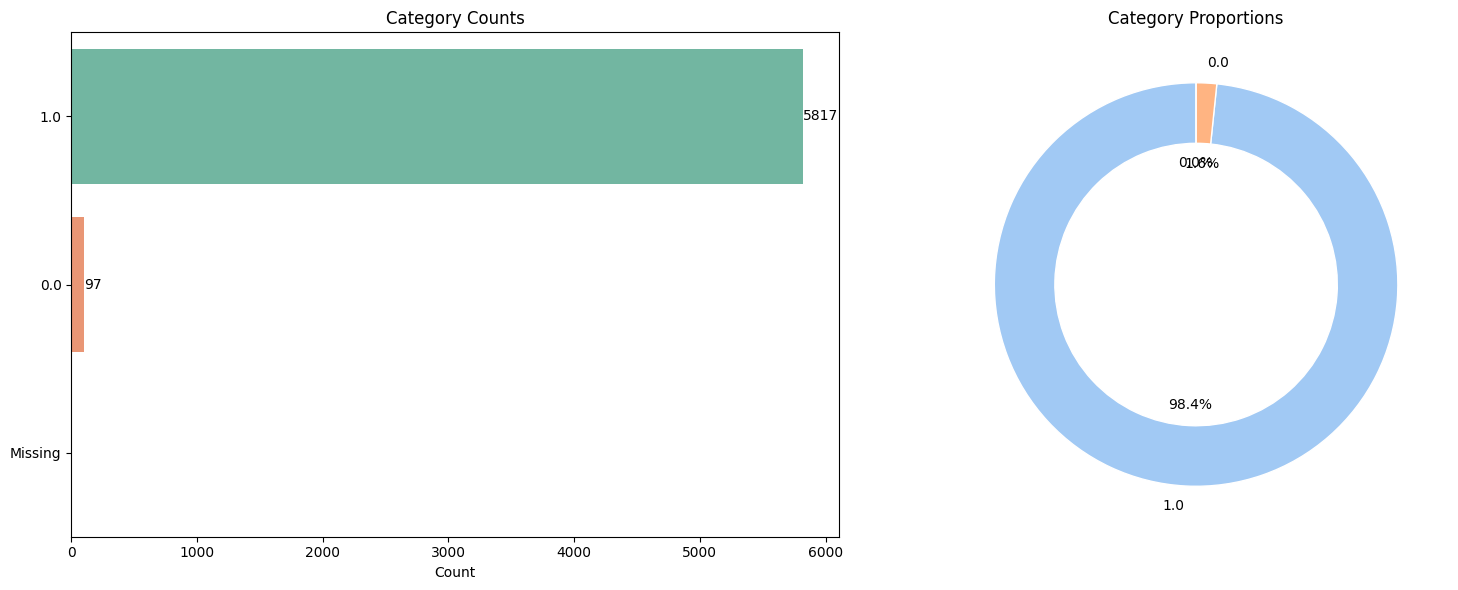

📊 Analyzing Categorical Column: **has_LTE**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
         Count  Percentage
has_LTE                   
1.0       5368       90.77
0.0        546        9.23


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


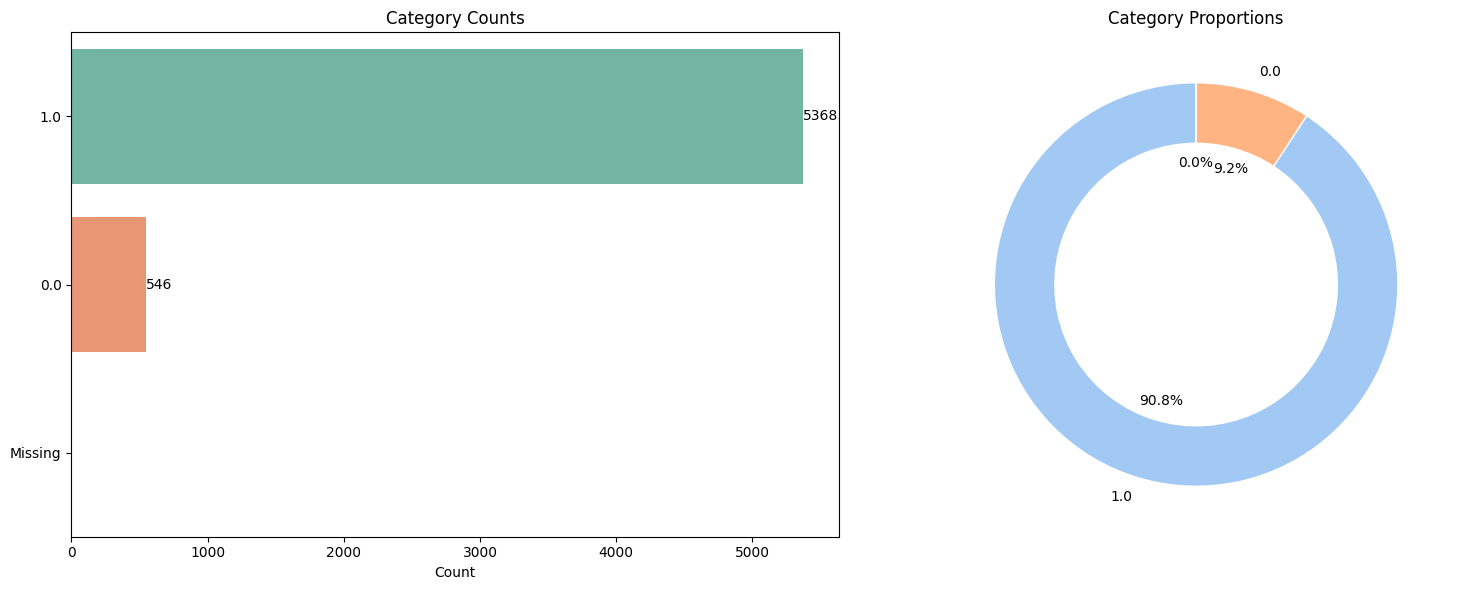

📊 Analyzing Categorical Column: **has_5G**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
        Count  Percentage
has_5G                   
0.0      3978       67.26
1.0      1936       32.74


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


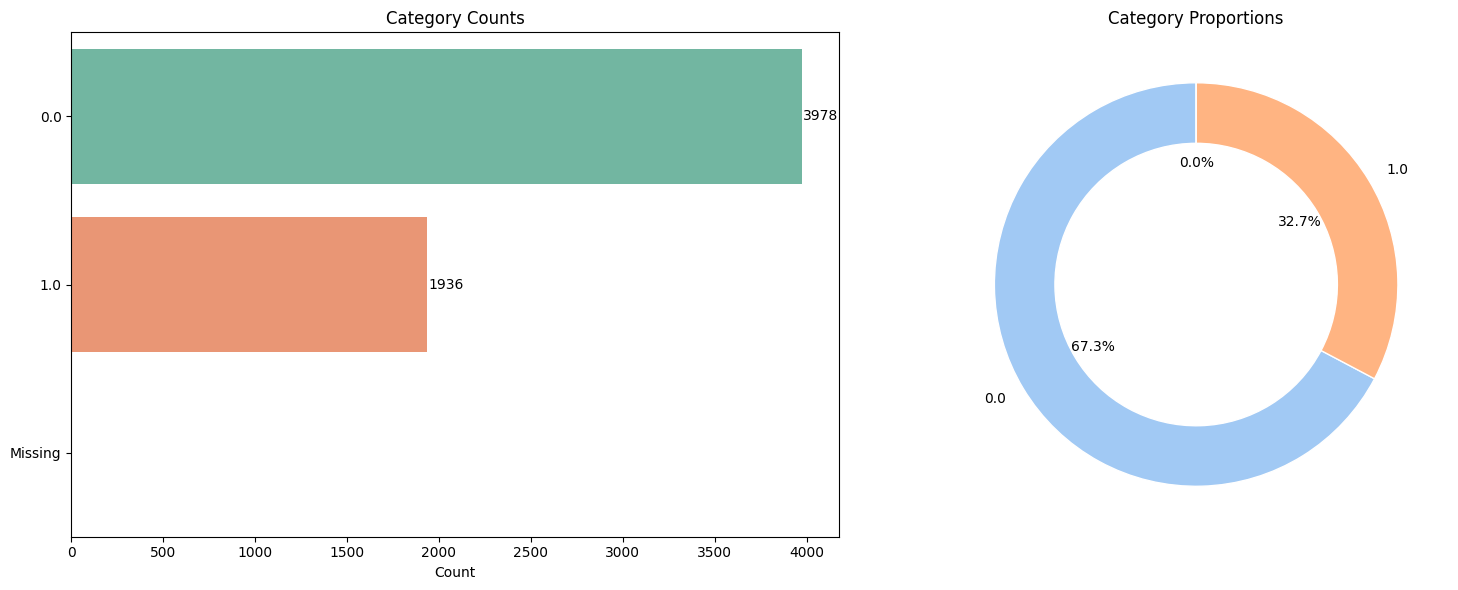

📊 Analyzing Categorical Column: **has_CDMA**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_CDMA                   
0.0        4351       73.57
1.0        1563       26.43


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


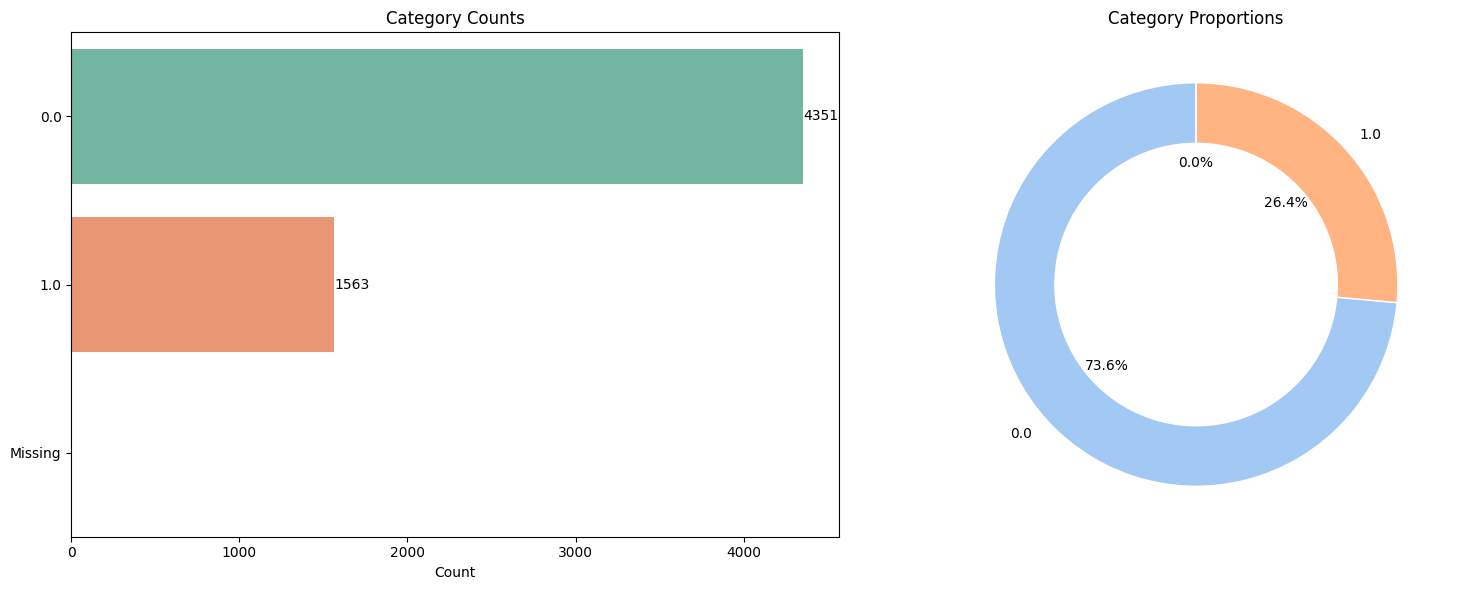

📊 Analyzing Categorical Column: **has_CDMA2000**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2



/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


🔹 Category Distribution (including NaNs):
              Count  Percentage
has_CDMA2000                   
0.0            5527       93.46
1.0             387        6.54


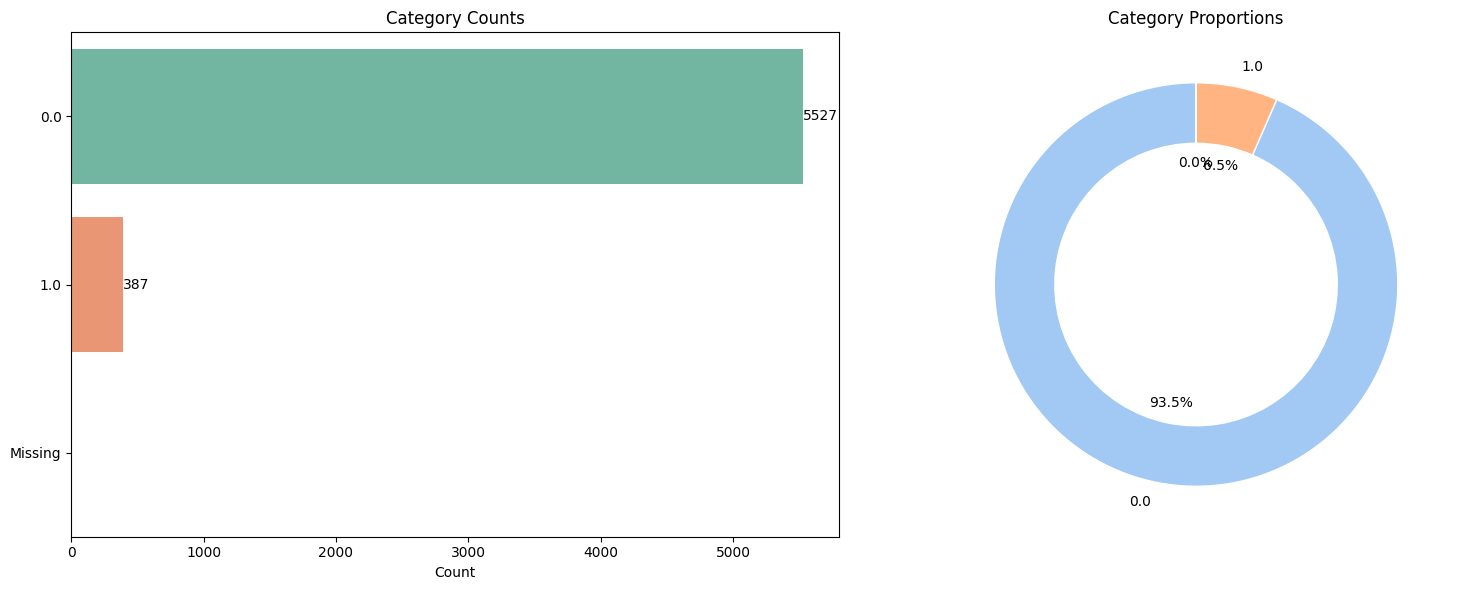

📊 Analyzing Categorical Column: **has_EVDO**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_EVDO                   
0.0        5244       88.67
1.0         670       11.33


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


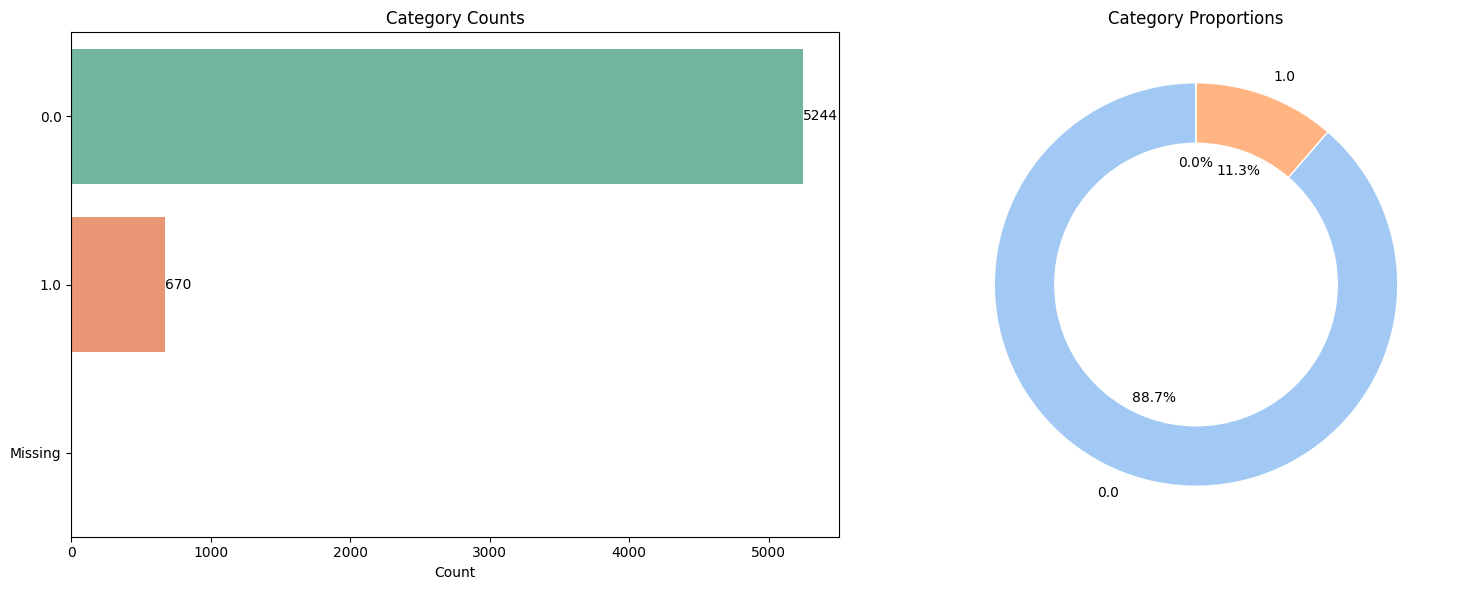

📊 Analyzing Categorical Column: **number_of_sims**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                Count  Percentage
number_of_sims                   
2.0              4388        74.2
1.0              1526        25.8


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


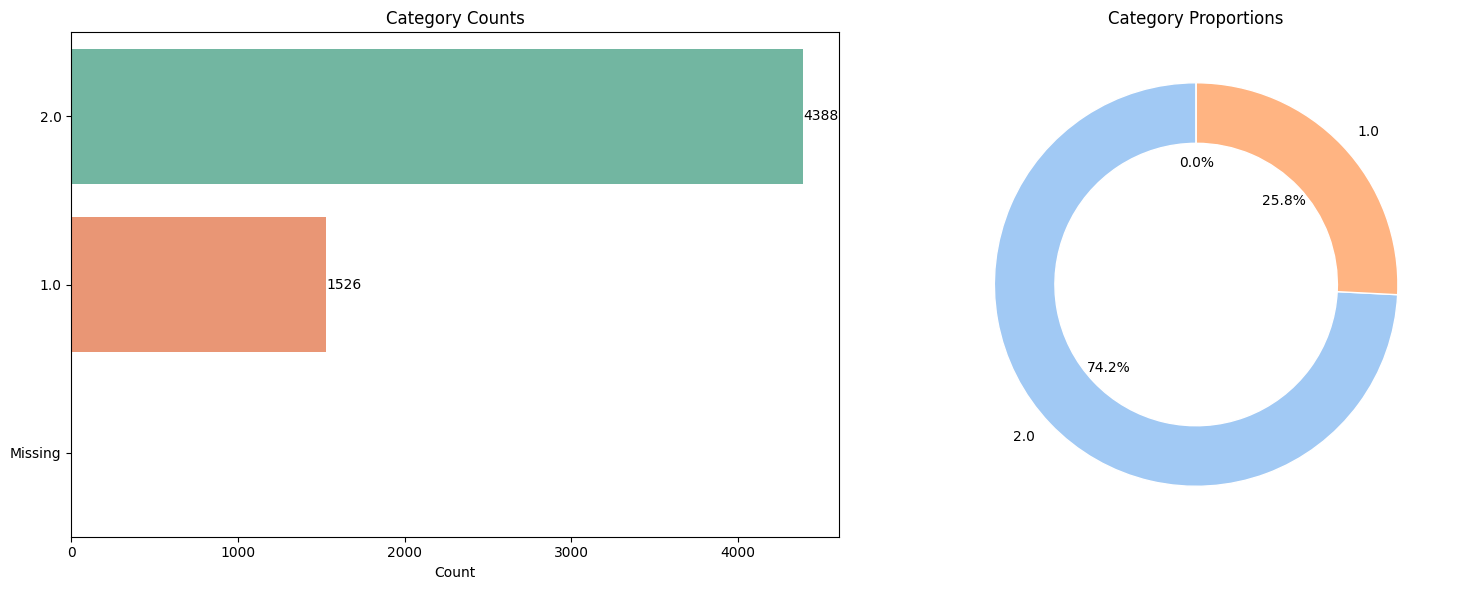

📊 Analyzing Categorical Column: **number_of_2g_bands**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 13 (0.22%)
🔹 Unique Categories: 5

🔹 Category Distribution (including NaNs):
                    Count  Percentage
number_of_2g_bands                   
 4.0                 5563       94.06
 3.0                  175        2.96
 2.0                  159        2.69
NaN                    13        0.22
 1.0                    2        0.03
 5.0                    2        0.03


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


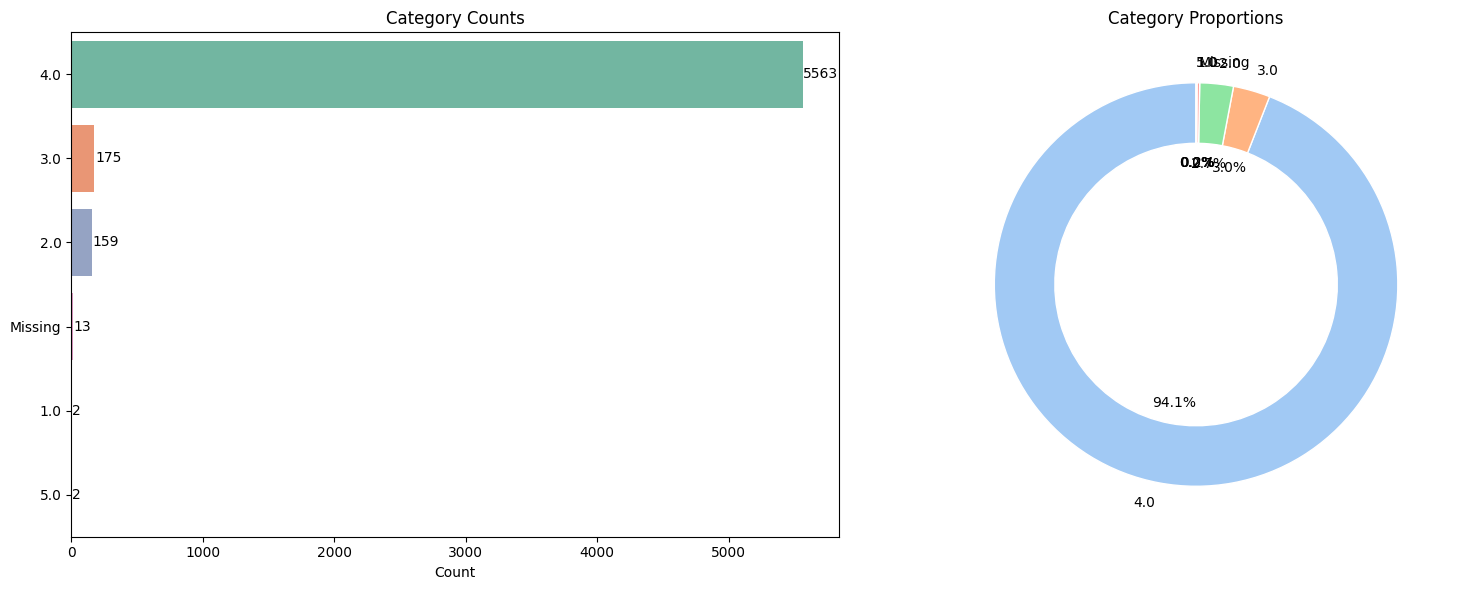

📊 Analyzing Categorical Column: **aws_support**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
             Count  Percentage
aws_support                   
0.0           3538       59.82
1.0           2376       40.18


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


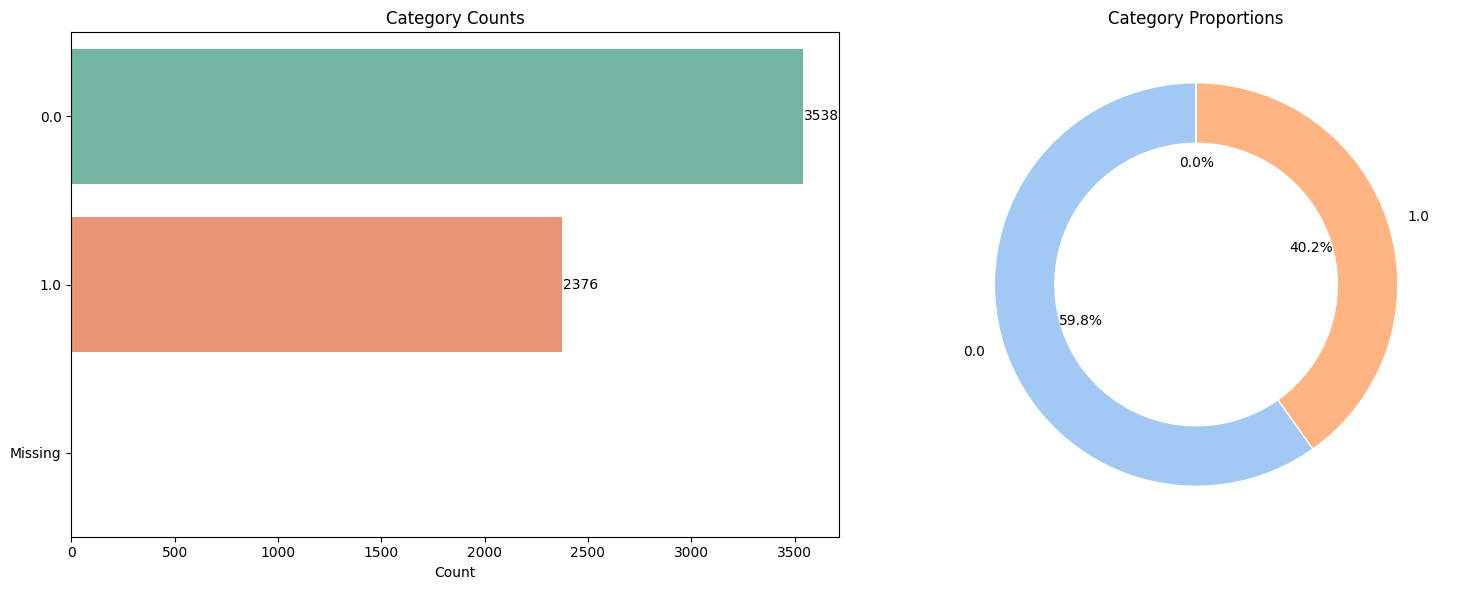

📊 Analyzing Categorical Column: **number_of_3g_bands**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 8

🔹 Category Distribution (including NaNs):
                    Count  Percentage
number_of_3g_bands                   
5.0                  1527       25.82
4.0                  1404       23.74
3.0                  1284       21.71
6.0                   795       13.44
2.0                   549        9.28
1.0                   266        4.50
7.0                    60        1.01
0.0                    29        0.49


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


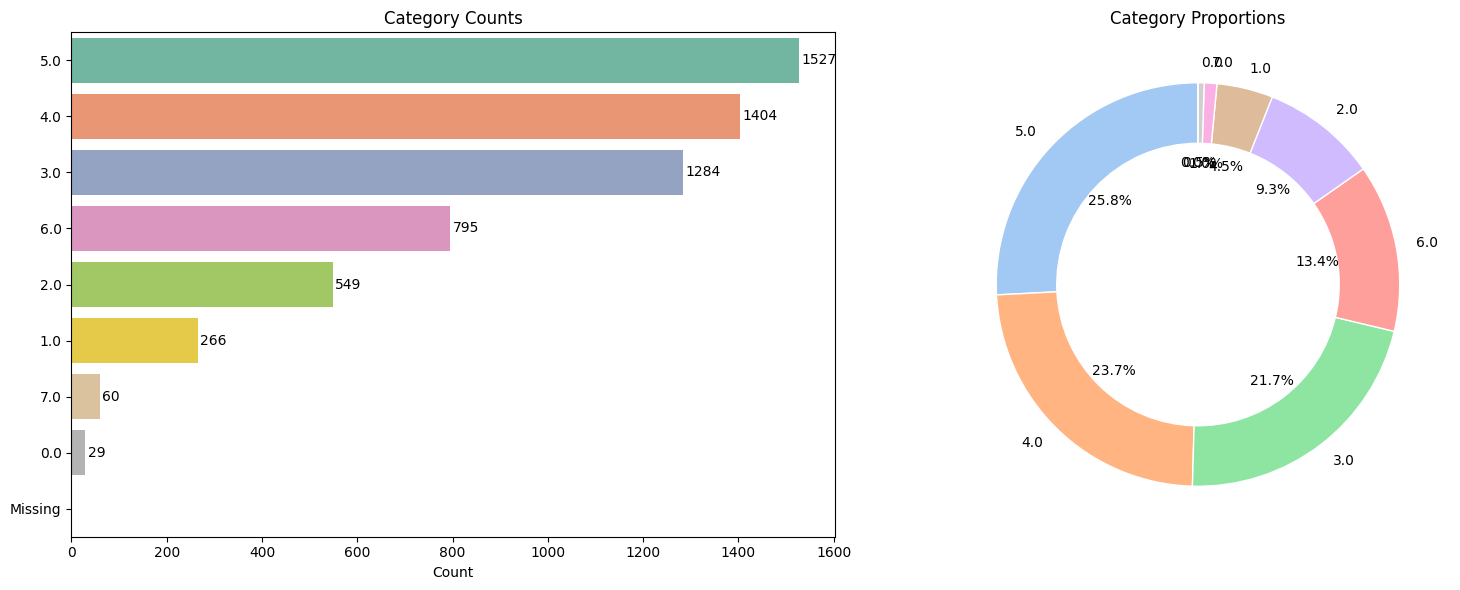

📊 Analyzing Categorical Column: **is_foldable_phone**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 6 (0.10%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                   Count  Percentage
is_foldable_phone                   
False               5827       98.53
True                  81        1.37
NaN                    6        0.10


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


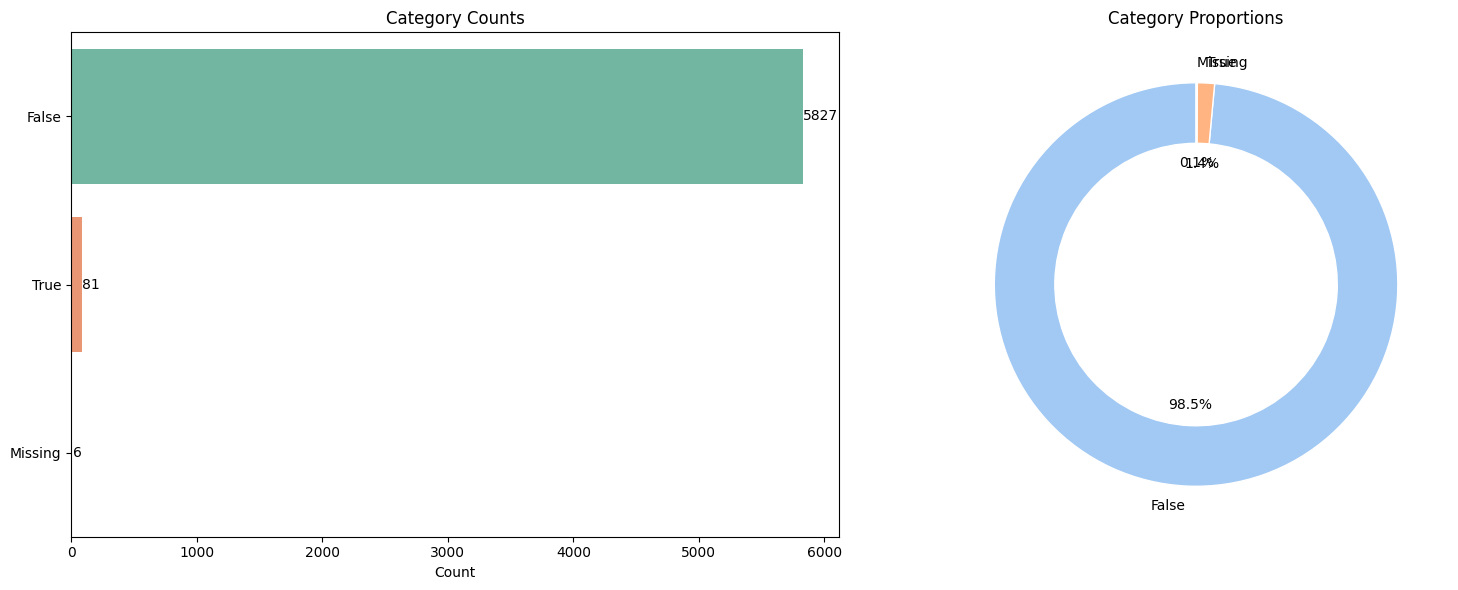

📊 Analyzing Categorical Column: **has_Nano_SIM**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
              Count  Percentage
has_Nano_SIM                   
1.0            4766       80.59
0.0            1148       19.41


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


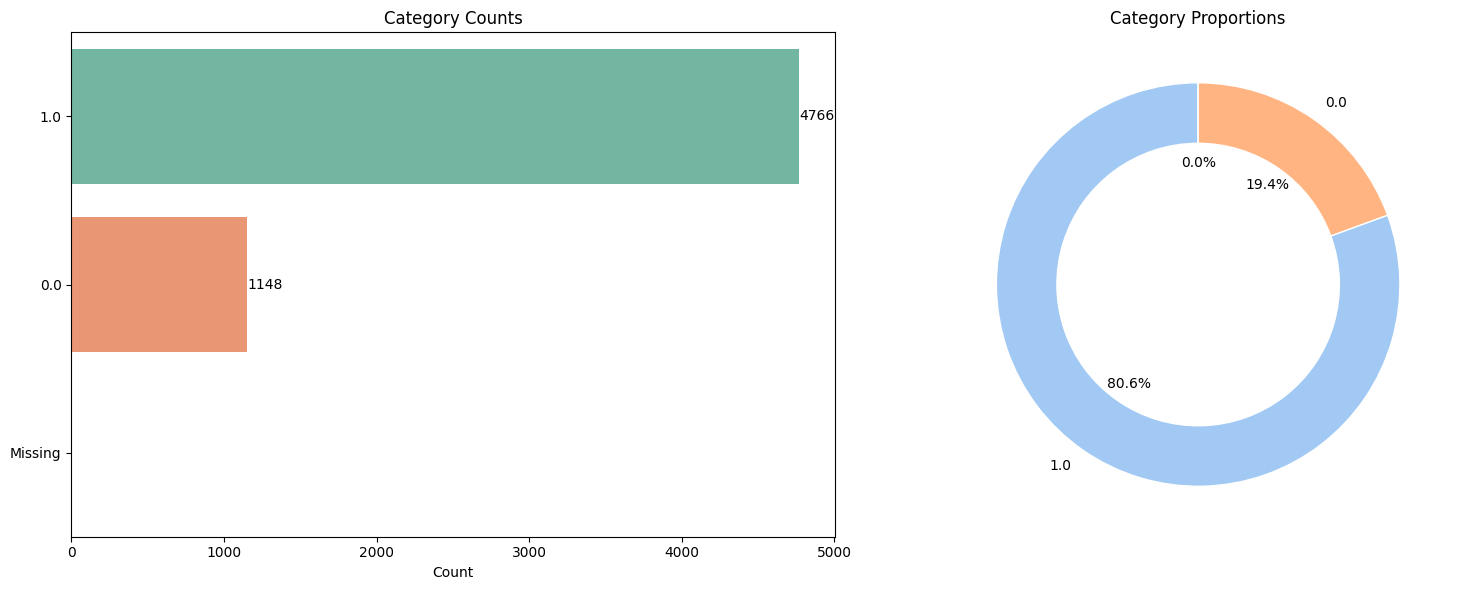

📊 Analyzing Categorical Column: **has_Micro_SIM**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
               Count  Percentage
has_Micro_SIM                   
0.0             5111       86.42
1.0              803       13.58


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


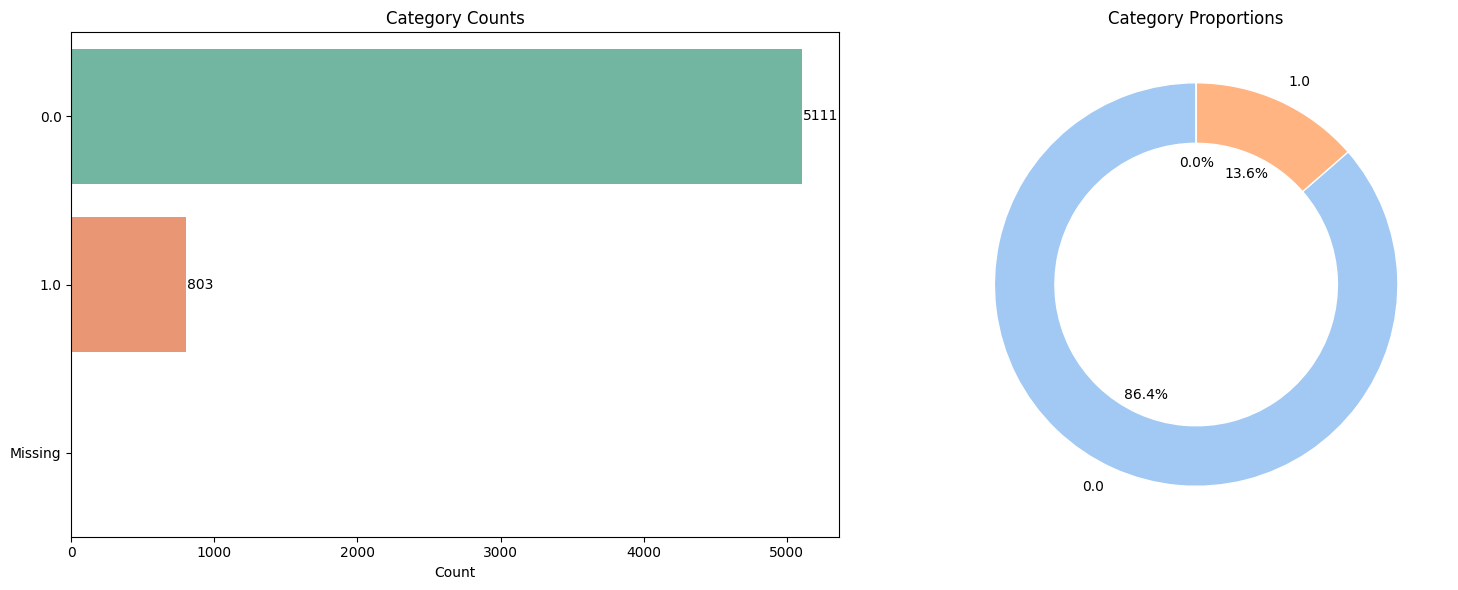

📊 Analyzing Categorical Column: **has_Mini_SIM**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
              Count  Percentage
has_Mini_SIM                   
0.0            5634       95.27
1.0             280        4.73


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


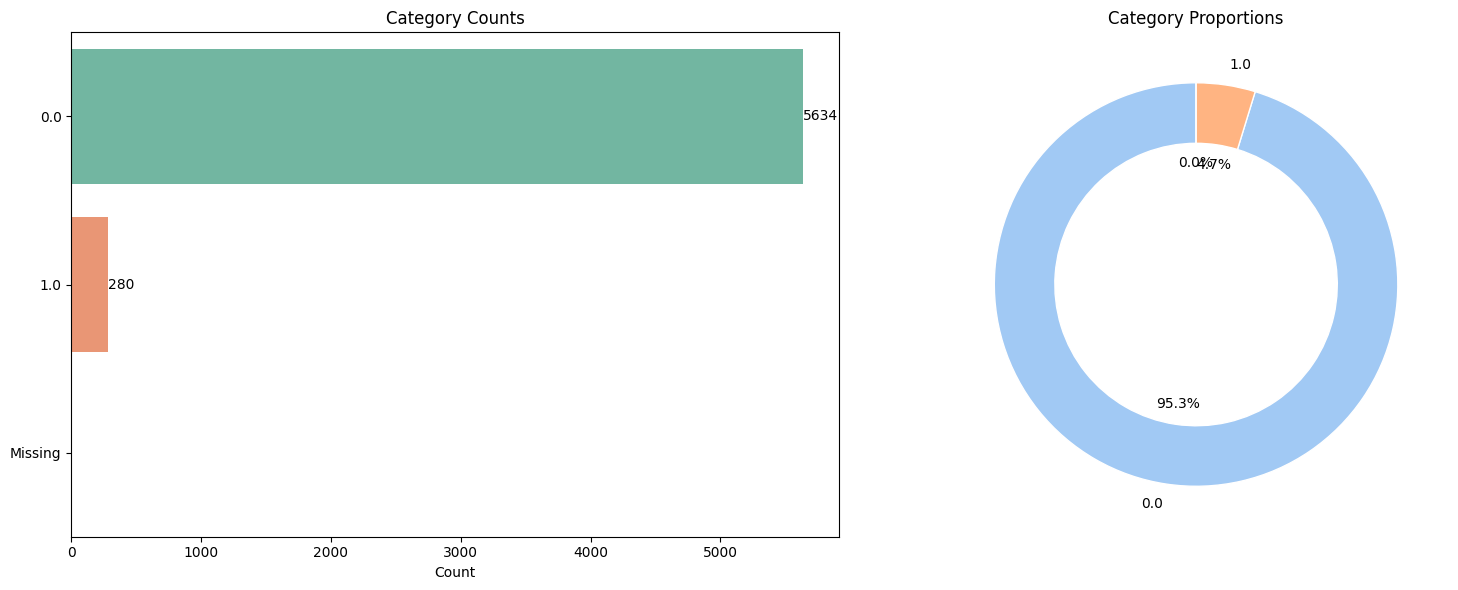

📊 Analyzing Categorical Column: **has_eSIM**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_eSIM                   
0.0        5516       93.27
1.0         398        6.73


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


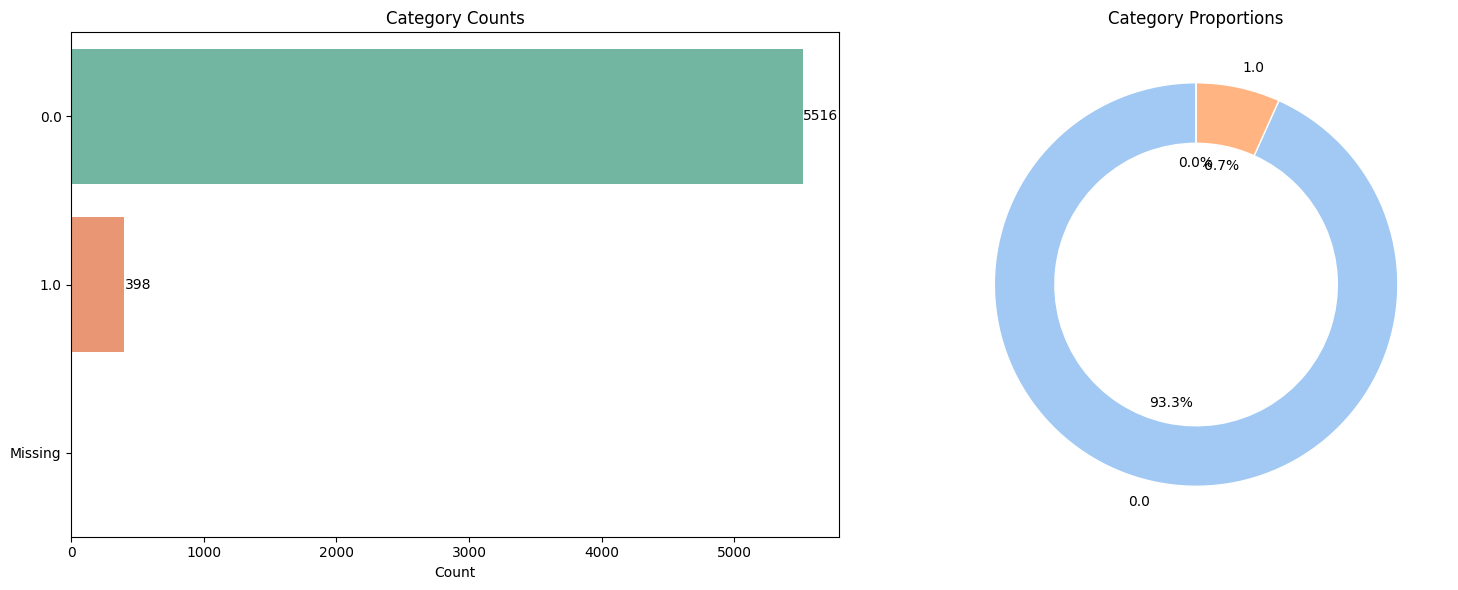

📊 Analyzing Categorical Column: **has_SIM_Type_Specified**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2



/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


🔹 Category Distribution (including NaNs):
                        Count  Percentage
has_SIM_Type_Specified                   
1.0                      5738       97.02
0.0                       176        2.98


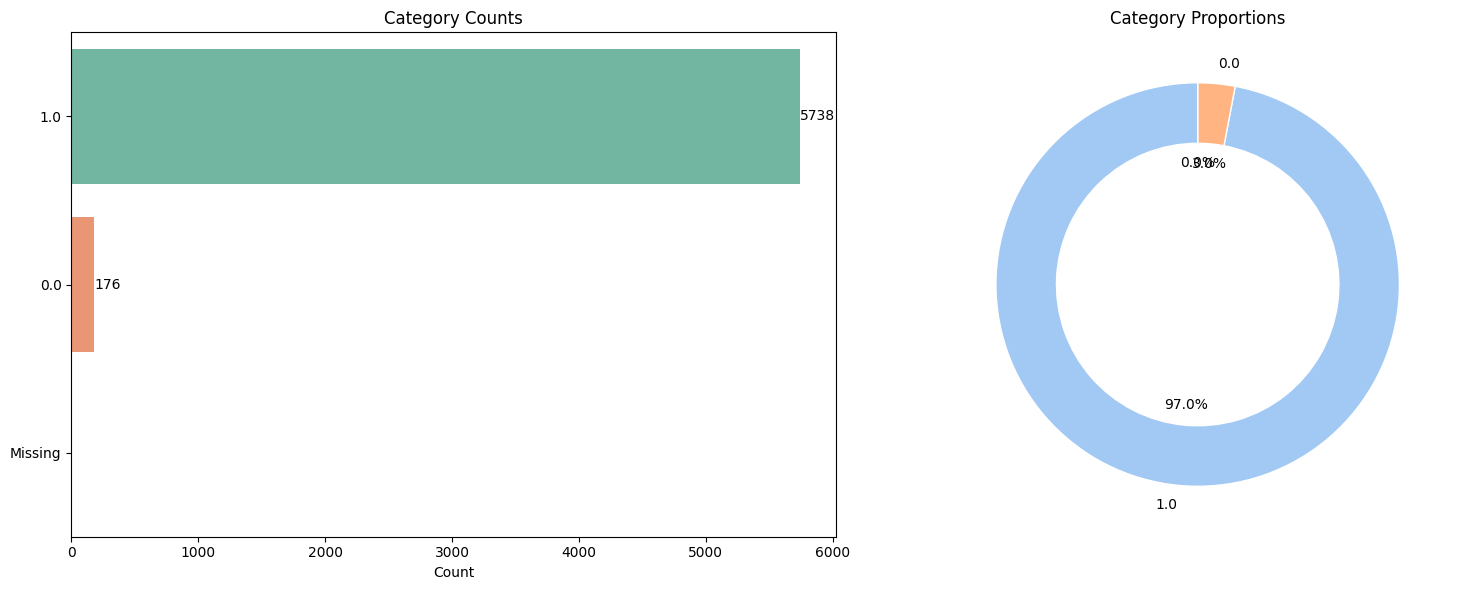

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


📊 Analyzing Categorical Column: **has_memory_card**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                 Count  Percentage
has_memory_card                   
True              4204       71.09
False             1710       28.91


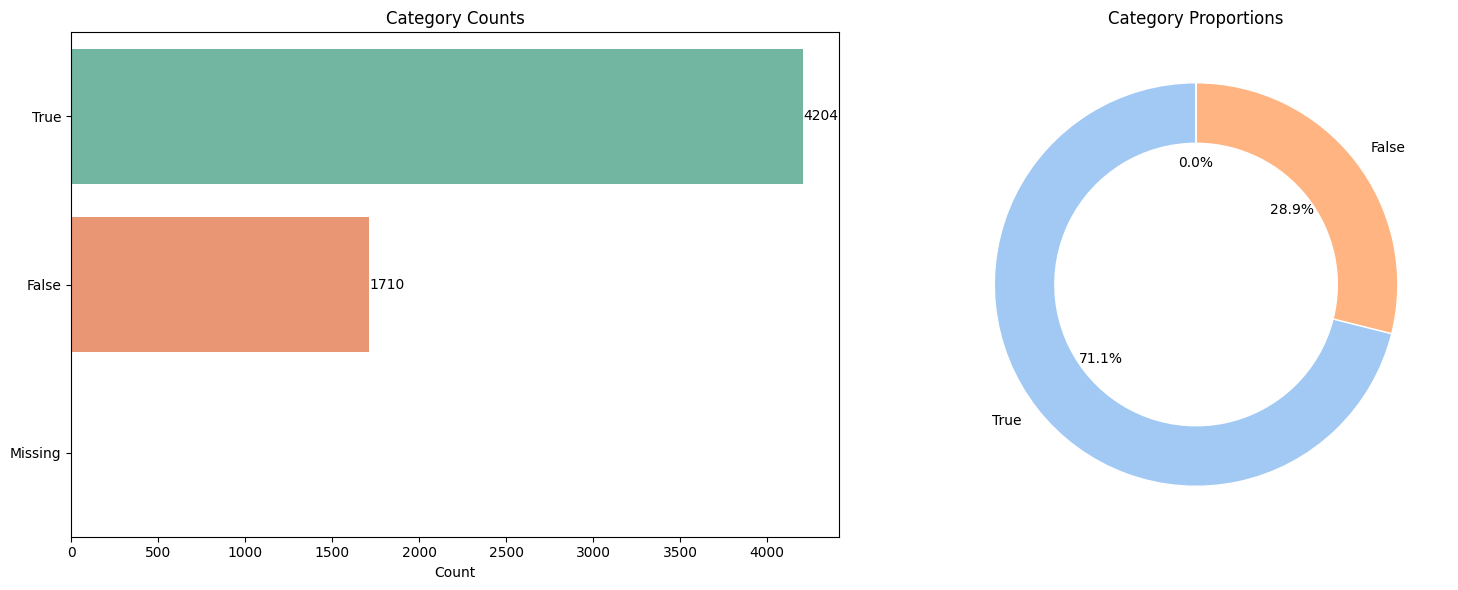

📊 Analyzing Categorical Column: **memory_type_microSDXC**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                       Count  Percentage
memory_type_microSDXC                   
True                    3421       57.85
False                   2493       42.15


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


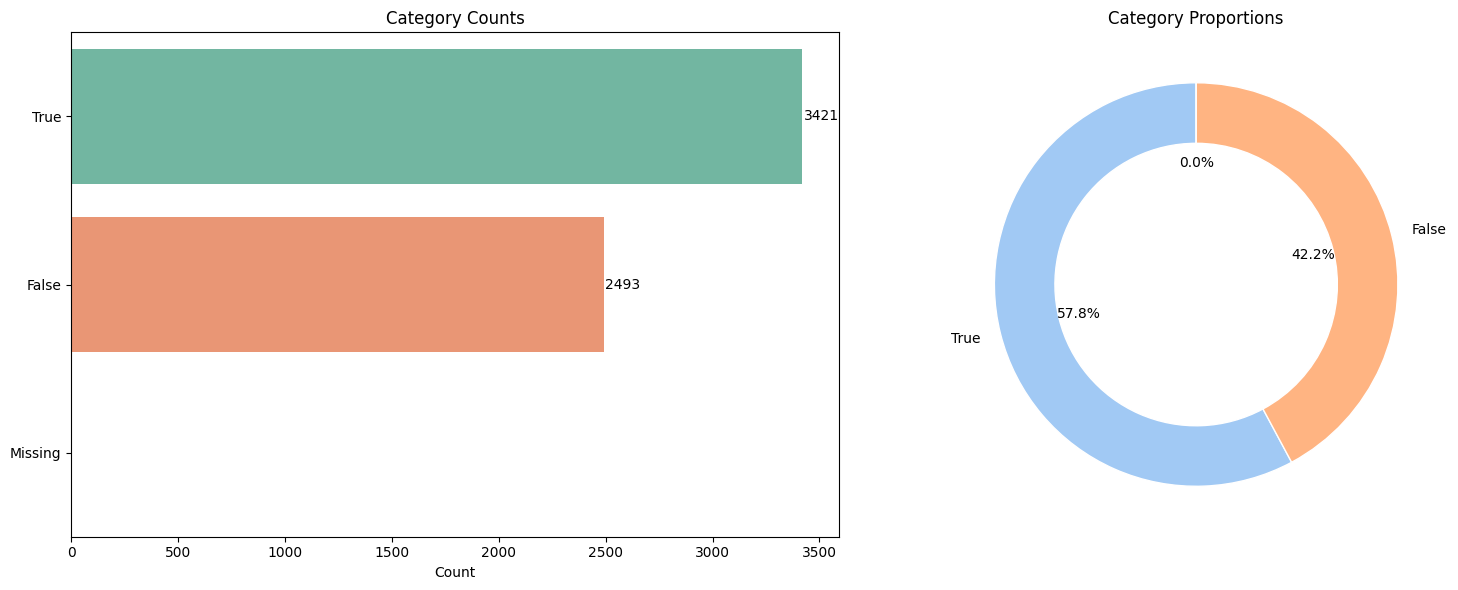

📊 Analyzing Categorical Column: **memory_type_microSDHC**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                       Count  Percentage
memory_type_microSDHC                   
False                   5234        88.5
True                     680        11.5


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


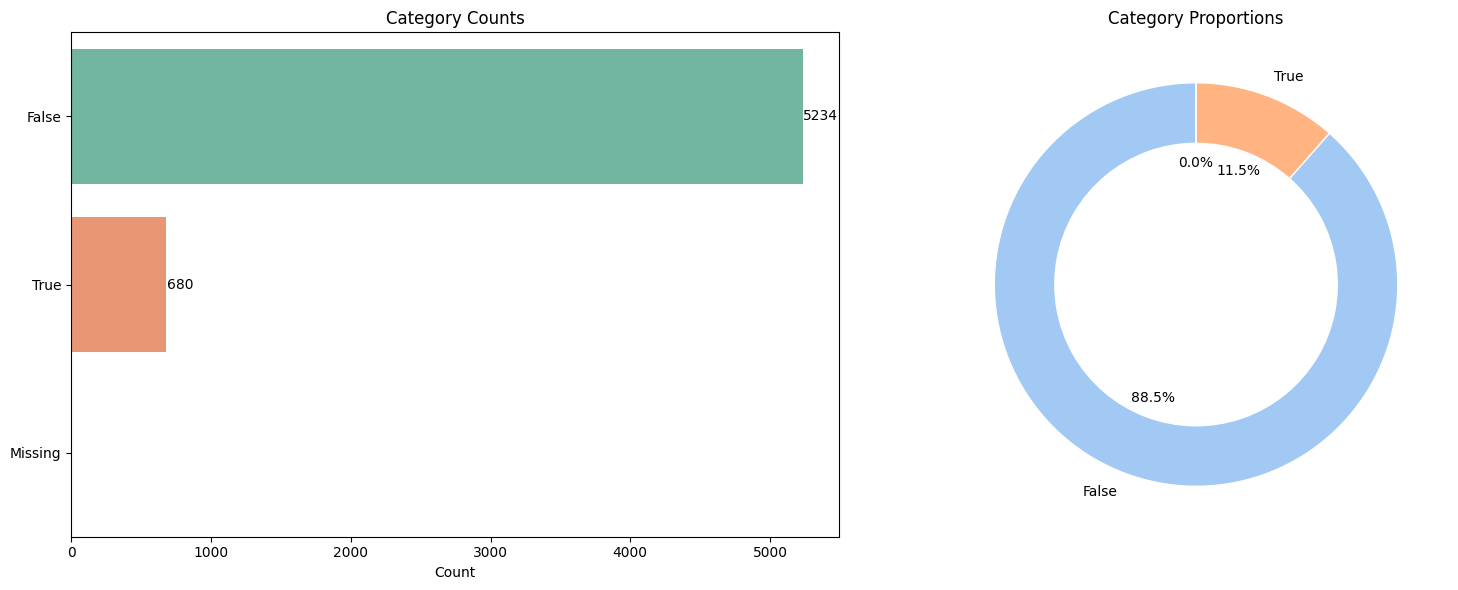

📊 Analyzing Categorical Column: **memory_type_microSD**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                     Count  Percentage
memory_type_microSD                   
False                 5896        99.7
True                    18         0.3


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


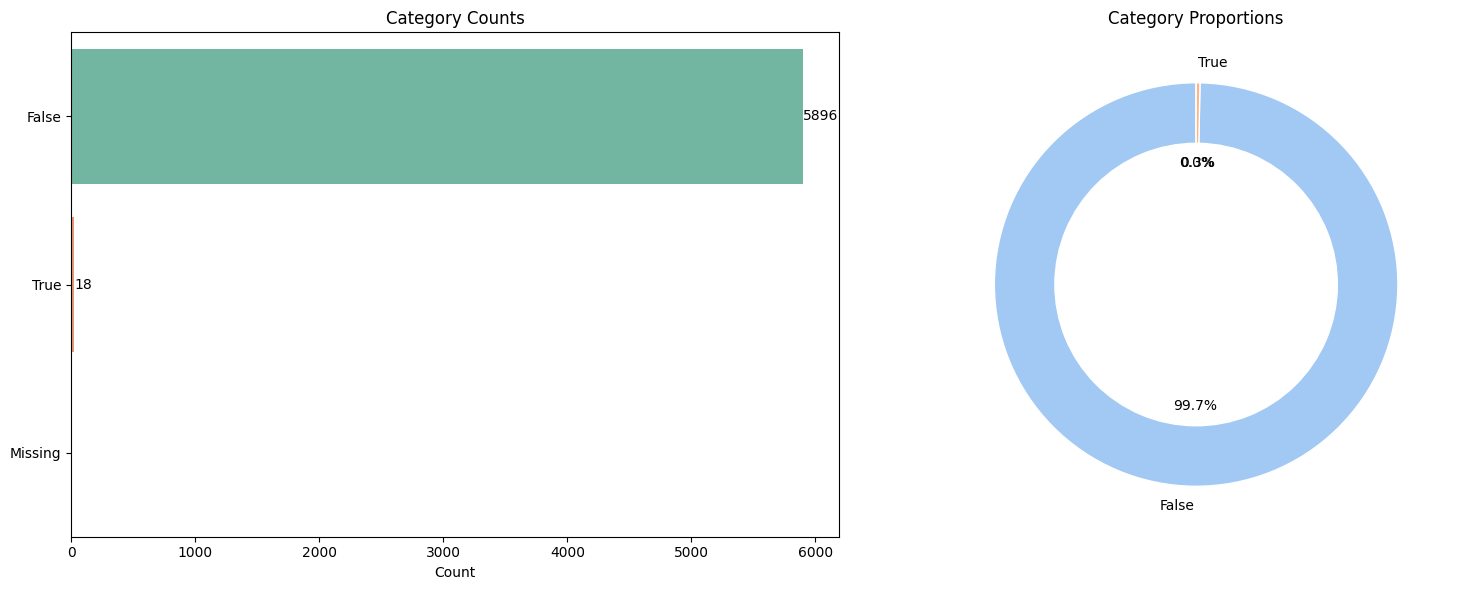

📊 Analyzing Categorical Column: **memory_type_SD**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                Count  Percentage
memory_type_SD                   
False            5910       99.93
True                4        0.07


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


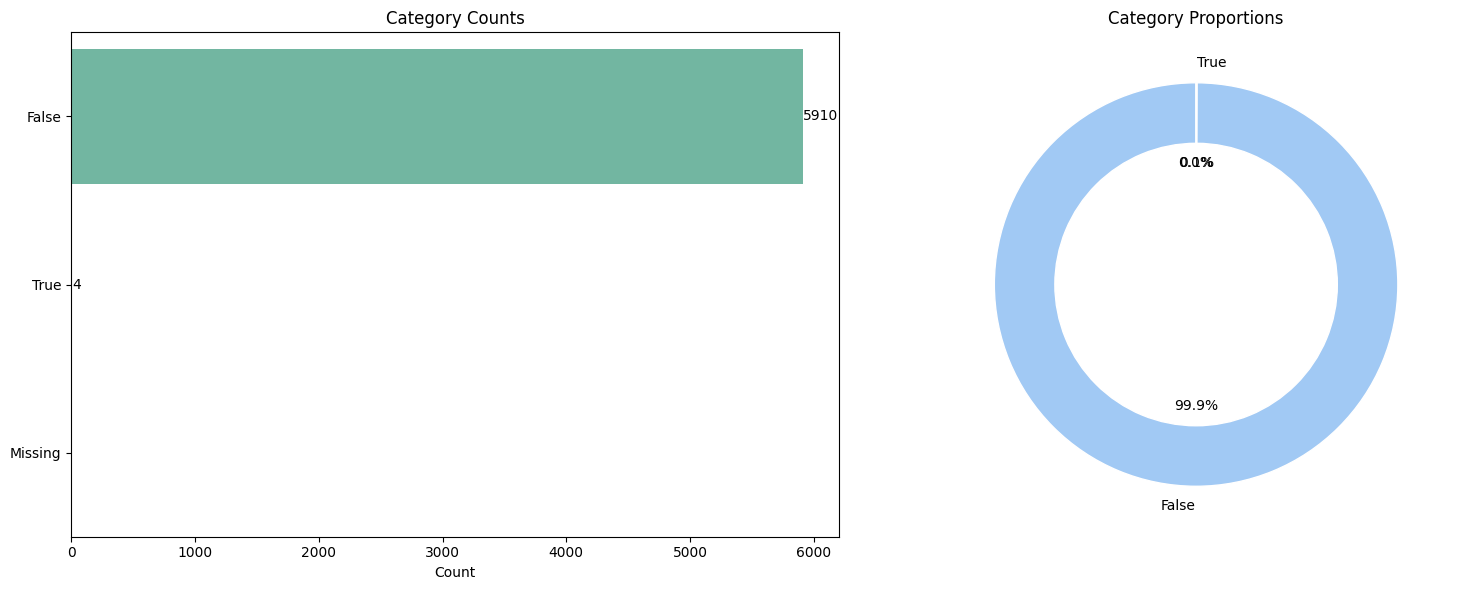

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


📊 Analyzing Categorical Column: **memory_type_Nano_Memory**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                         Count  Percentage
memory_type_Nano_Memory                   
False                     5833       98.63
True                        81        1.37


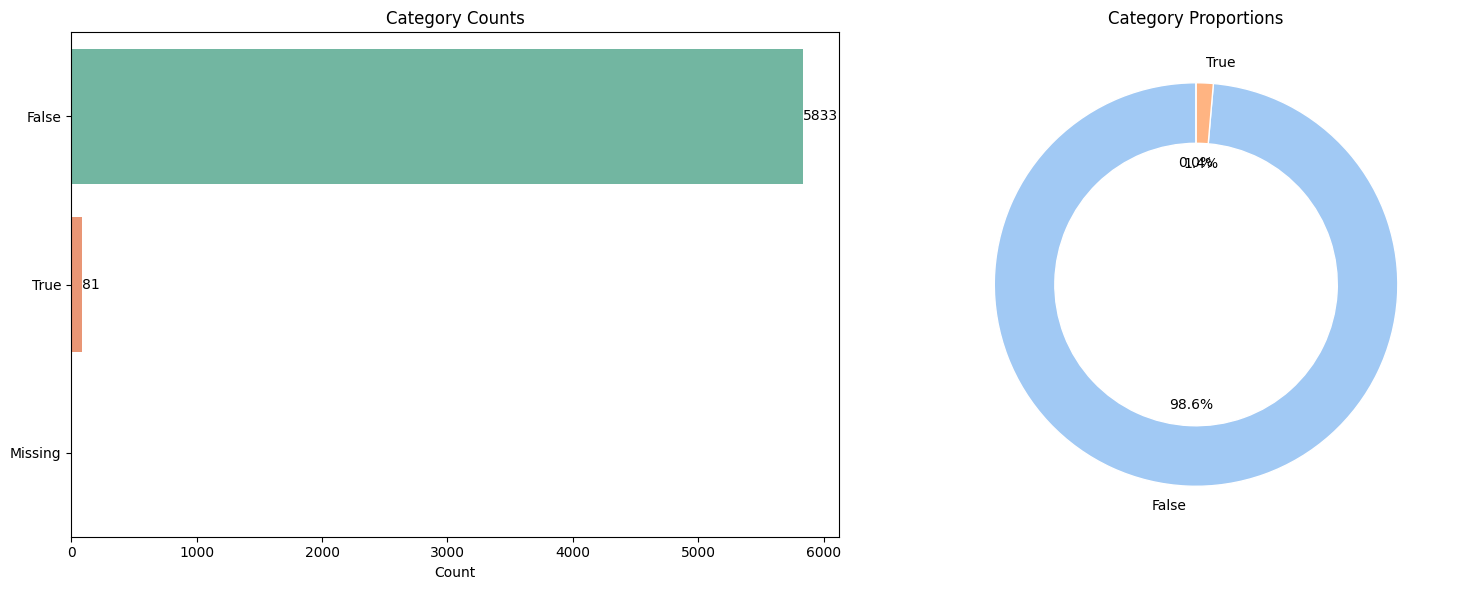

📊 Analyzing Categorical Column: **Battery_Is_removable**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                      Count  Percentage
Battery_Is_removable                   
Non-Removable          5228        88.4
Removable               686        11.6


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


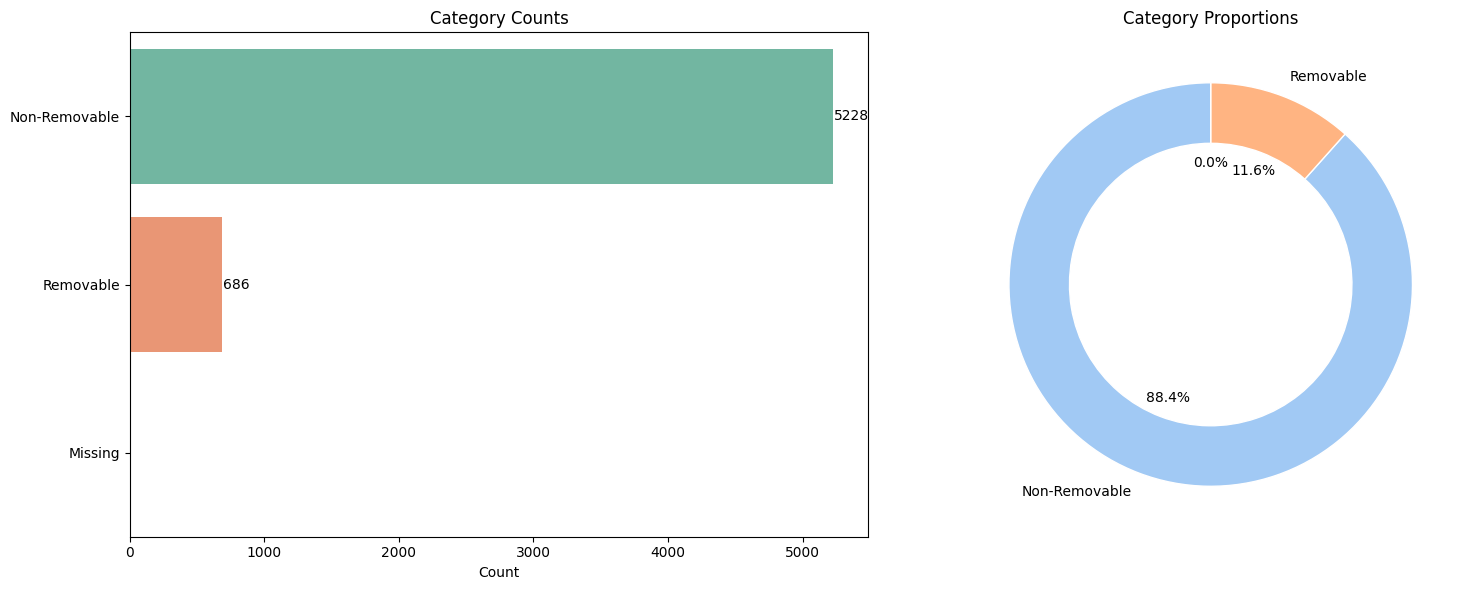

📊 Analyzing Categorical Column: **Battery_Type_Lithium**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 1592 (26.92%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                      Count  Percentage
Battery_Type_Lithium                   
Lithium Polymer        2282       38.59
Lithium Ion            2040       34.49
NaN                    1592       26.92


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


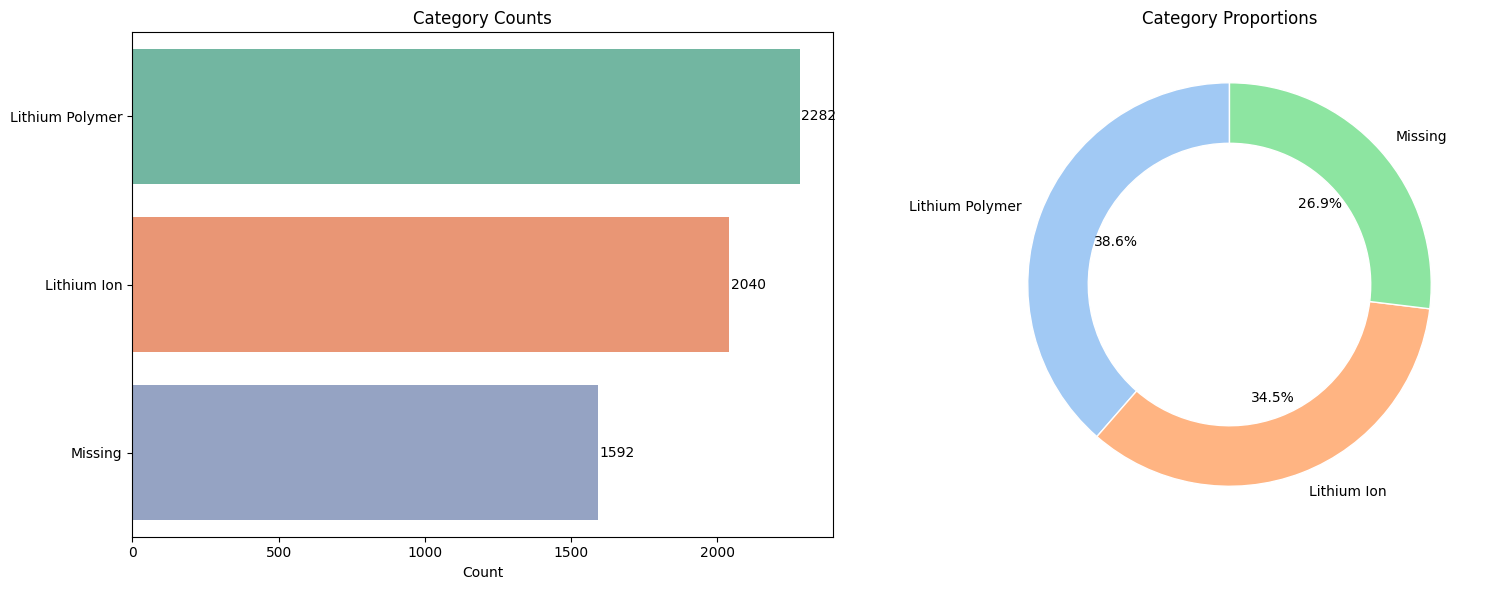

📊 Analyzing Categorical Column: **Sound_has_stereo_speakers**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                           Count  Percentage
Sound_has_stereo_speakers                   
No                          4045        68.4
Yes                         1869        31.6


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


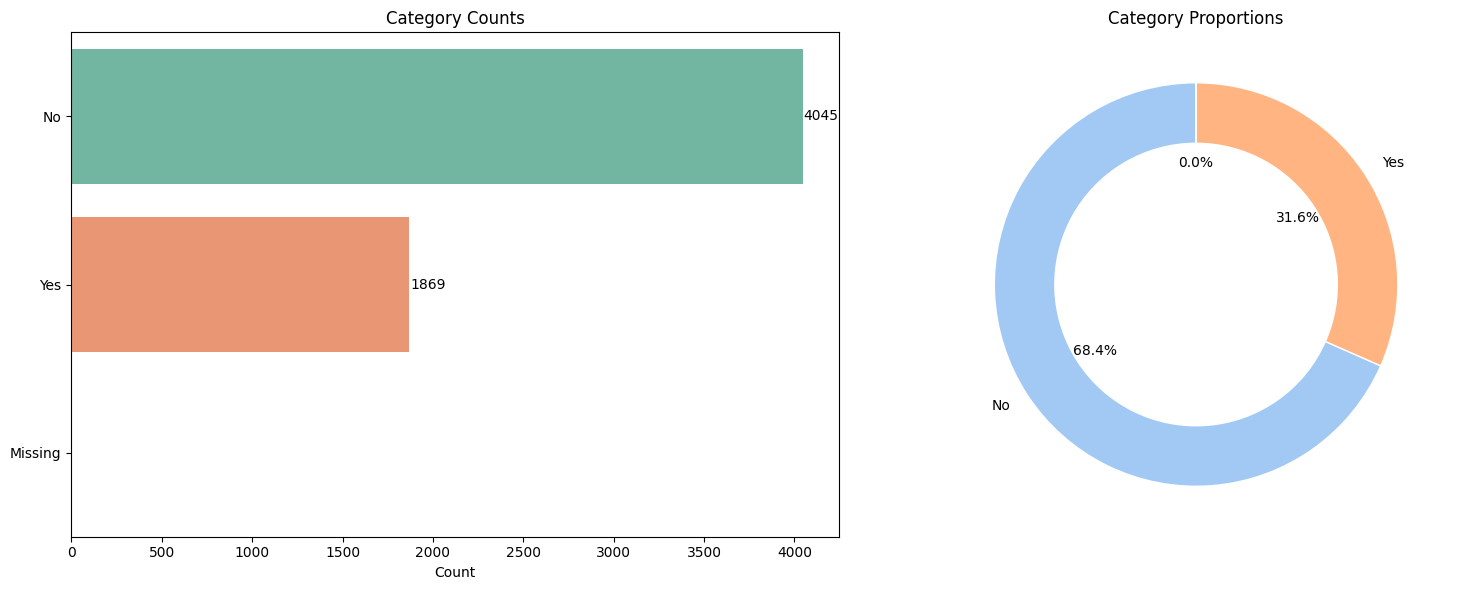

📊 Analyzing Categorical Column: **camera_hdr**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 428 (7.24%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
            Count  Percentage
camera_hdr                   
 1.0         3284       55.53
 0.0         2202       37.23
NaN           428        7.24


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


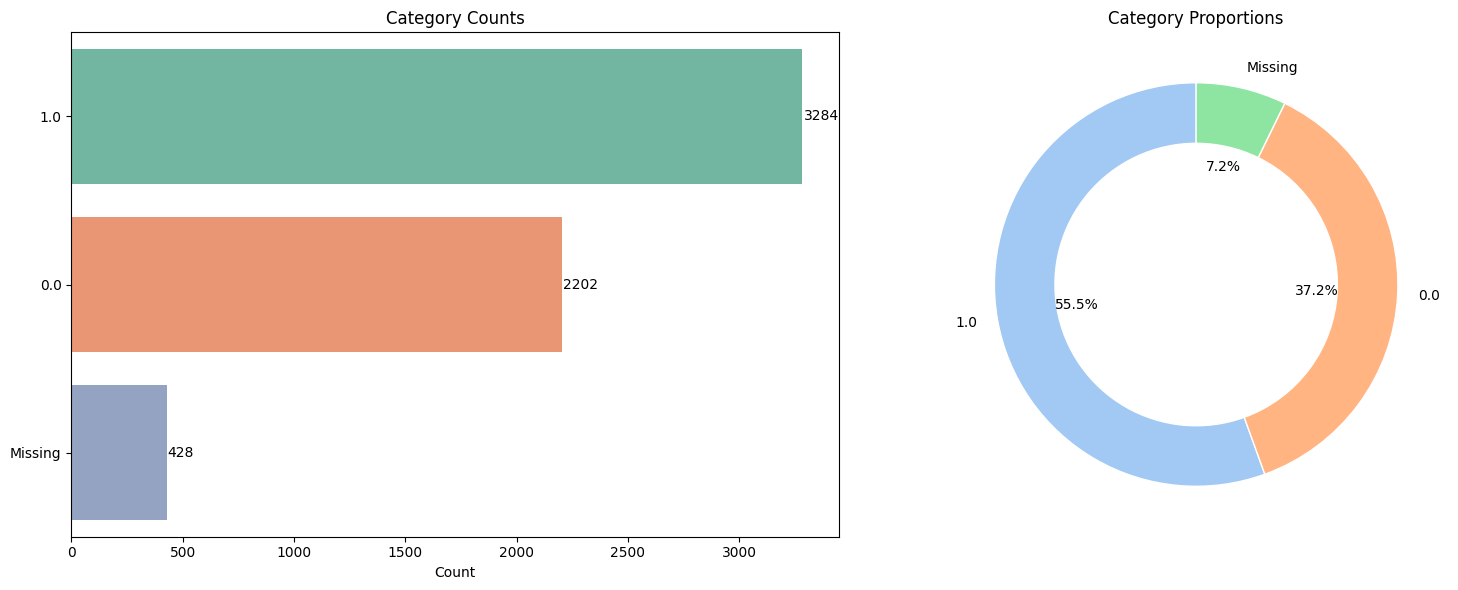

📊 Analyzing Categorical Column: **camera_laser_af**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 428 (7.24%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                 Count  Percentage
camera_laser_af                   
 0.0              5244       88.67
NaN                428        7.24
 1.0               242        4.09


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


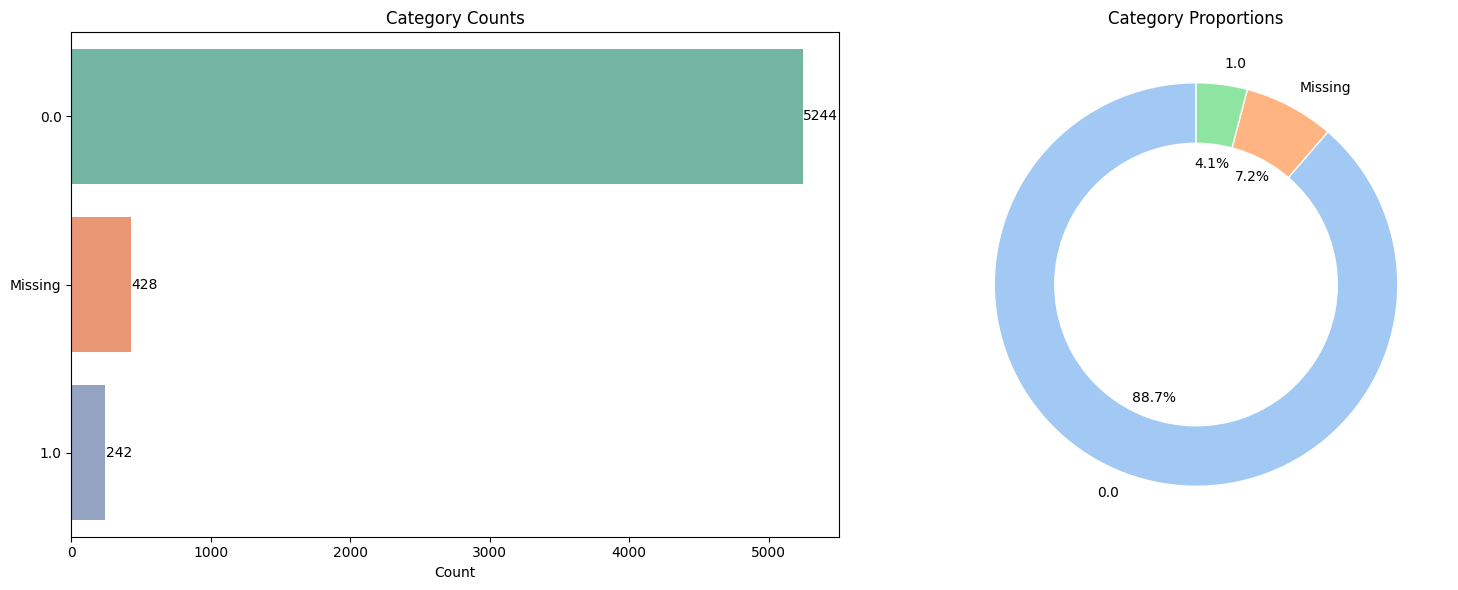

📊 Analyzing Categorical Column: **camera_panorama**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 428 (7.24%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                 Count  Percentage
camera_panorama                   
 1.0              3133       52.98
 0.0              2353       39.79
NaN                428        7.24


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


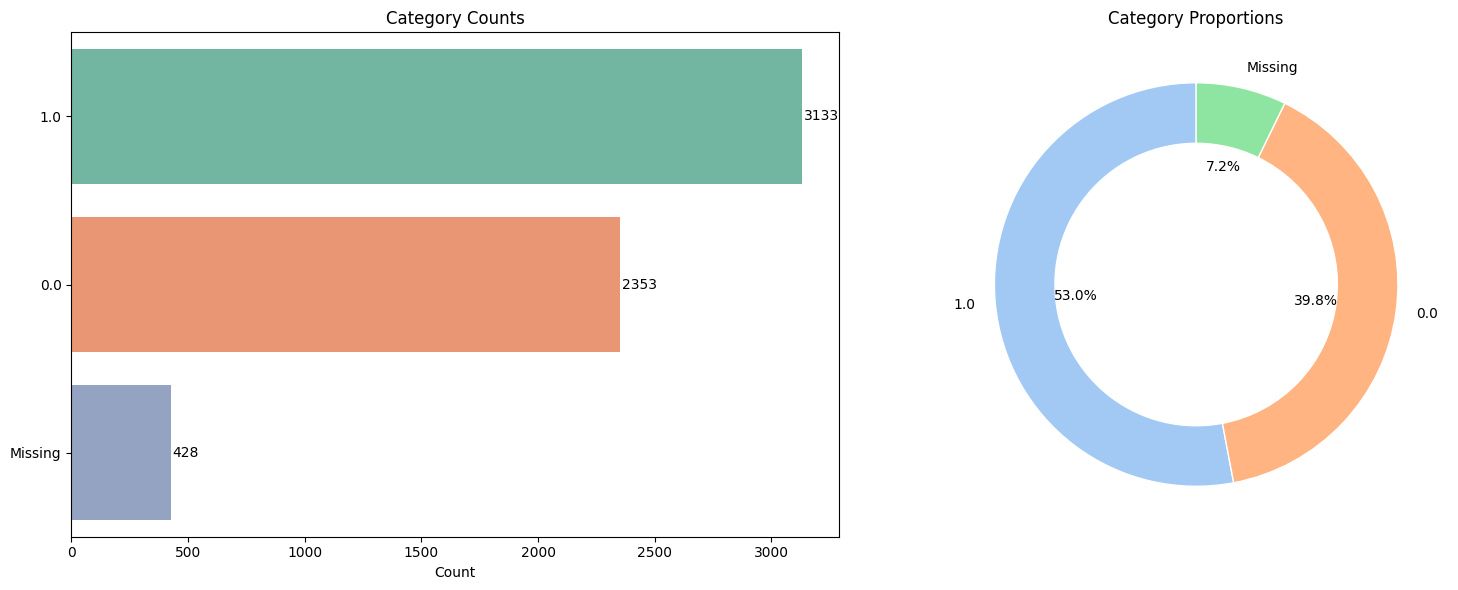

📊 Analyzing Categorical Column: **GPU_company**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 256 (4.33%)
🔹 Unique Categories: 7

🔹 Category Distribution (including NaNs):
             Count  Percentage
GPU_company                   
Qualcomm      2432       41.12
ARM           2179       36.84
Imagination    816       13.80
NaN            256        4.33
Apple          107        1.81
Other           89        1.50
NVIDIA          29        0.49
Intel            6        0.10


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


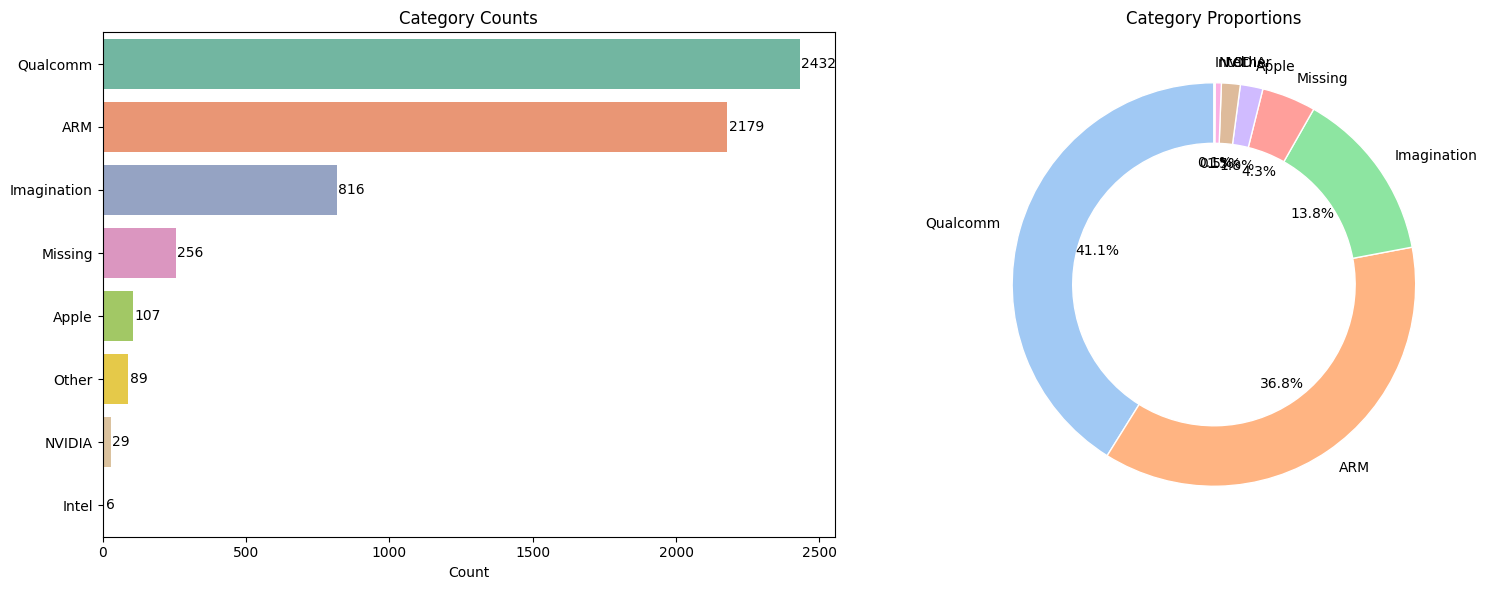

📊 Analyzing Categorical Column: **Number_of_cores**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 48 (0.81%)
🔹 Unique Categories: 6

🔹 Category Distribution (including NaNs):
                 Count  Percentage
Number_of_cores                   
octa              4336       73.32
quad              1045       17.67
dual               285        4.82
hexa               125        2.11
single              54        0.91
NaN                 48        0.81
deca                21        0.36


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


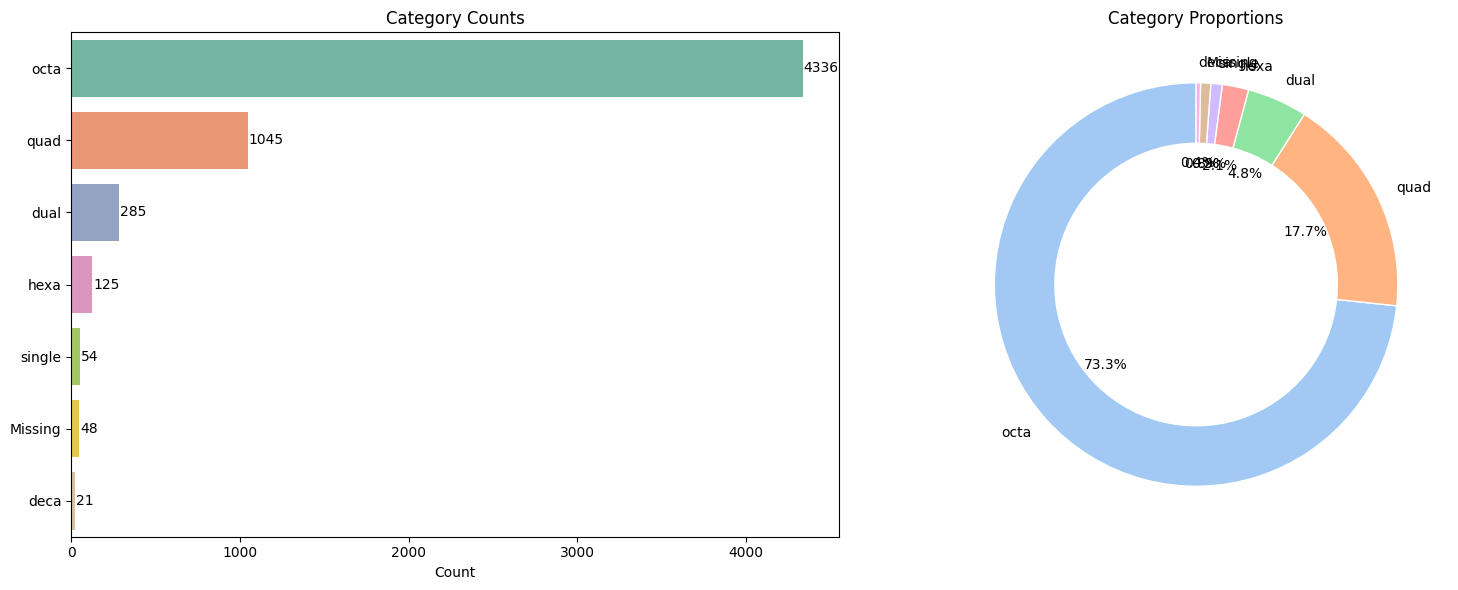

📊 Analyzing Categorical Column: **CPU_Brand**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 195 (3.30%)
🔹 Unique Categories: 9

🔹 Category Distribution (including NaNs):
           Count  Percentage
CPU_Brand                   
qualcomm    2432       41.12
mediatek    2220       37.54
unisoc       377        6.37
kirin        228        3.86
NaN          195        3.30
apple        131        2.22
exynos       130        2.20
others       121        2.05
intel         47        0.79
google        33        0.56


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


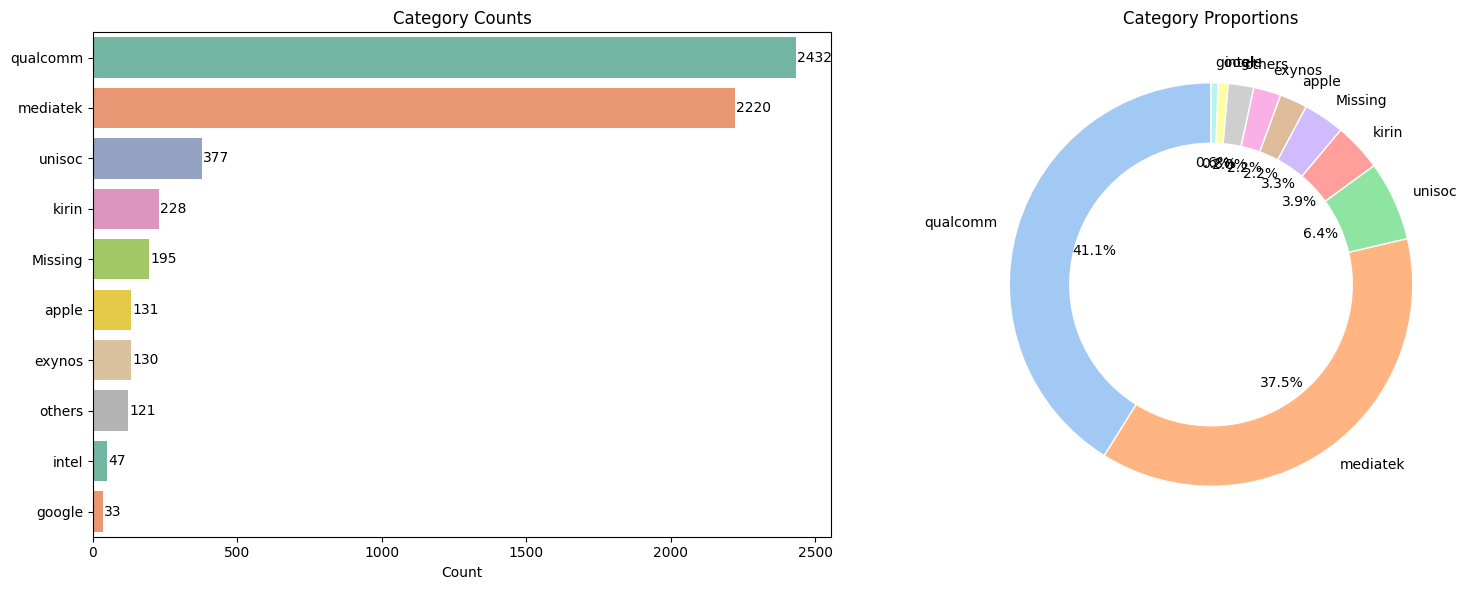

📊 Analyzing Categorical Column: **Is_OS_Upgradable**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 24 (0.41%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                  Count  Percentage
Is_OS_Upgradable                   
False              4164       70.41
True               1726       29.18
NaN                  24        0.41


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


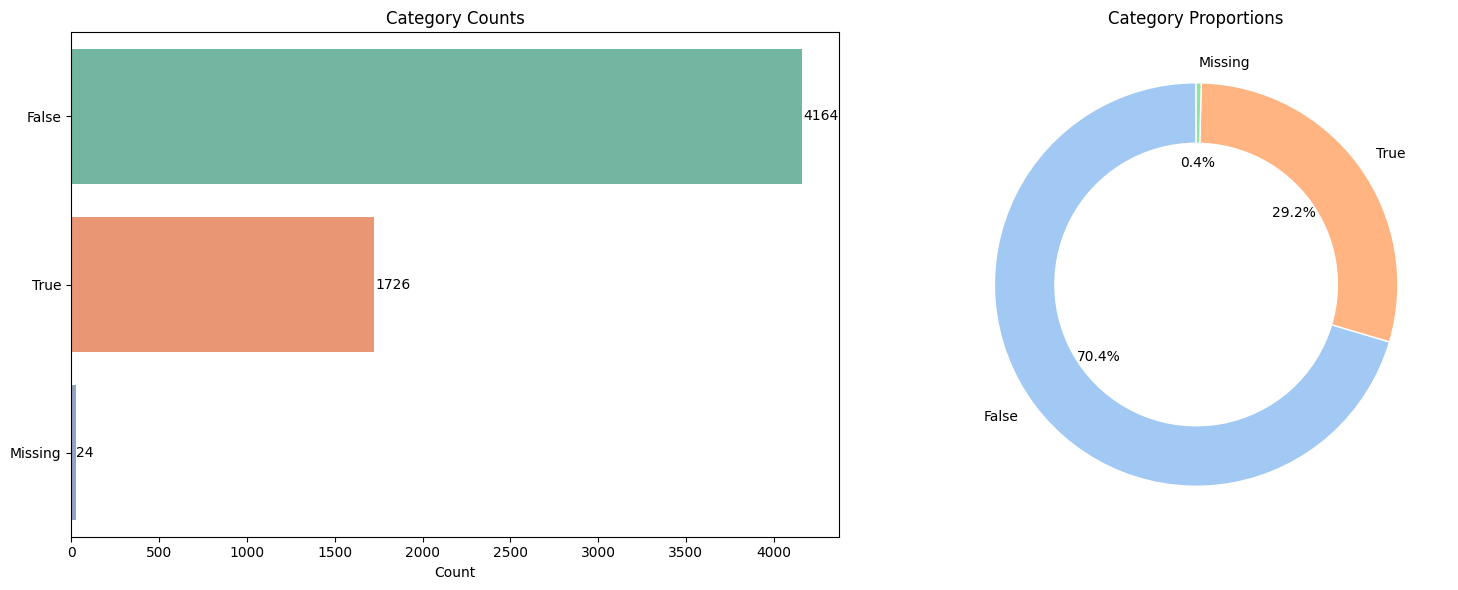

📊 Analyzing Categorical Column: **os_version**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 60 (1.01%)
🔹 Unique Categories: 91

🔹 Category Distribution (including NaNs):
                             Count  Percentage
os_version                                    
Android 11                     722       12.21
Android 14                     689       11.65
Android 10                     589        9.96
Android 13                     578        9.77
Android 12                     560        9.47
Android 9.0                    390        6.59
Android 4.4                    263        4.45
Android 6.0                    217        3.67
Android 5.1                    202        3.42
Android 8.1                    192        3.25
Android 15                     152        2.57
Android 7.0                    131        2.22
Android 5.0                    122        2.06
Android 7.1                    120        2.03
Android 4.2                    1

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


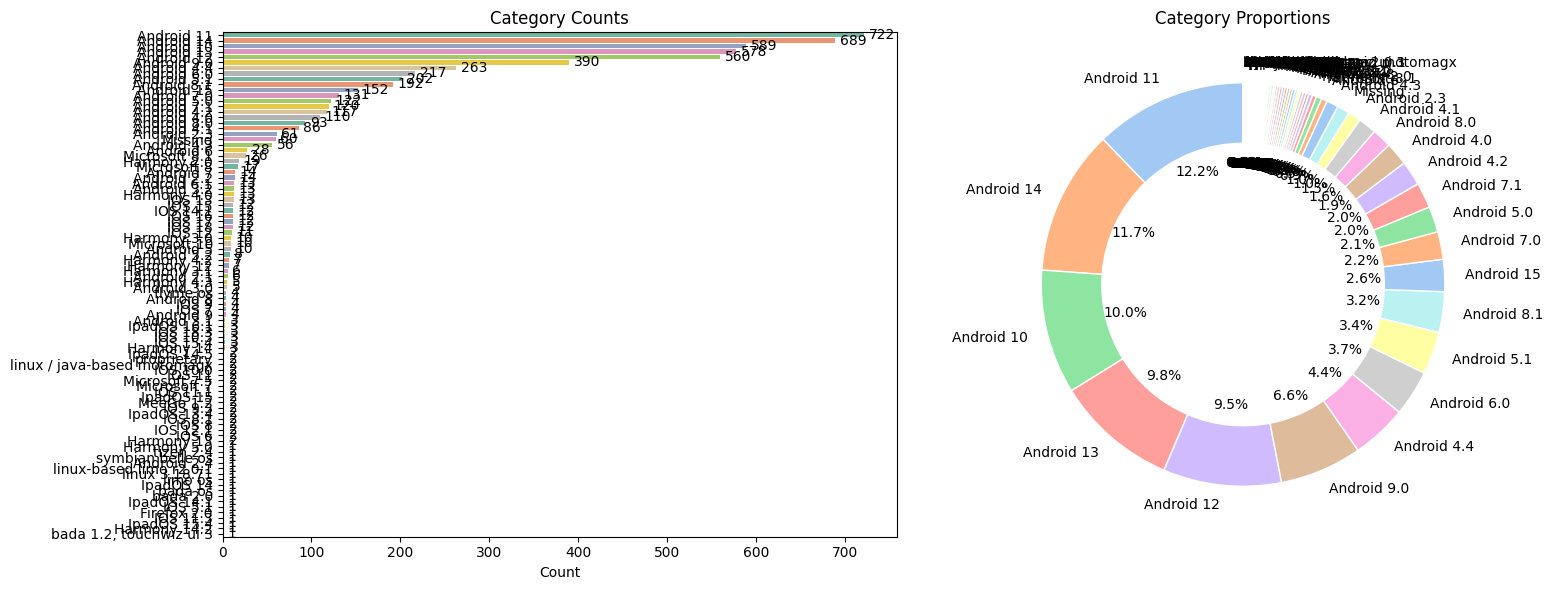

📊 Analyzing Categorical Column: **has_8k**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
        Count  Percentage
has_8k                   
0        5617       94.98
1         297        5.02


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


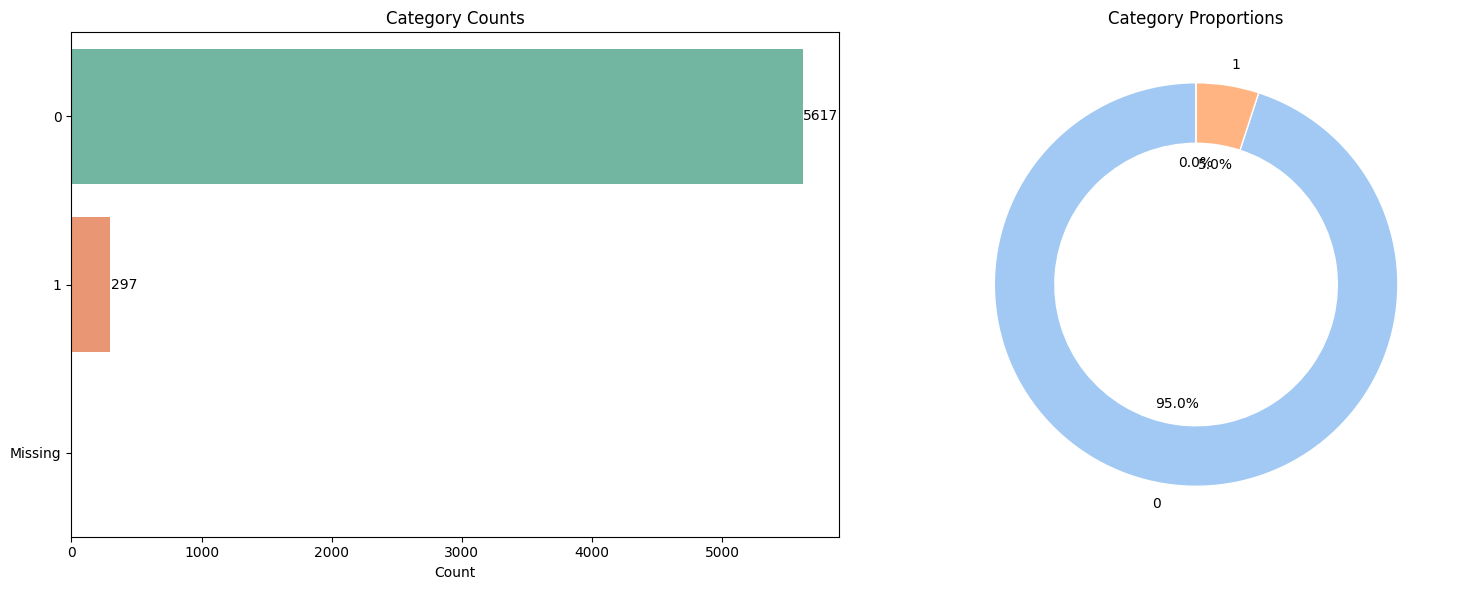

📊 Analyzing Categorical Column: **has_4k**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
        Count  Percentage
has_4k                   
0        3819       64.58
1        2095       35.42


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


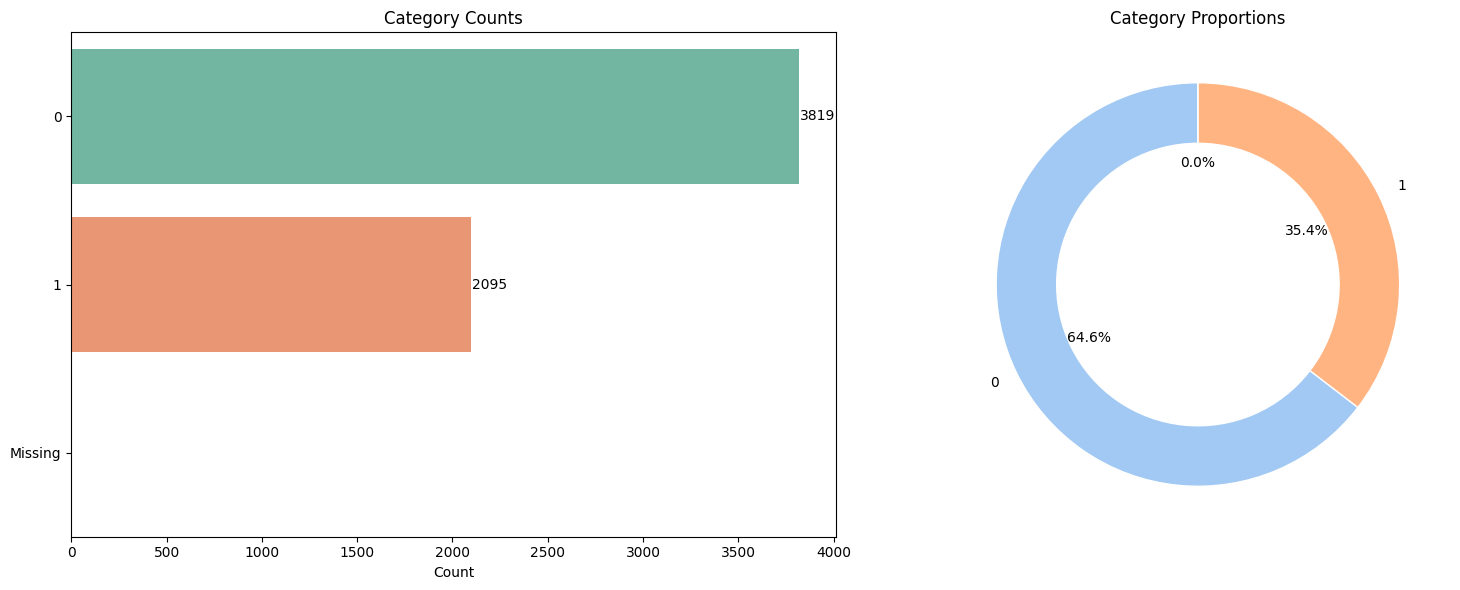

📊 Analyzing Categorical Column: **has_1440p**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
           Count  Percentage
has_1440p                   
0           5766        97.5
1            148         2.5


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


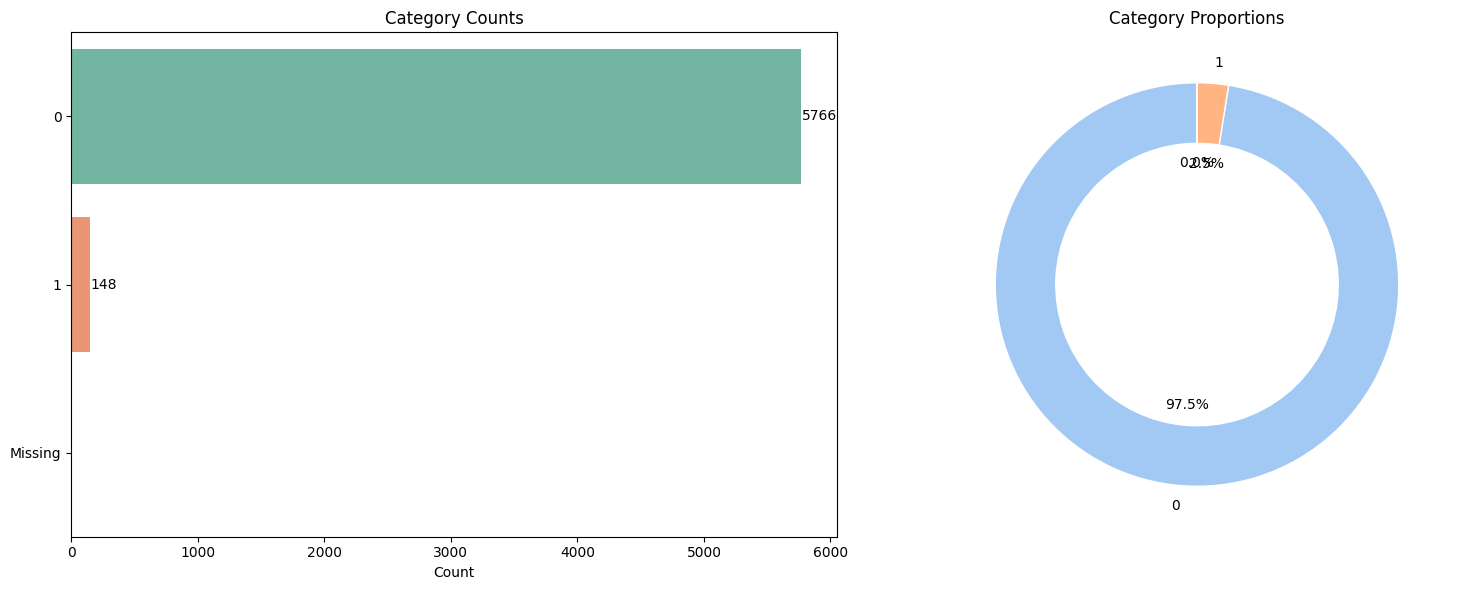

📊 Analyzing Categorical Column: **has_1080p**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
           Count  Percentage
has_1080p                   
1           5153       87.13
0            761       12.87


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


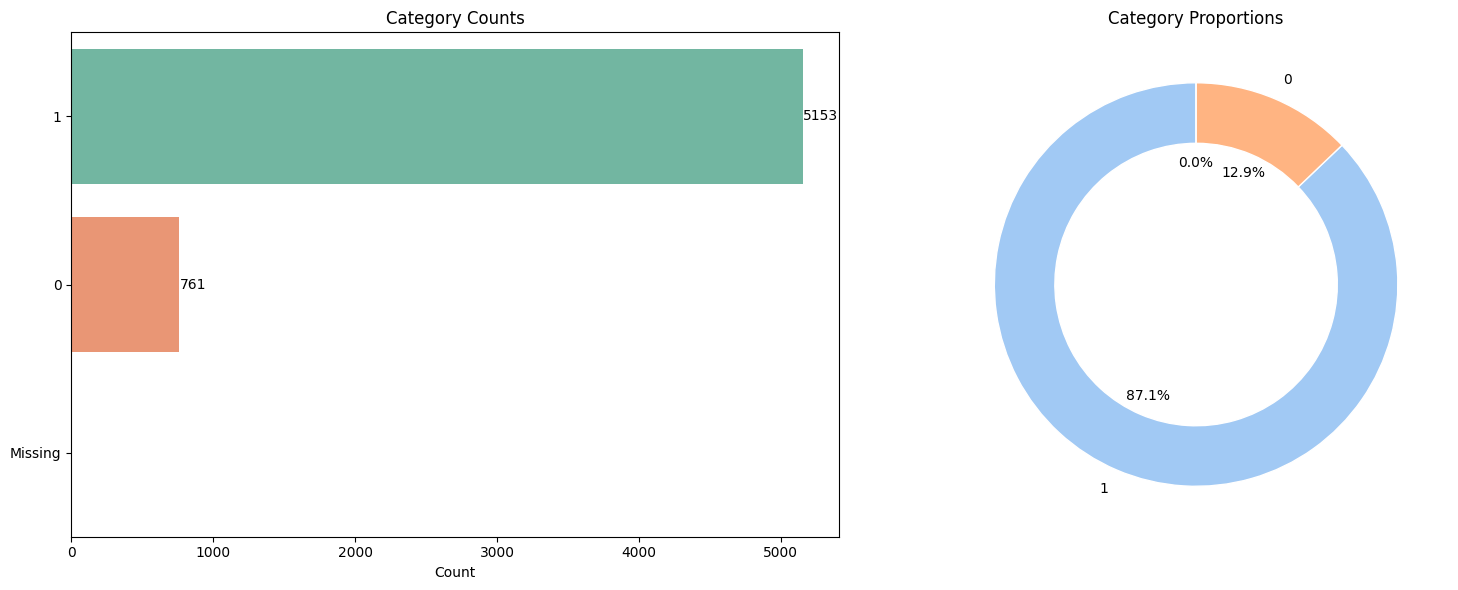

📊 Analyzing Categorical Column: **has_720p**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_720p                   
0          5107       86.35
1           807       13.65


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


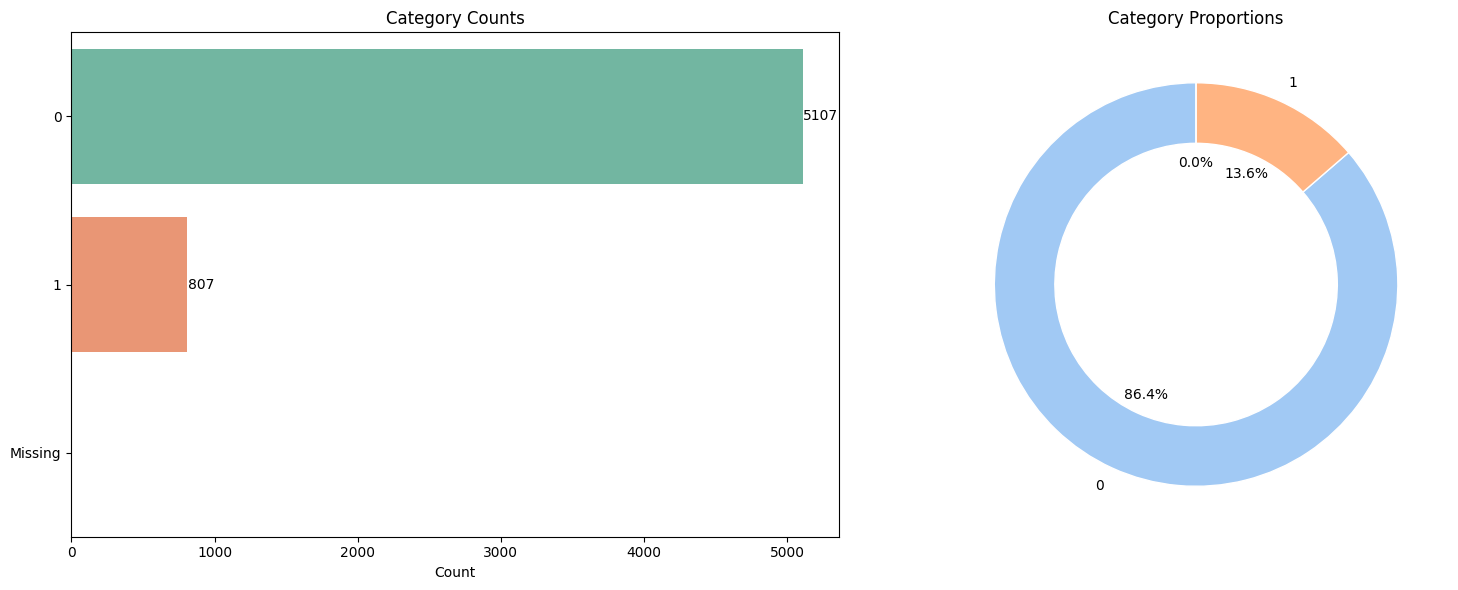

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


📊 Analyzing Categorical Column: **has_480p**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
          Count  Percentage
has_480p                   
0          5864       99.15
1            50        0.85


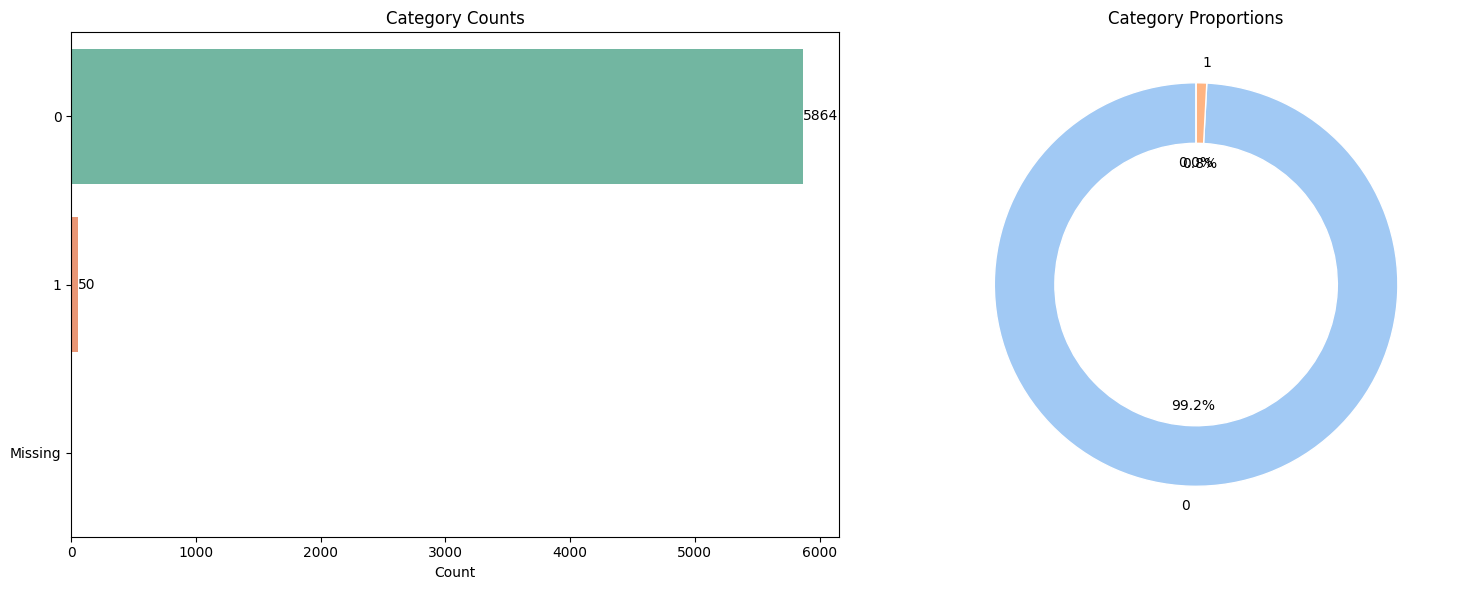

📊 Analyzing Categorical Column: **has_EIS**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
         Count  Percentage
has_EIS                   
0         4514       76.33
1         1400       23.67


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


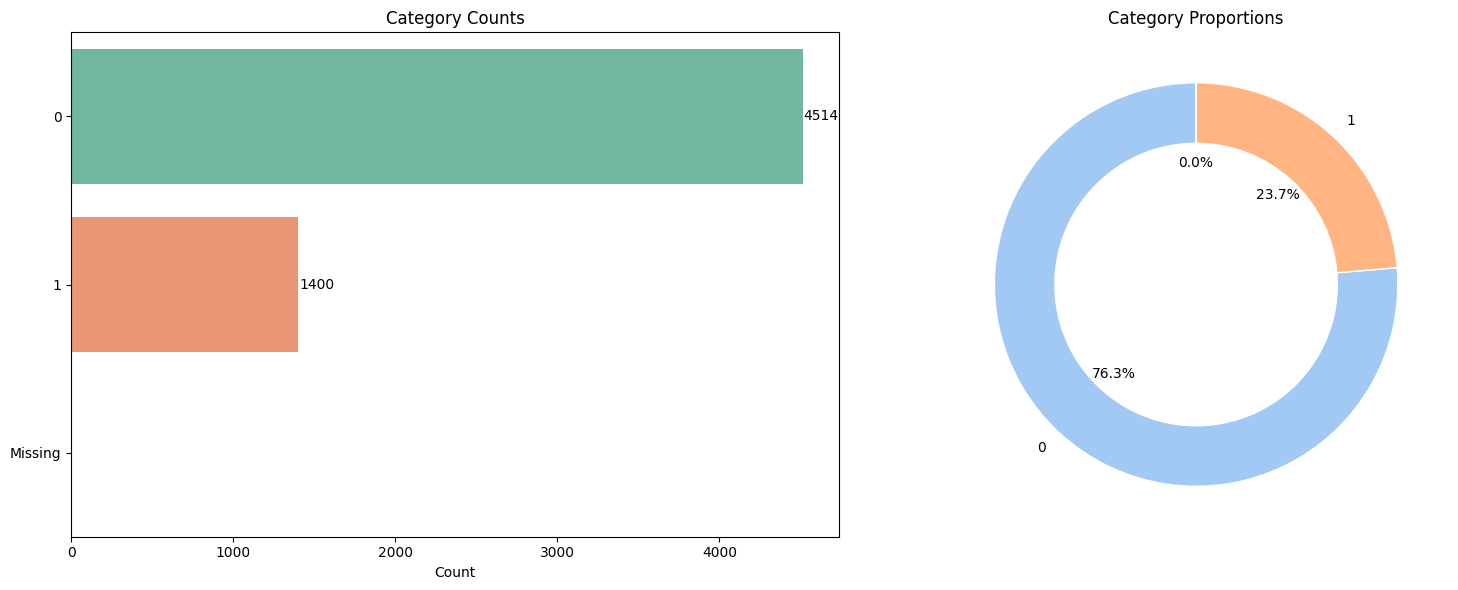

📊 Analyzing Categorical Column: **has_HDR**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
         Count  Percentage
has_HDR                   
0         5273       89.16
1          641       10.84


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


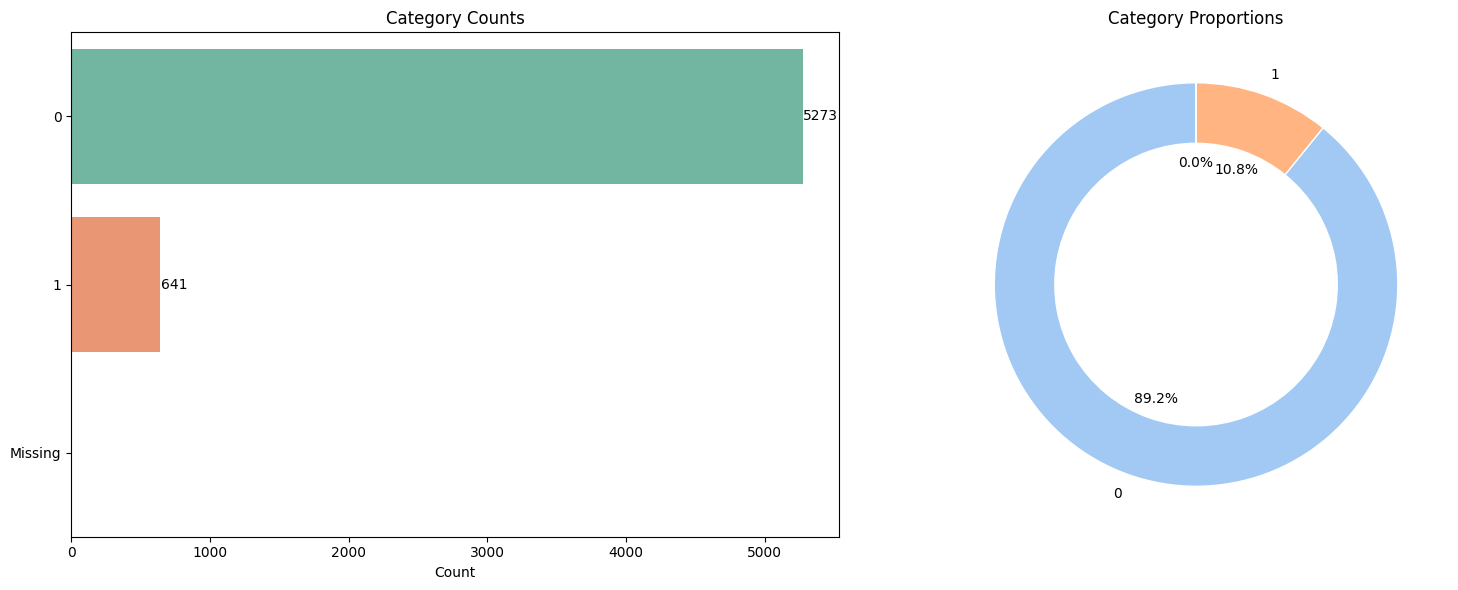

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


📊 Analyzing Categorical Column: **has_stereo**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
            Count  Percentage
has_stereo                   
0            5685       96.13
1             229        3.87


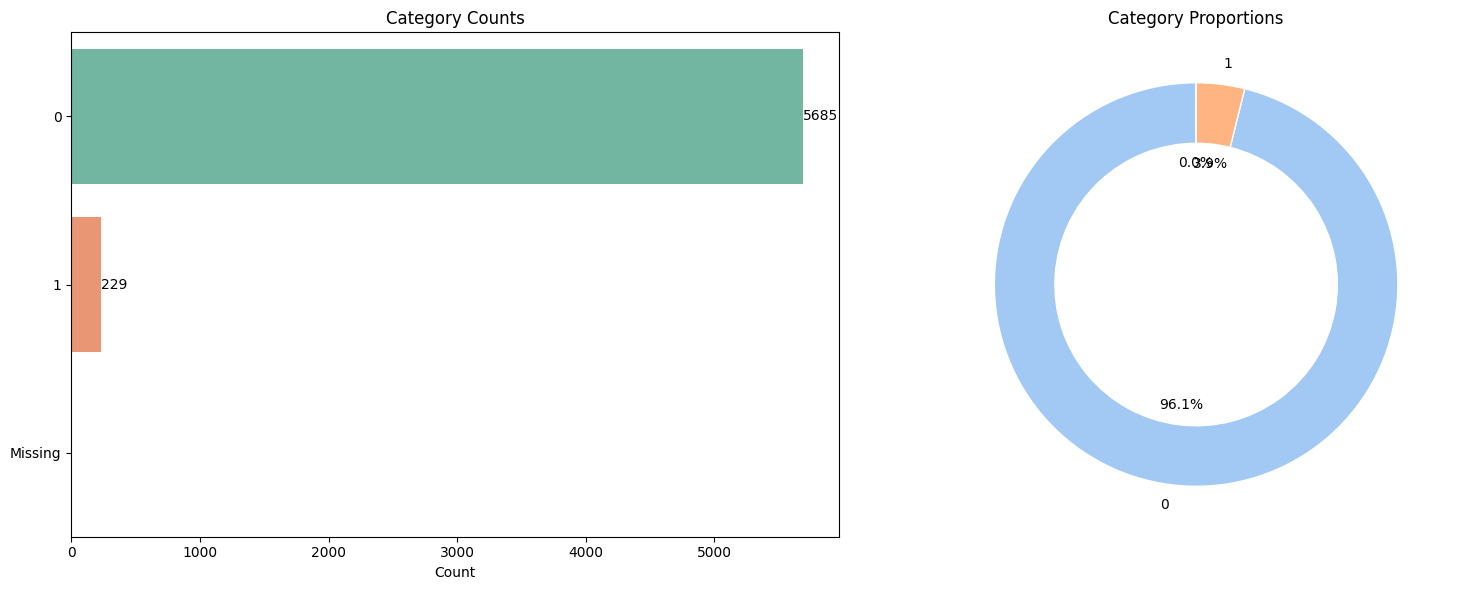

📊 Analyzing Categorical Column: **has_dolby_vision**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
                  Count  Percentage
has_dolby_vision                   
0                  5815       98.33
1                    99        1.67


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


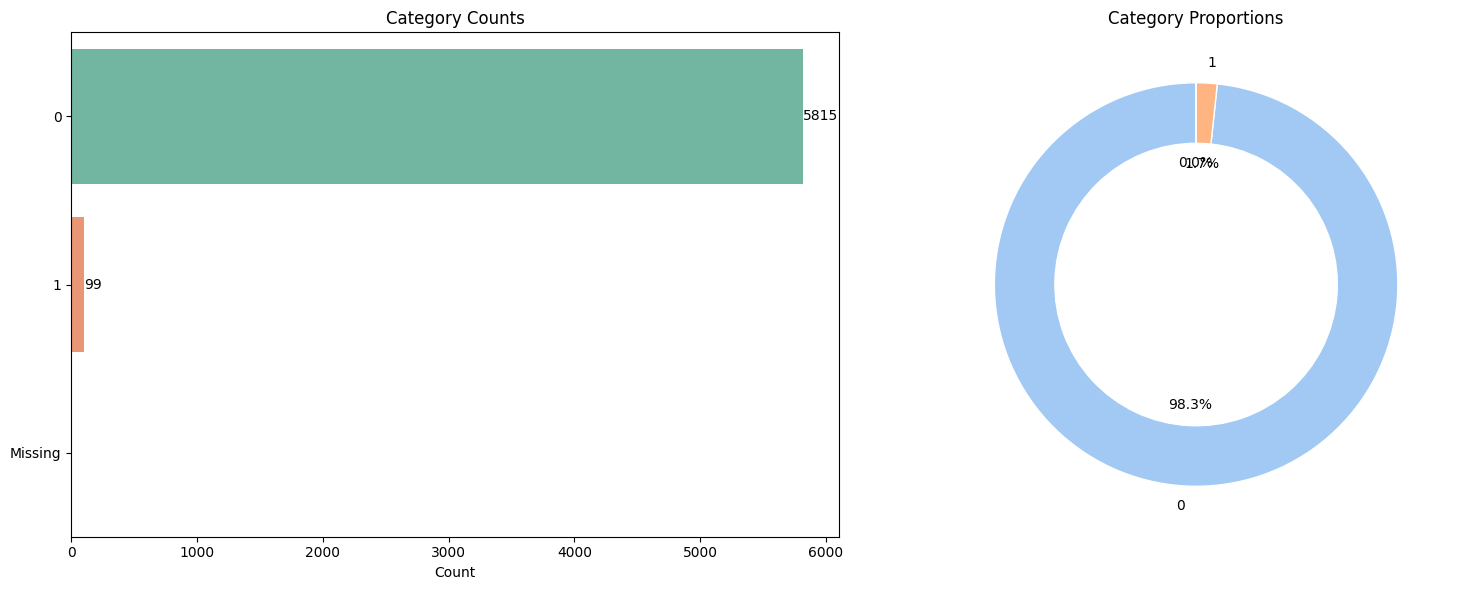

📊 Analyzing Categorical Column: **has_OIS**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
         Count  Percentage
has_OIS                   
0         5673       95.92
1          241        4.08


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


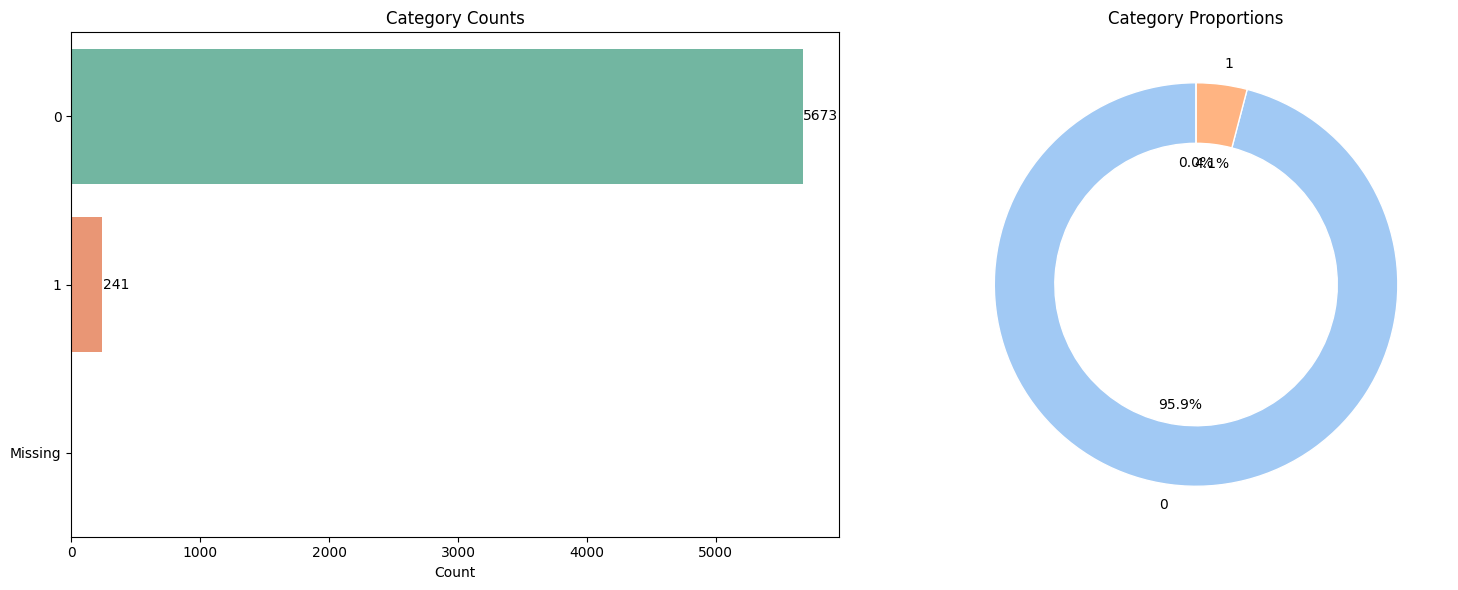

📊 Analyzing Categorical Column: **max_resolution**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 6

🔹 Category Distribution (including NaNs):
                Count  Percentage
max_resolution                   
1080p            2983       50.44
4k               1800       30.44
0                 365        6.17
720p              321        5.43
8k                297        5.02
1440p             148        2.50


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


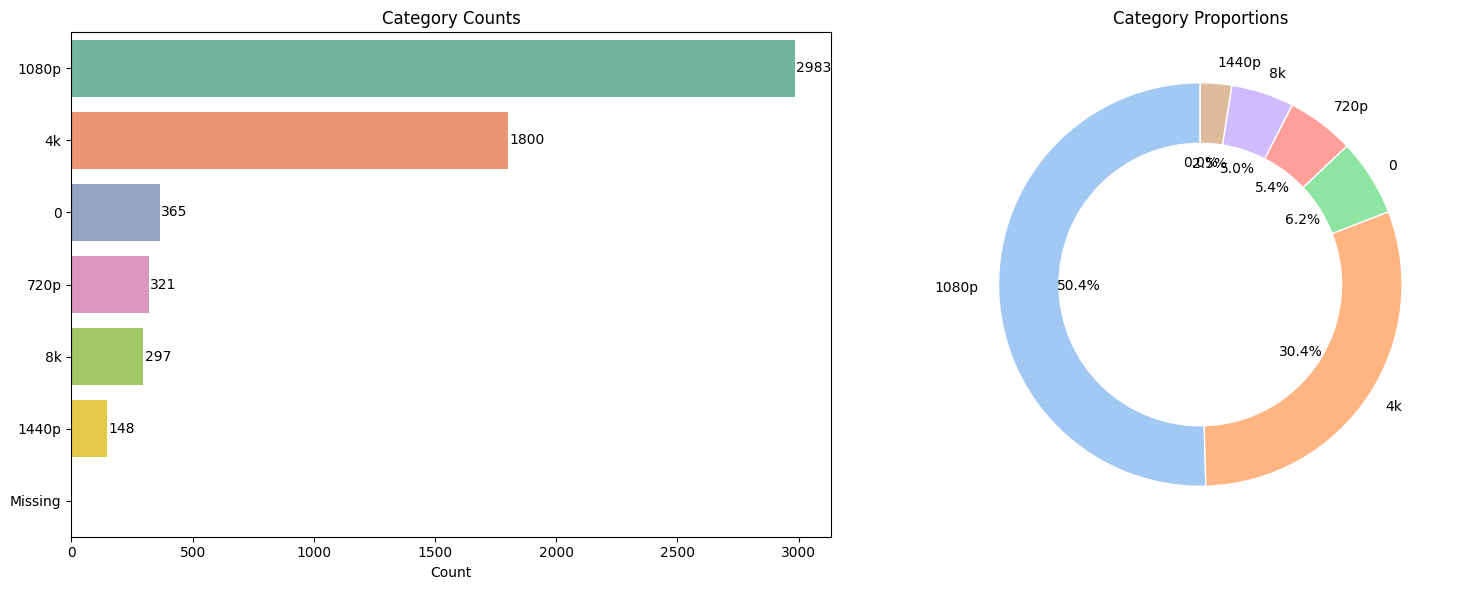

📊 Analyzing Categorical Column: **max_FPS**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 5

🔹 Category Distribution (including NaNs):
         Count  Percentage
max_FPS                   
30        3564       60.26
60         658       11.13
240        598       10.11
0          557        9.42
120        537        9.08


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


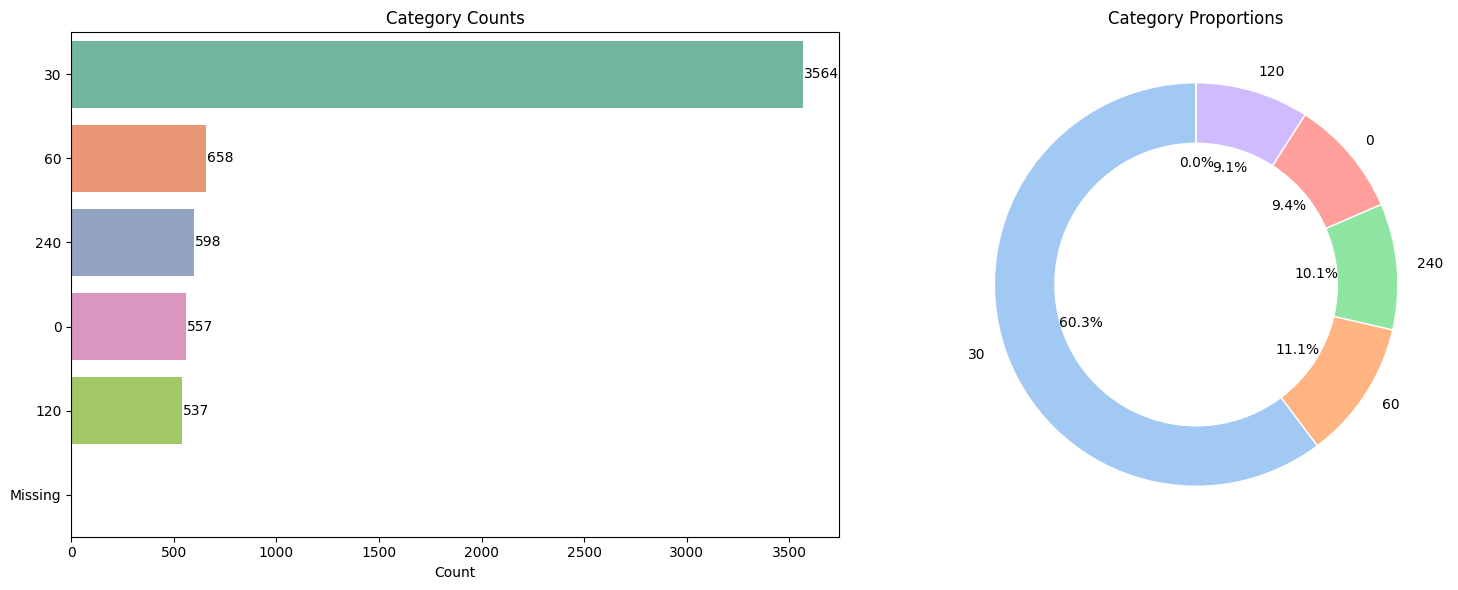

📊 Analyzing Categorical Column: **ram**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 11

🔹 Category Distribution (including NaNs):
     Count  Percentage
ram                   
8     1262       21.34
4     1135       19.19
1      788       13.32
2      765       12.94
6      743       12.56
3      575        9.72
12     444        7.51
16     101        1.71
0       91        1.54
24       8        0.14
32       2        0.03


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


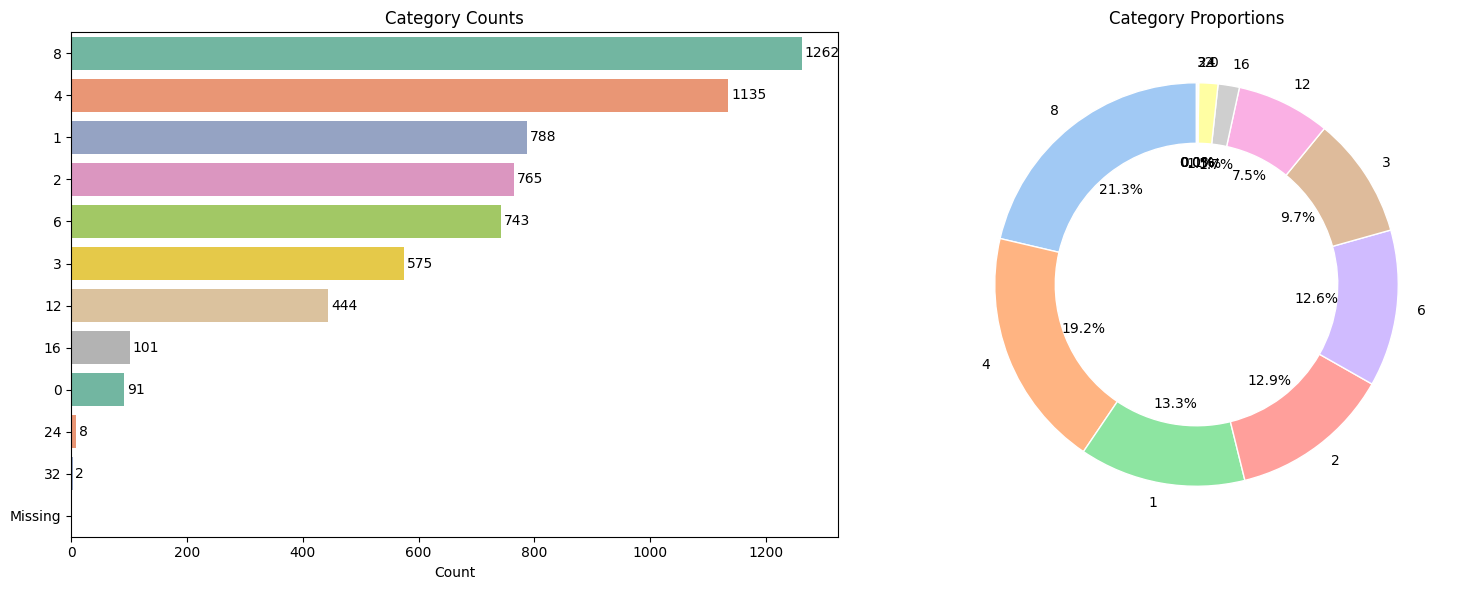

📊 Analyzing Categorical Column: **number_of_camera_features**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 9

🔹 Category Distribution (including NaNs):
                           Count  Percentage
number_of_camera_features                   
3.0                         2490       42.10
0.0                         1228       20.76
1.0                         1128       19.07
2.0                          586        9.91
4.0                          271        4.58
5.0                          141        2.38
6.0                           41        0.69
7.0                           17        0.29
8.0                           12        0.20


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


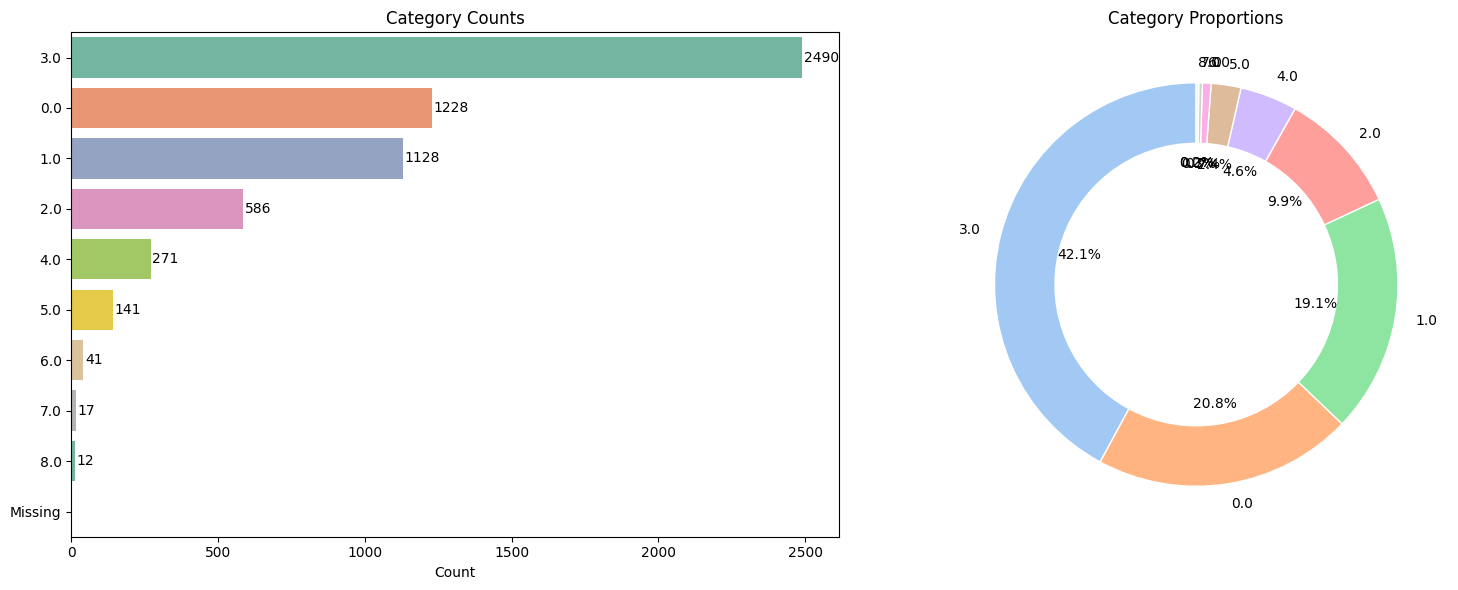

📊 Analyzing Categorical Column: **maincamera_mp**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 34

🔹 Category Distribution (including NaNs):
               Count  Percentage
maincamera_mp                   
50              1311       22.17
13              1162       19.65
8                687       11.62
48               611       10.33
64               457        7.73
5                397        6.71
12               364        6.15
16               322        5.44
108              238        4.02
20                60        1.01
2                 44        0.74
200               39        0.66
3                 31        0.52
40                30        0.51
100               25        0.42
21                24        0.41
23                22        0.37
32                20        0.34
24                12        0.20
4                 11        0.19
19                10        0.17
54                 9   

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


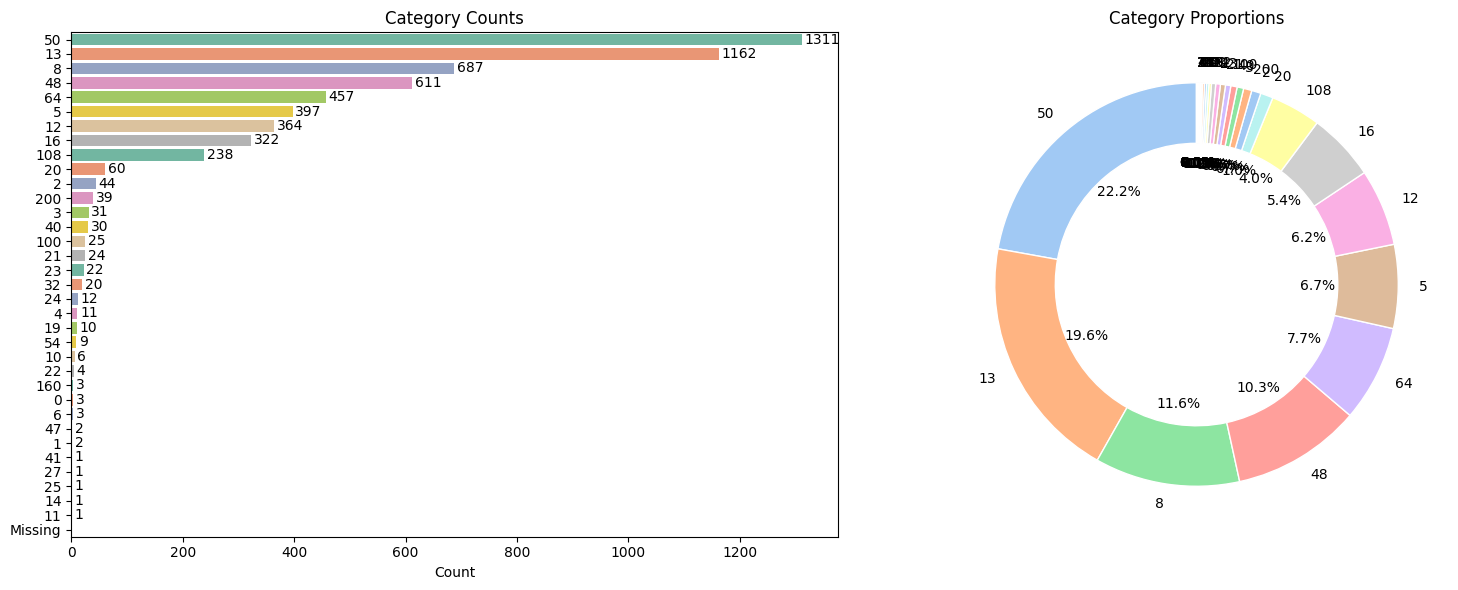

📊 Analyzing Categorical Column: **selfiecamera_mp**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 28

🔹 Category Distribution (including NaNs):
                 Count  Percentage
selfiecamera_mp                   
8                 1332       22.52
5                 1042       17.62
16                1039       17.57
32                 586        9.91
2                  569        9.62
1                  242        4.09
13                 229        3.87
20                 216        3.65
12                 150        2.54
50                 118        2.00
0                   82        1.39
24                  56        0.95
3                   45        0.76
25                  31        0.52
7                   30        0.51
10                  29        0.49
44                  25        0.42
4                   25        0.42
60                  17        0.29
11                  17        0.29
6         

/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


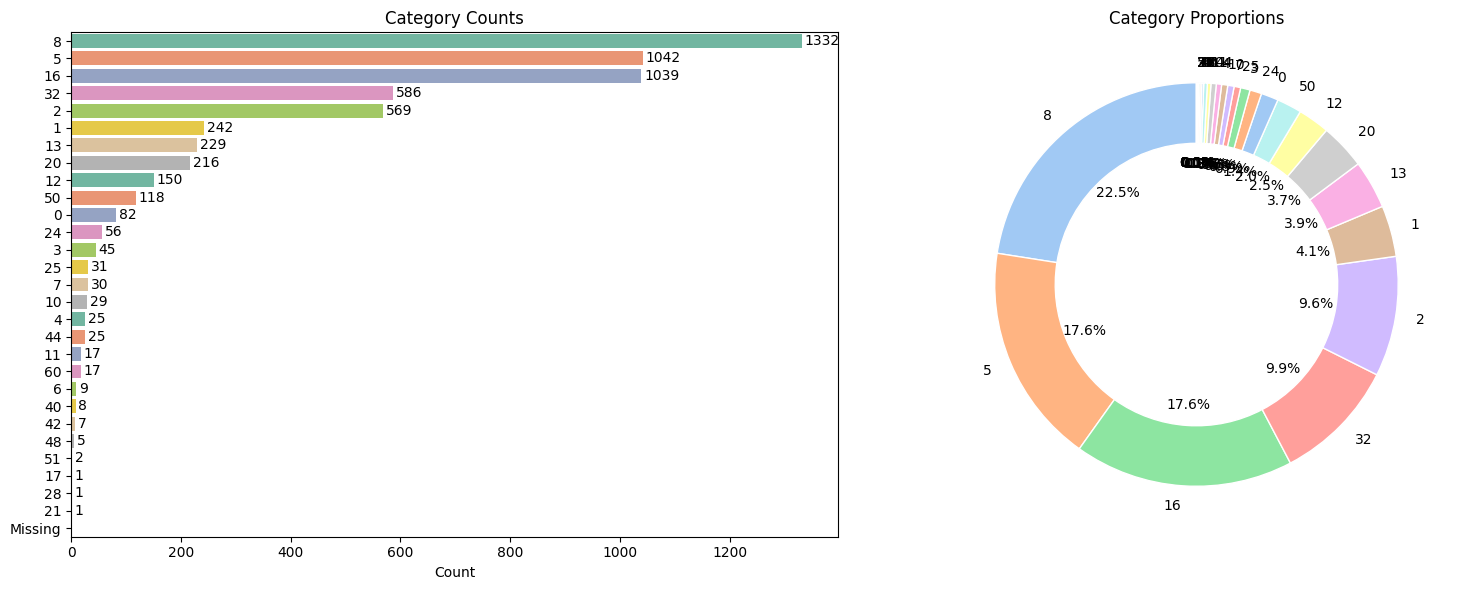

📊 Analyzing Categorical Column: **latest_wifi_version**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 6

🔹 Category Distribution (including NaNs):
                     Count  Percentage
latest_wifi_version                   
2                     2624       44.37
1                     1923       32.52
3                      804       13.59
5                      203        3.43
0                      188        3.18
4                      172        2.91


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


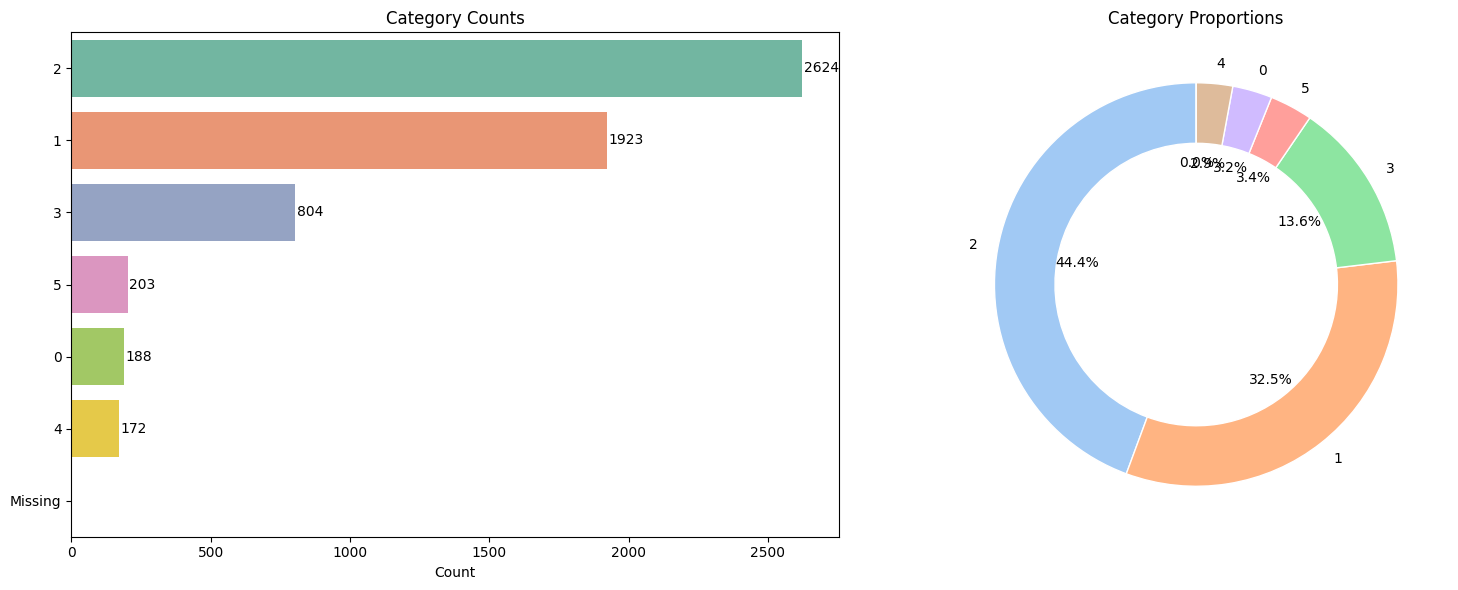

📊 Analyzing Categorical Column: **Bluetooth_version**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 0 (0.00%)
🔹 Unique Categories: 14

🔹 Category Distribution (including NaNs):
                   Count  Percentage
Bluetooth_version                   
5.0                 1403       23.72
4.0                  920       15.56
5.1                  689       11.65
4.2                  676       11.43
5.2                  669       11.31
5.3                  479        8.10
4.1                  316        5.34
0.0                  280        4.73
5.4                  259        4.38
3.0                  122        2.06
2.1                   73        1.23
2.0                   17        0.29
3.1                    7        0.12
6.0                    4        0.07


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


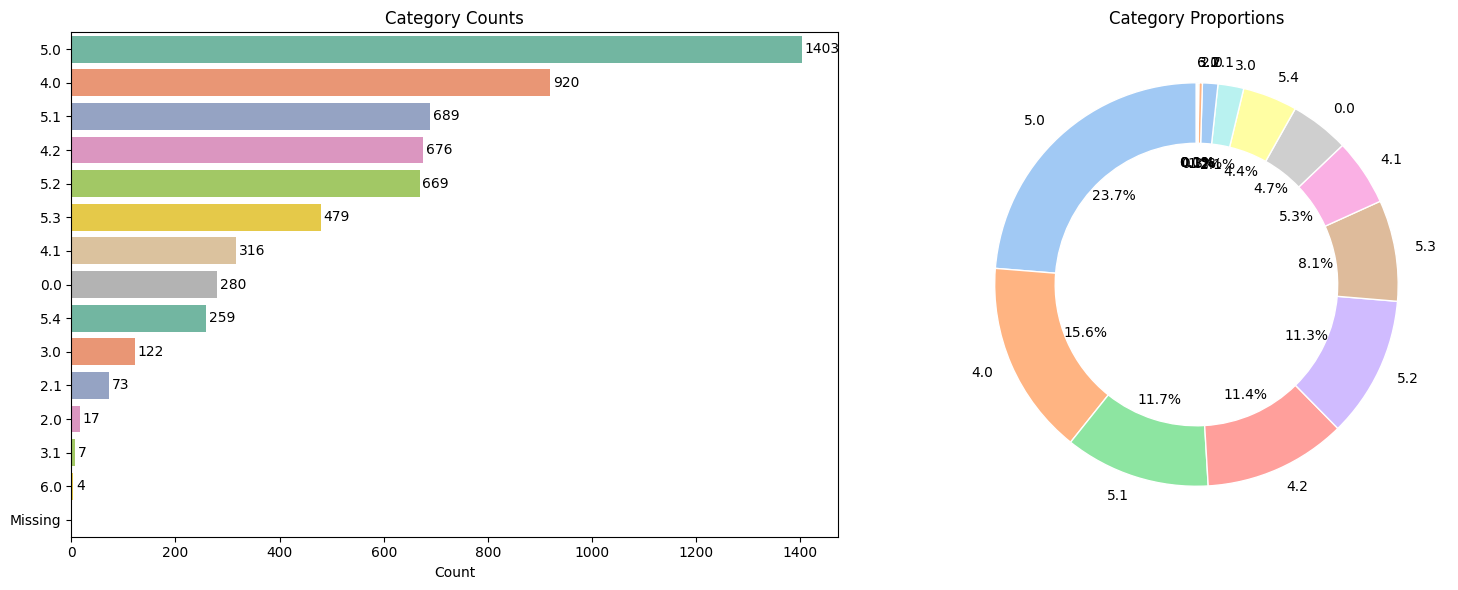

📊 Analyzing Categorical Column: **has_nfc**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 168 (2.84%)
🔹 Unique Categories: 2

🔹 Category Distribution (including NaNs):
         Count  Percentage
has_nfc                   
 1.0      2970       50.22
 0.0      2776       46.94
NaN        168        2.84


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


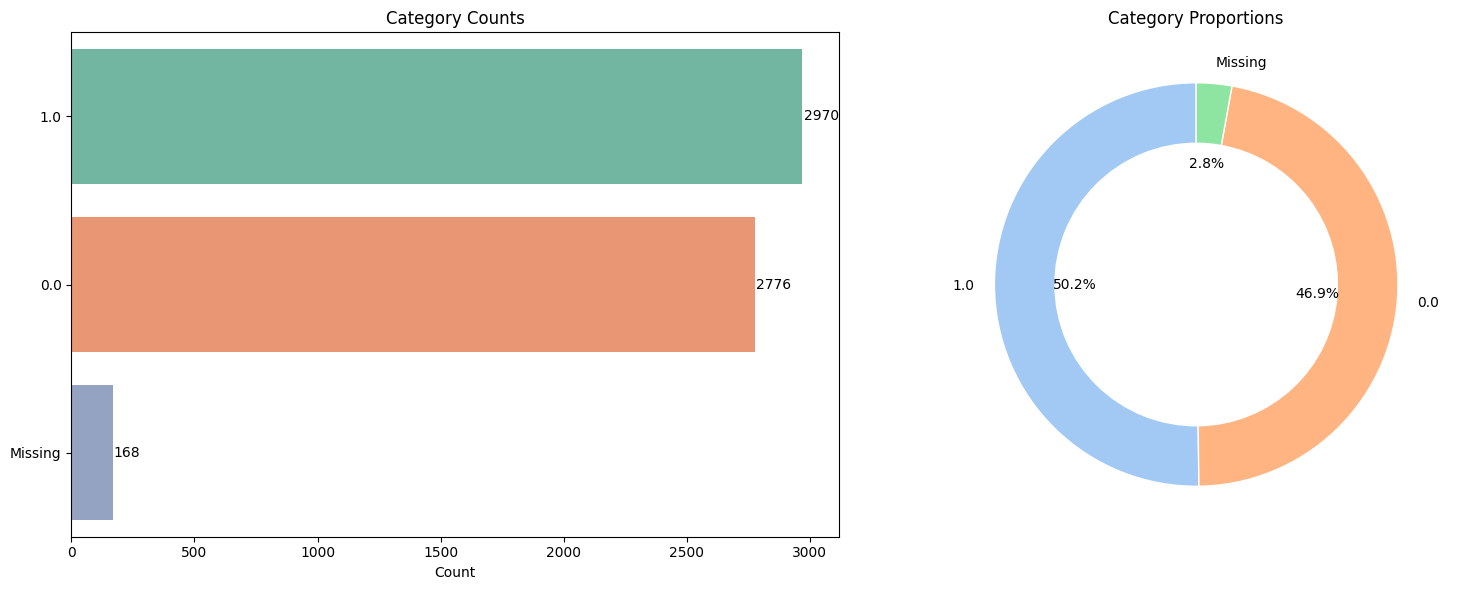

📊 Analyzing Categorical Column: **USB_Type**
--------------------------------------------------
🔹 Data Type: category
🔹 Missing Values: 7 (0.12%)
🔹 Unique Categories: 4

🔹 Category Distribution (including NaNs):
           Count  Percentage
USB_Type                    
Type-C      3652       61.75
Type-B      2089       35.32
Lightning     91        1.54
Other         75        1.27
NaN            7        0.12


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_plot, y=col, order=df_plot[col].value_counts().index, palette='Set2', ax=axs[0])


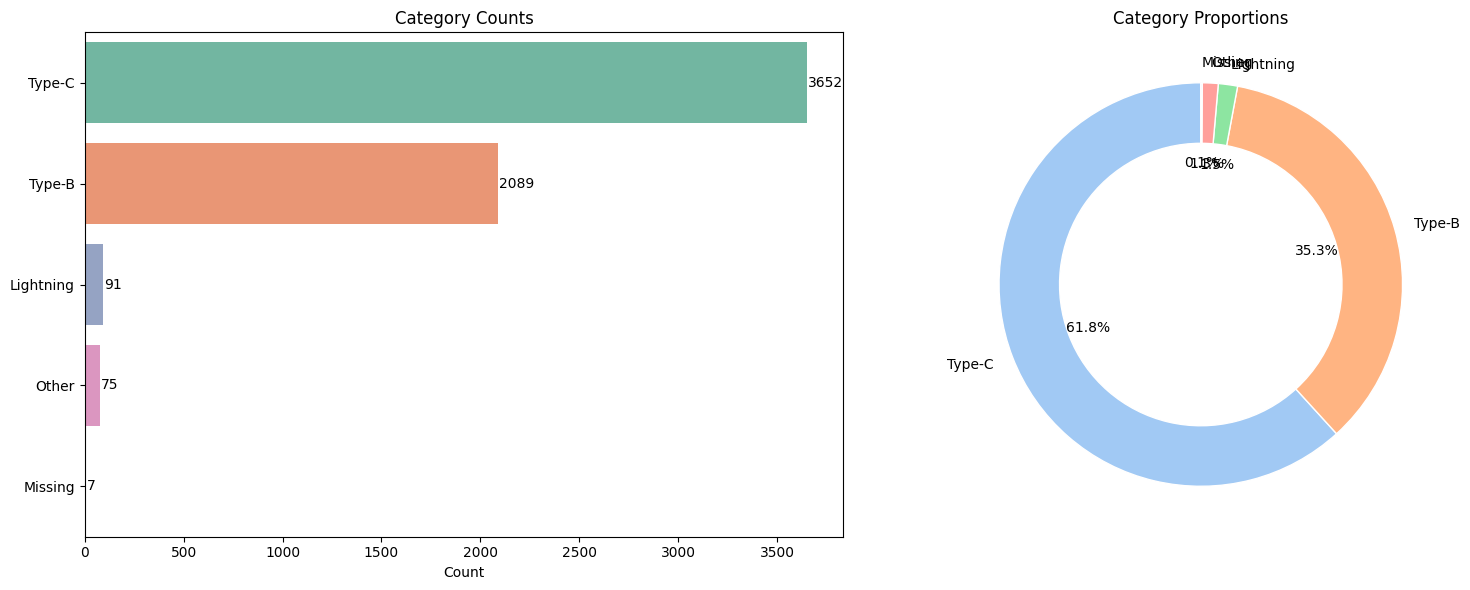

In [15]:
for col in categorical_cols:
  univariate_categorical_analysis(df, col)

## Analyzing columns which are having Outliers


##### 1. Thickness


📊 Analyzing Numerical Column: **thickness**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 150 (2.54%)
🔹 Unique Values: 163

🔹 Descriptive Statistics (excluding NaNs):
count    5764.000000
mean        8.849967
std         2.064094
min         0.000000
25%         7.900000
50%         8.400000
75%         9.000000
max        27.500000
Name: thickness, dtype: float64

🔹 Outliers Detected (IQR): 545
    - Lower bound: 6.25
    - Upper bound: 10.65


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


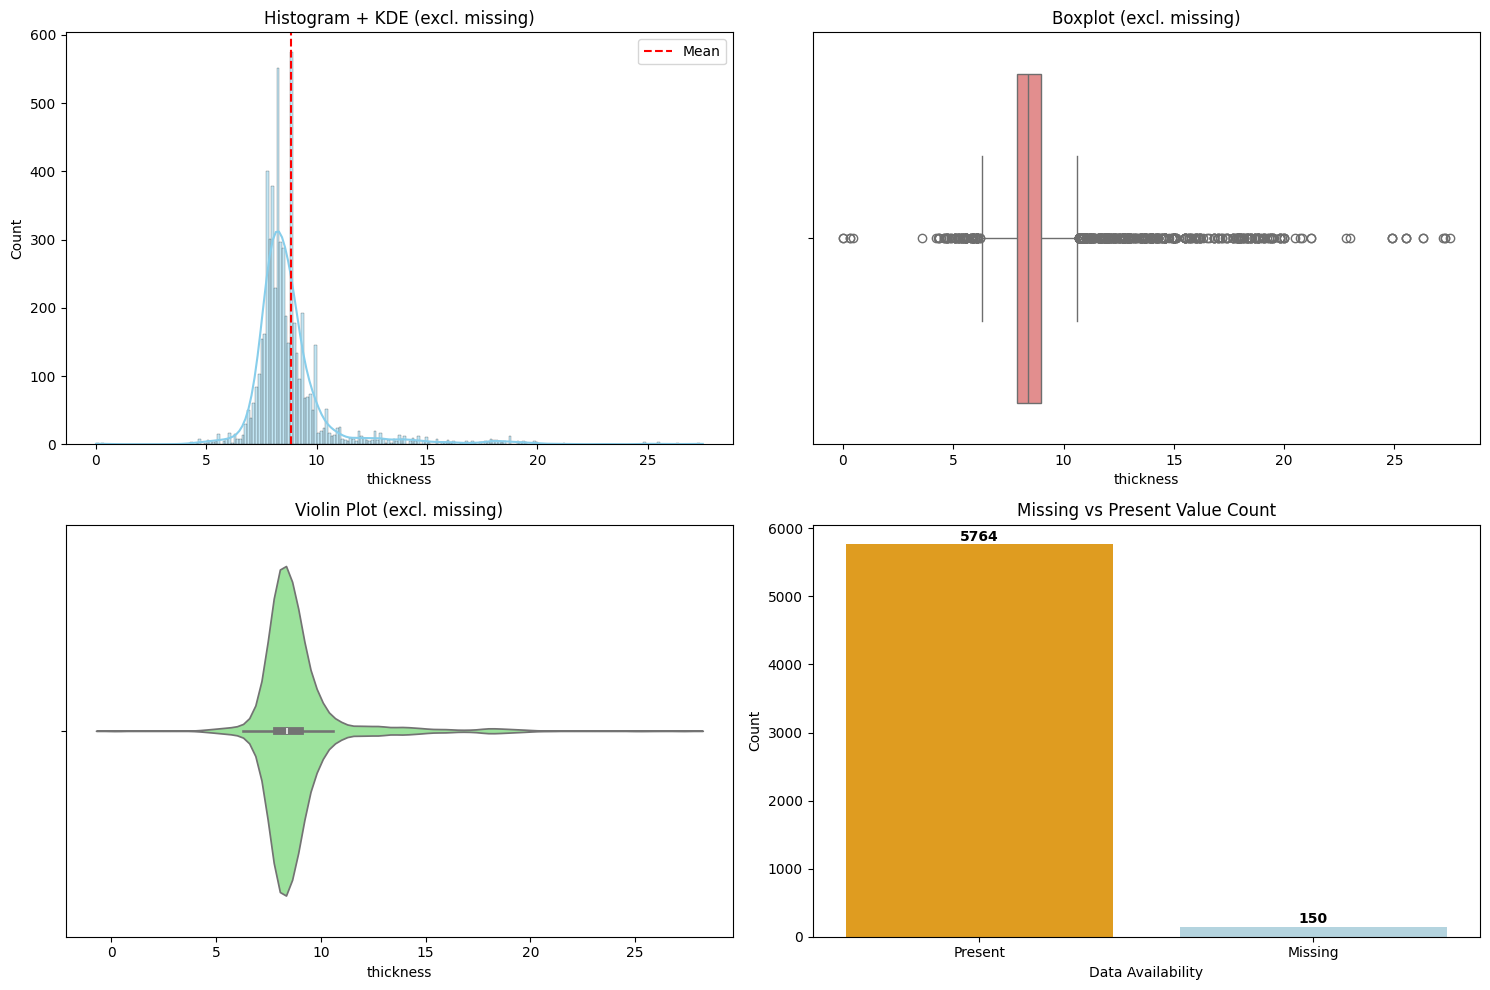

In [16]:
univariate_numerical_analysis(df, 'thickness')

### Observations:

    - The phones which are having thickness < 2 are having thickness in inches => Convert to Millimeters.
    - The phones which are having thickness == 0, it is wrong, fill these values manually.
    - The thickness which are on the greater side are valid and are not wrong values.


In [17]:
df[df['thickness'] > 20][['Name', 'thickness']].sample(5)

Name  thickness
1116          Doogee V Max Plus       26.3
4728     Ulefone Armor 26 Ultra       25.5
1065           Blackview BV9300       22.8
1200  Ulefone Armor Mini 20 Pro       24.9
2051                  HTC P6500       20.5

#### 2. Battery_Capacity


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


📊 Analyzing Numerical Column: **Battery_Capacity**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 52 (0.88%)
🔹 Unique Values: 451

🔹 Descriptive Statistics (excluding NaNs):
count     5862.000000
mean      4415.941658
std       1929.970550
min        770.000000
25%       3142.500000
50%       4500.000000
75%       5000.000000
max      33280.000000
Name: Battery_Capacity, dtype: float64

🔹 Outliers Detected (IQR): 216
    - Lower bound: 356.25
    - Upper bound: 7786.25


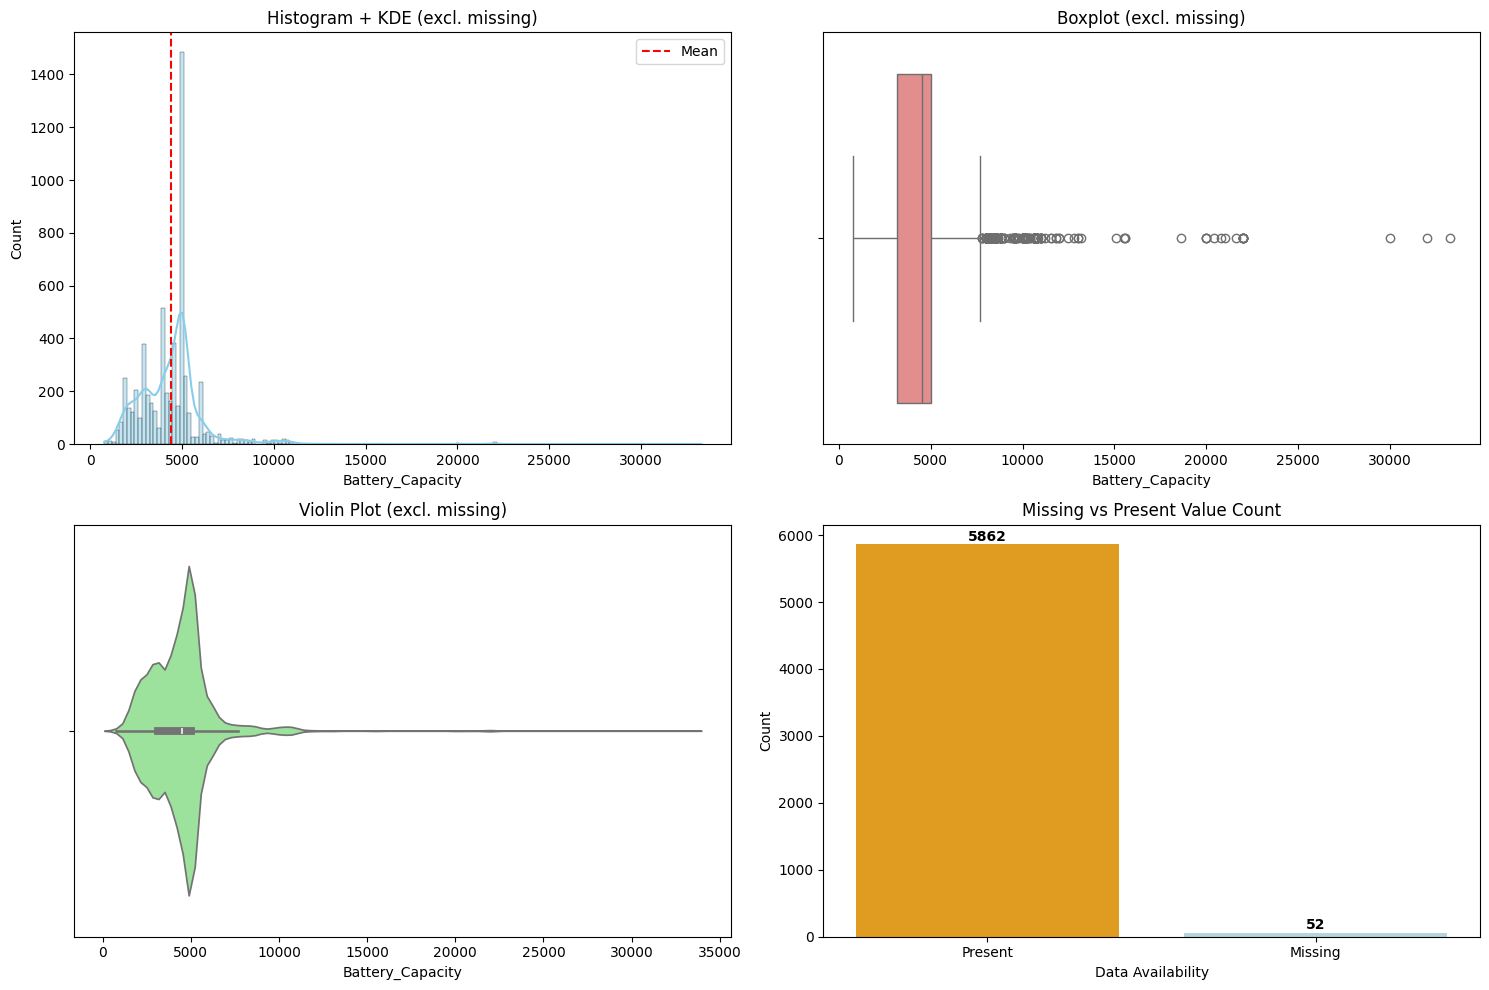

In [18]:
univariate_numerical_analysis(df, 'Battery_Capacity')

Phones : Oukitel WP19, Doogee V Max, Doogee S100 Pro, Oukitel WP33 Pro, Blackview BV9300, Doogee V Max Plus
Doogee V Max Pro, Ulefone Armor 24, Doogee Fire 6 Power, Doogee Fire 6 Max, Ulefone Armor 26 Ultra

All of the above are the phones and the rest of the devices having battery capacity > 15000 are tablets.

- Keep the above devices and remove all the other devices whose battery capacity > 15000.


In [19]:
df[df['Battery_Capacity'] > 10000].shape

(97, 70)

#### 3. Display_Size


📊 Analyzing Numerical Column: **Display_Size**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 192

🔹 Descriptive Statistics (excluding NaNs):


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


count    5914.000000
mean        6.320372
std         1.252421
min         2.000000
25%         5.500000
50%         6.500000
75%         6.700000
max        14.600000
Name: Display_Size, dtype: float64

🔹 Outliers Detected (IQR): 310
    - Lower bound: 3.70
    - Upper bound: 8.50


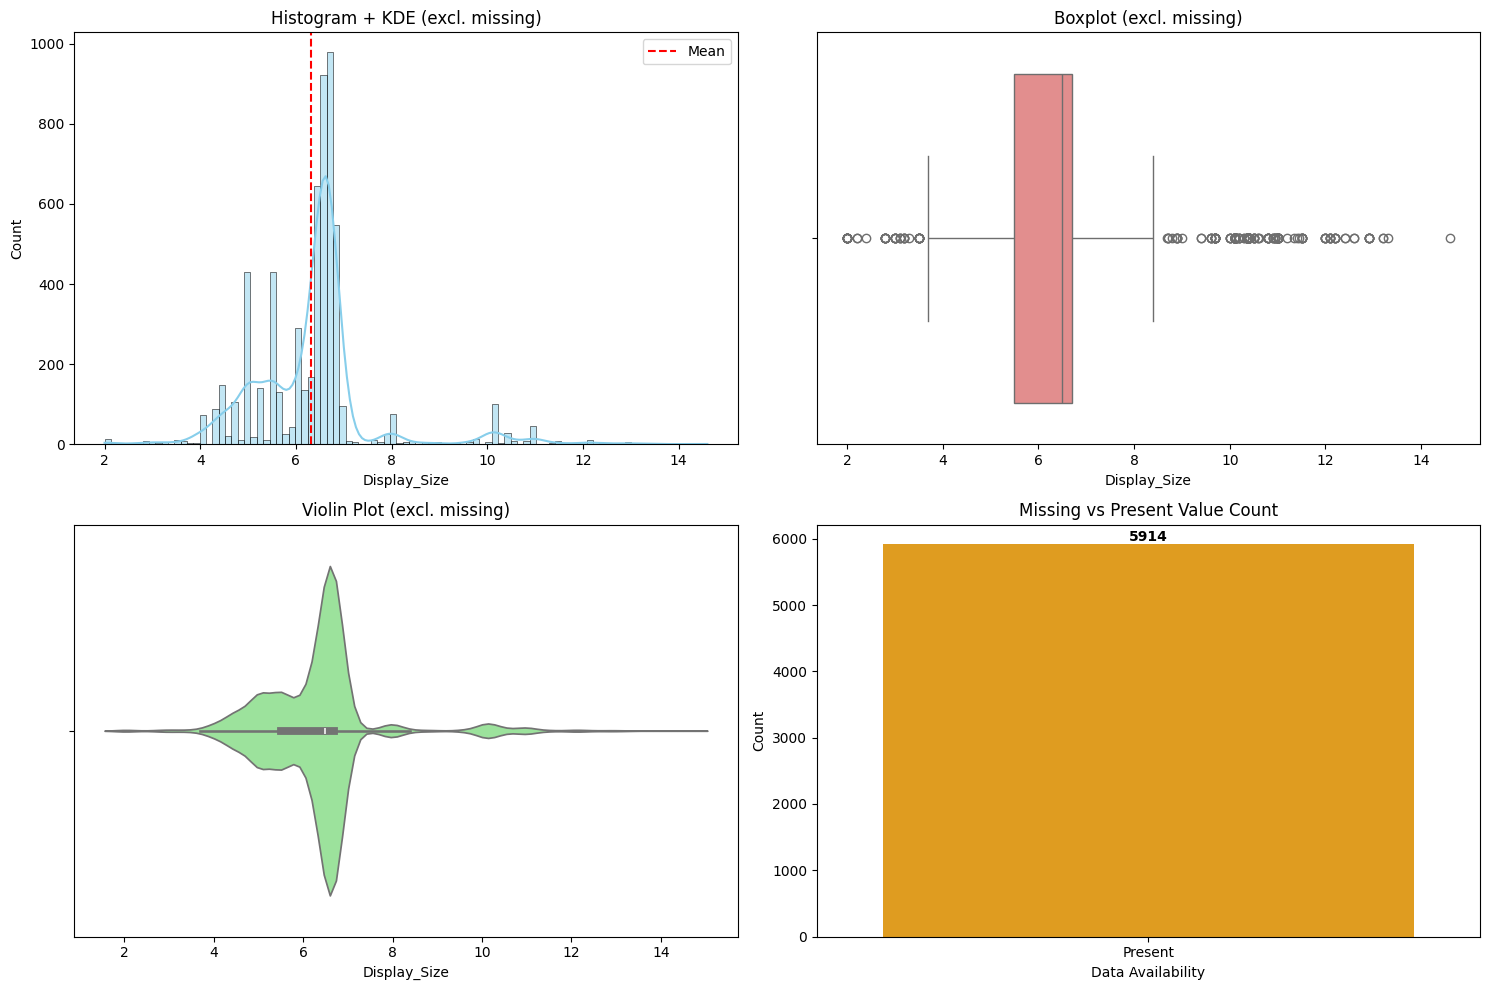

In [20]:
univariate_numerical_analysis(df, 'Display_Size')

- There are 289 devices whose display size > 8 inches
- All the devices > 8 inches except the foldable are tabs => Remove the tabs from the data.
- All devices having display size < 4 are feature phones => Remove them.


In [21]:
df[df['Display_Size'] < 3.5].sample(2)

Name Sound_3.5mmjack     Brand             Model  \
2970       Motorola RAZR2 V8              No  Motorola          RAZR2 V8   
3139  Nokia 8800 Carbon Arte              No     Nokia  8800 Carbon Arte   

     has_GSM has_UMTS has_HSPA has_LTE has_5G has_CDMA has_CDMA2000 has_EVDO  \
2970     1.0      0.0      0.0     0.0    0.0      0.0          0.0      0.0   
3139     1.0      1.0      0.0     0.0    0.0      0.0          0.0      0.0   

     number_of_sims number_of_2g_bands aws_support number_of_3g_bands  \
2970            1.0                4.0         0.0                0.0   
3139            1.0                3.0         0.0                1.0   

     is_foldable_phone  thickness has_Nano_SIM has_Micro_SIM has_Mini_SIM  \
2970             False       11.9          0.0           0.0          1.0   
3139             False       14.6          0.0           0.0          1.0   

     has_eSIM has_SIM_Type_Specified has_memory_card memory_type_microSDXC  \
2970      0.0                    1.0           False                 False   
3139      0.0                    1.0           False                 False   

     memory_type_microSDHC memory_type_microSD memory_type_SD  \
2970                 False               False          False   
3139                 False               False          False   

     memory_type_Nano_Memory Battery_Is_removable  Battery_Capacity  \
2970                   False            Removable             770.0   
3139                   False            Removable            1000.0   

     Battery_Type_Lithium Sound_has_stereo_speakers camera_hdr  \
2970          Lithium Ion                        No        1.0   
3139          Lithium Ion                        No        1.0   

     camera_laser_af camera_panorama GPU_company Number_of_cores CPU_Brand  \
2970             0.0             1.0         NaN             NaN       NaN   
3139             0.0             1.0         NaN             NaN       NaN   

      CPU_Transistor_Size CPU_Model Is_OS_Upgradable  \
2970                  NaN       NaN            False   
3139                  NaN       NaN              NaN   

                       os_version  Resolution_Width  Resolution_Height  PPI  \
2970  linux / java-based motomagx               240                320  182   
3139                          NaN               240                320  200   

      Display_Size  Price_In_Dollars has_8k has_4k has_1440p has_1080p  \
2970           2.2             129.6      0      0         0         0   
3139           2.0             907.2      0      0         0         0   

     has_720p has_480p has_EIS has_HDR has_stereo has_dolby_vision has_OIS  \
2970        0        0       0       0          0                0       0   
3139        0        1       0       0          0                0       0   

     max_resolution max_FPS ram  Total_Pixels number_of_camera_features  \
2970              0       0   0       76800.0                       3.0   
3139              0       0   0       76800.0                       3.0   

     maincamera_mp selfiecamera_mp latest_wifi_version Bluetooth_version  \
2970             2               0                   0               2.0   
3139             3               0                   0               2.0   

     has_nfc USB_Type  
2970     NaN   Type-B  
3139     NaN   Type-B

#### 4. Price_In_Dollars


📊 Analyzing Numerical Column: **Price_In_Dollars**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 575 (9.72%)
🔹 Unique Values: 1047

🔹 Descriptive Statistics (excluding NaNs):
count    5339.000000
mean      318.479904
std       309.585988
min        32.400000
25%       162.000000
50%       237.600000
75%       367.200000
max      9999.990000
Name: Price_In_Dollars, dtype: float64

🔹 Outliers Detected (IQR): 418
    - Lower bound: -145.80
    - Upper bound: 675.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


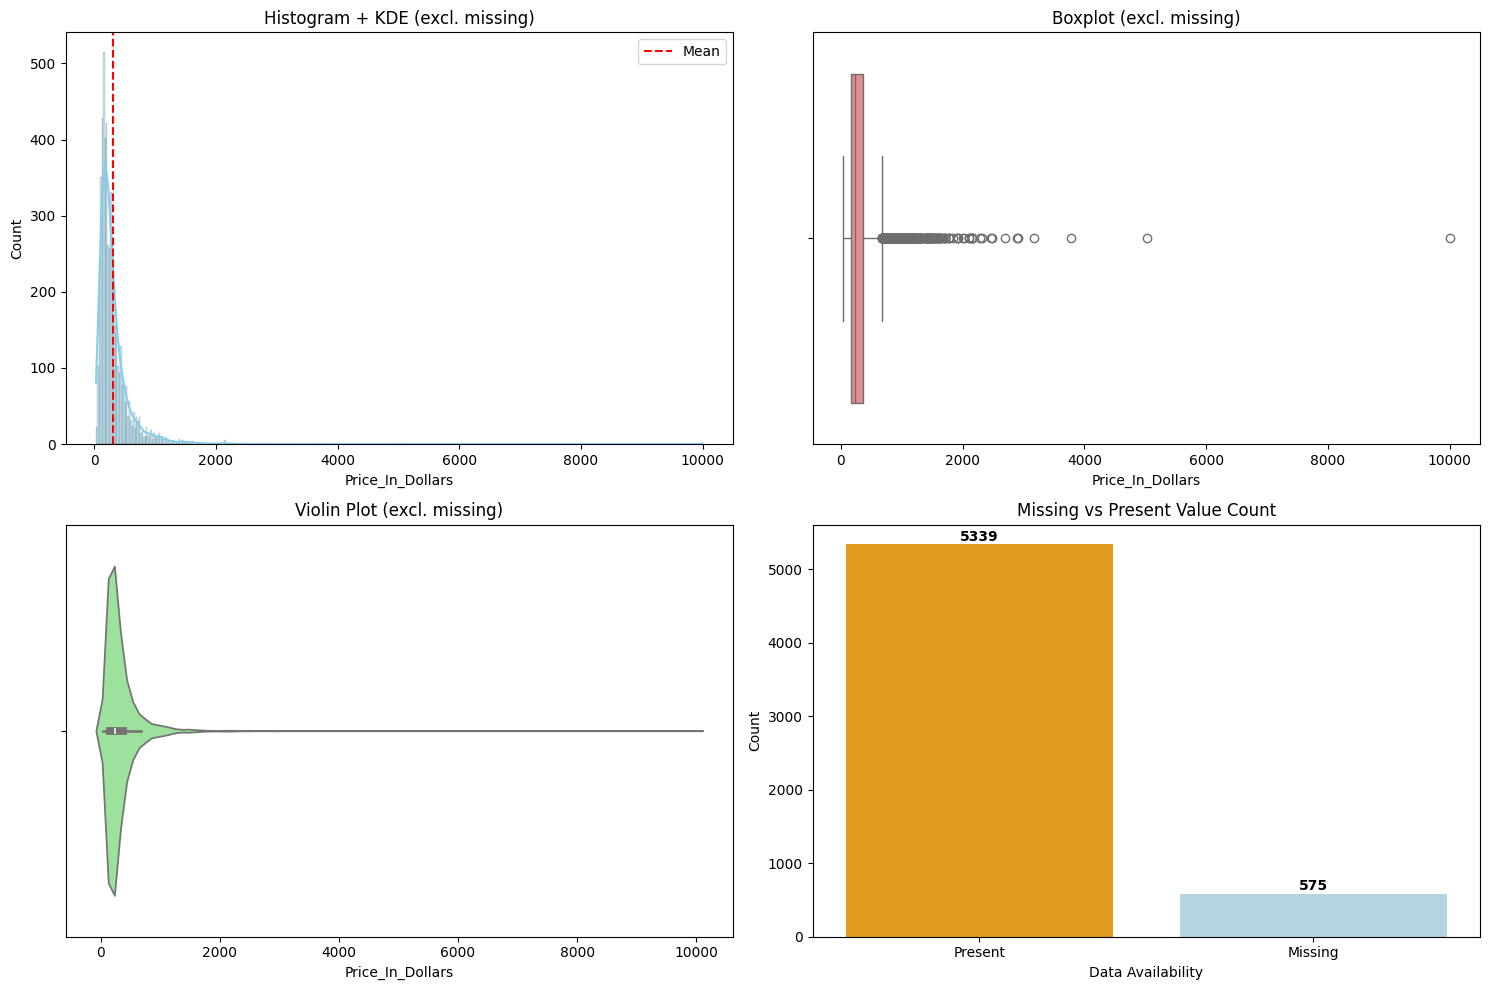

In [22]:
univariate_numerical_analysis(df, 'Price_In_Dollars')

- There is one phone which is costing 9999 dollars, which is an error.
- There is one phone which is > 5000 dollars, distorting the distribution. Remove these two phones.
- Log transform the prices which are still looking like outliers.


In [23]:
df[df['Price_In_Dollars'] > 2500][['Name', 'Price_In_Dollars']]

Name  Price_In_Dollars
1810  Honor Magic V2 RSR Porsche Design           2916.00
1816                     Honor Magic Vs           3175.20
2455                     Huawei Mate X3           5022.00
2466            Huawei Mate XT Ultimate           3780.00
4582                Xiaomi Mi Mix Alpha           2700.00
4778          Asus ROG Phone 7 Ultimate           2895.00
5638                         Xiaomi 14T           9999.99

#### 5. Total_Pixels


📊 Analyzing Numerical Column: **Total_Pixels**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 197

🔹 Descriptive Statistics (excluding NaNs):
count    5.914000e+03
mean     2.009501e+06
std      1.080114e+06
min      2.048000e+04
25%      1.094400e+06
50%      2.304000e+06
75%      2.592000e+06
max      9.331200e+06
Name: Total_Pixels, dtype: float64

🔹 Outliers Detected (IQR): 53
    - Lower bound: -1152000.00
    - Upper bound: 4838400.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


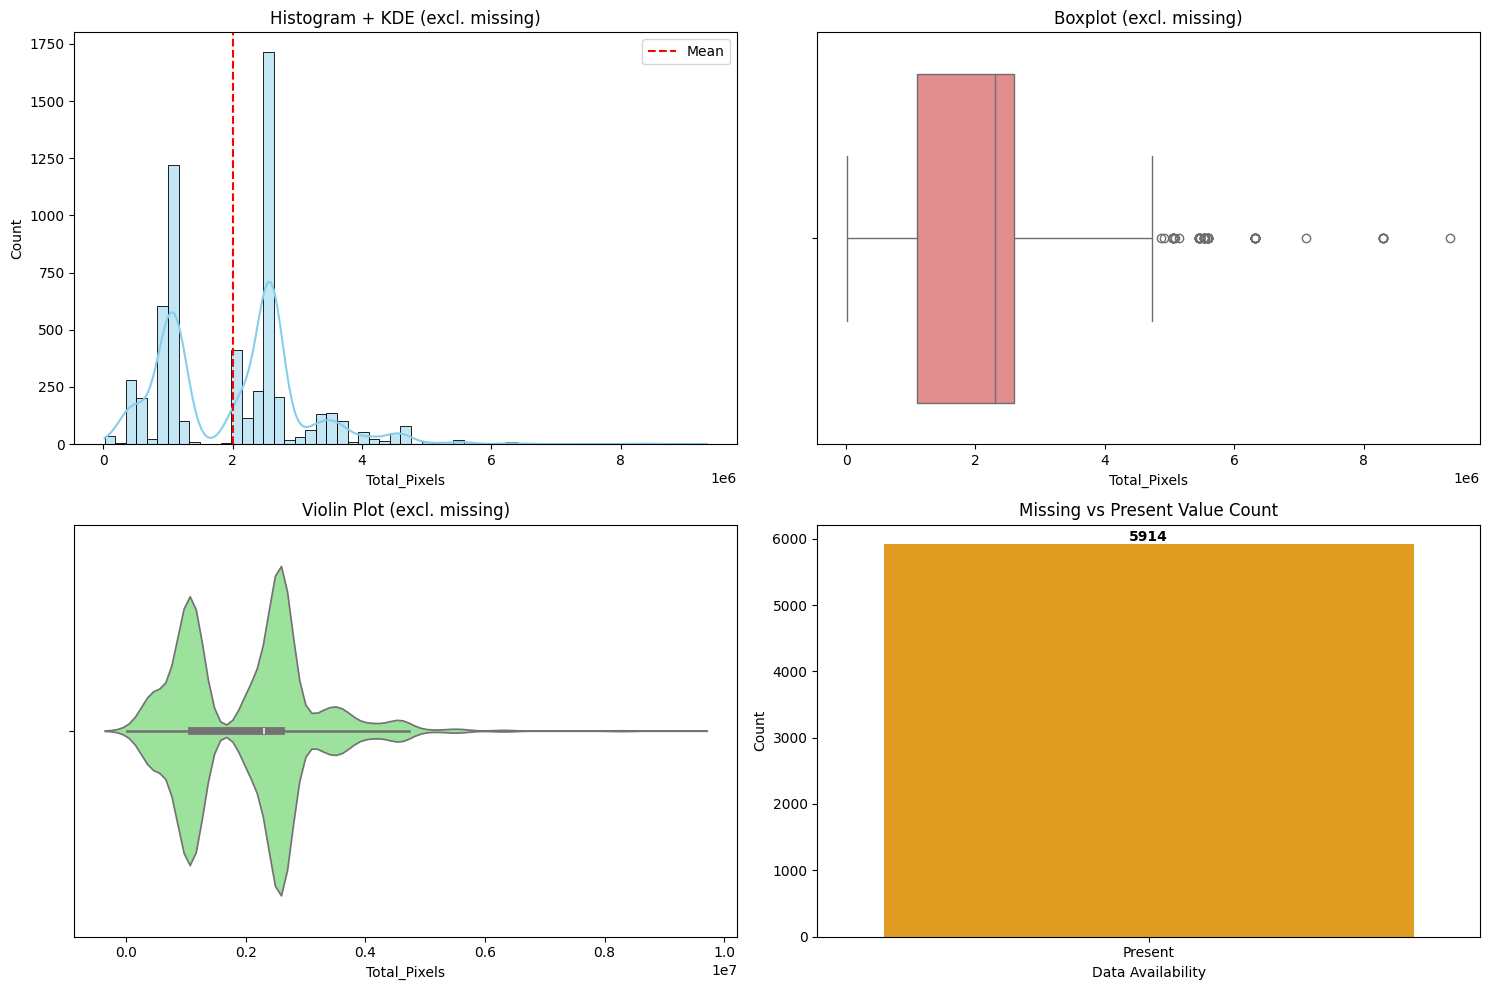

In [24]:
univariate_numerical_analysis(df, 'Total_Pixels')

📊 Analyzing Numerical Column: **Total_Pixels**
--------------------------------------------------
🔹 Data Type: float64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 197

🔹 Descriptive Statistics (excluding NaNs):
count    5.914000e+03
mean     2.009501e+06
std      1.080114e+06
min      2.048000e+04
25%      1.094400e+06
50%      2.304000e+06
75%      2.592000e+06
max      9.331200e+06
Name: Total_Pixels, dtype: float64

🔹 Outliers Detected (IQR): 53
    - Lower bound: -1152000.00
    - Upper bound: 4838400.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


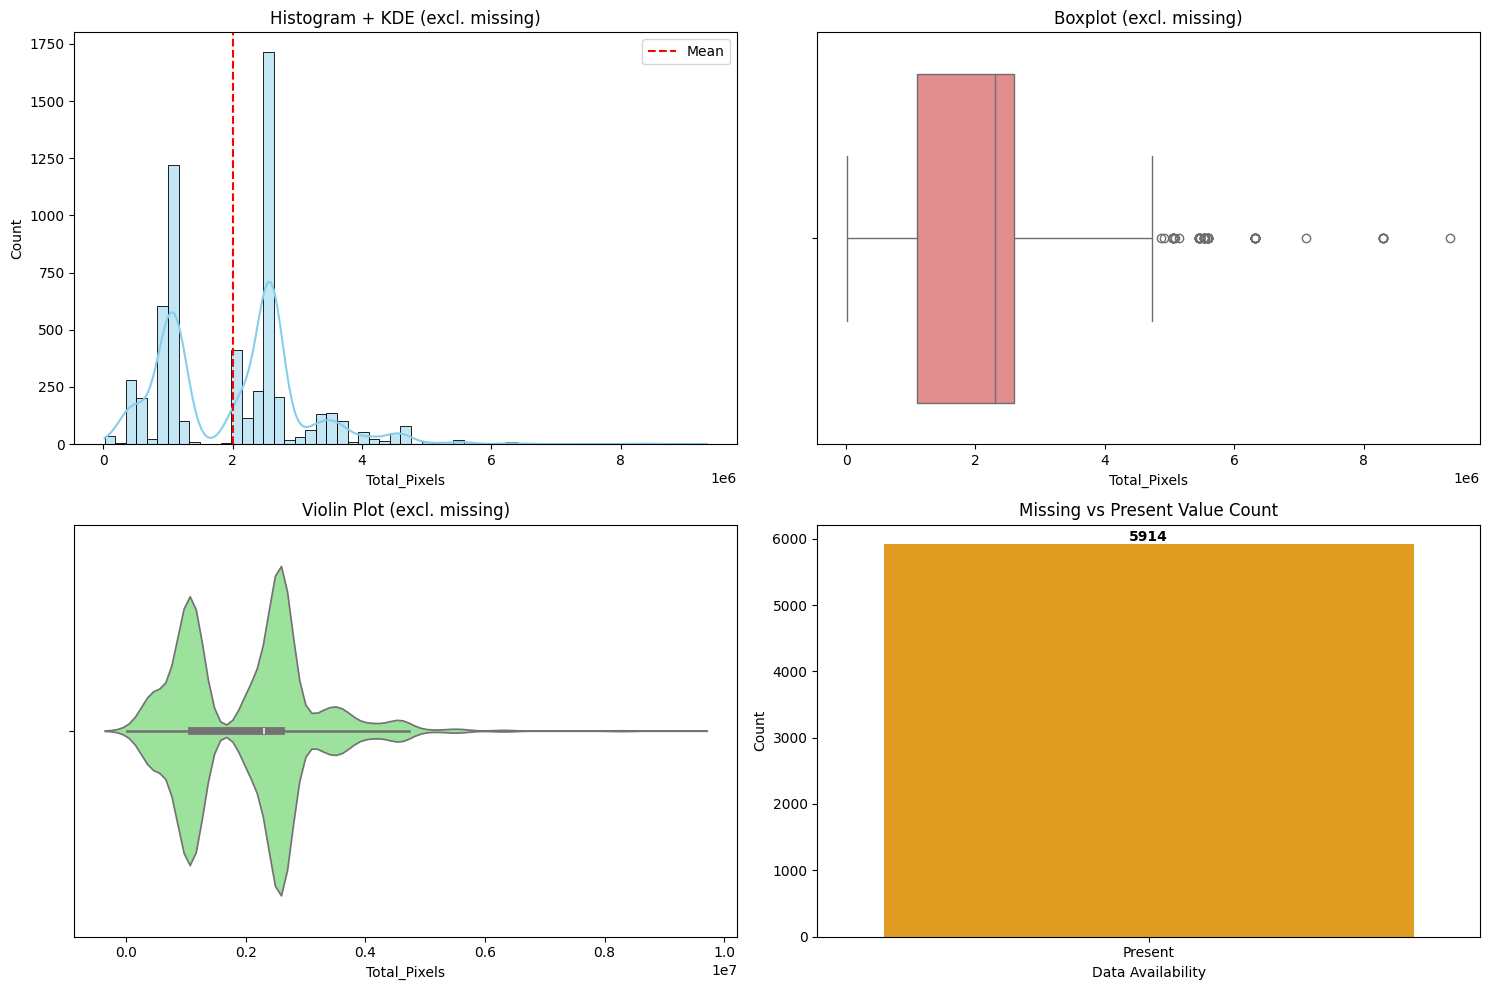

In [25]:
univariate_numerical_analysis(df, 'Total_Pixels')

- All the phones which are having > 6000000 pixels and are from sony are discontinued. So remove these particular phones.


#### 6. number_of_2g_bands

- Combine 5 with 4 and 1 with 2 to take care of the rare categories.


In [26]:
df['number_of_2g_bands'].value_counts()

number_of_2g_bands
4.0    5563
3.0     175
2.0     159
1.0       2
5.0       2
Name: count, dtype: int64

#### 7. PPI

    - The PPI column is having some text in some of the rows => Modify it, and


📊 Analyzing Numerical Column: **PPI**
--------------------------------------------------
🔹 Data Type: int64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 296

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean      344.583531
std        89.679899
min        73.000000
25%       269.000000
50%       388.000000
75%       402.000000
max       847.000000
Name: PPI, dtype: float64

🔹 Outliers Detected (IQR): 16
    - Lower bound: 69.50
    - Upper bound: 601.50


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


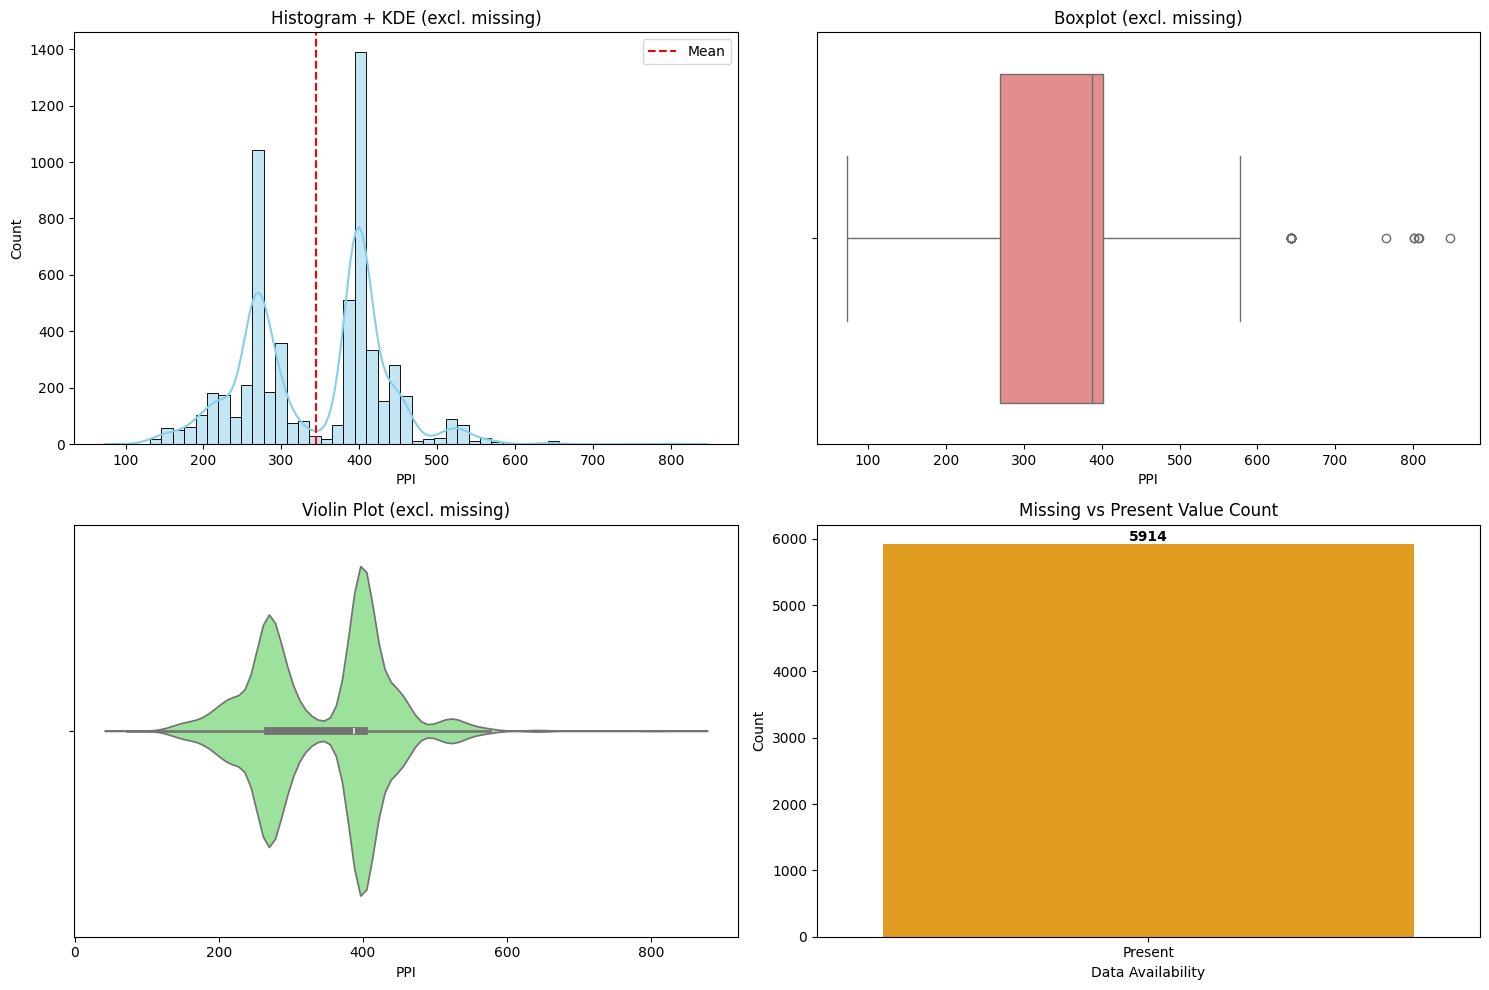

In [27]:
univariate_numerical_analysis(df, 'PPI')

### Observations

    - The Phones with PPI > 600 are mostly from Sony and most of the phones got discontinued, so their value has been dropped.
    - These phones will have a negative impact on the ML model.
    - Drop the phones which are having PPI > 600 and price < 500 dollars.


#### 8. Resolution_Width


📊 Analyzing Numerical Column: **Resolution_Width**
--------------------------------------------------
🔹 Data Type: int64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 93

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean      963.080656
std       303.320286
min       128.000000
25%       720.000000
50%      1080.000000
75%      1080.000000
max      3840.000000
Name: Resolution_Width, dtype: float64

🔹 Outliers Detected (IQR): 125
    - Lower bound: 180.00
    - Upper bound: 1620.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


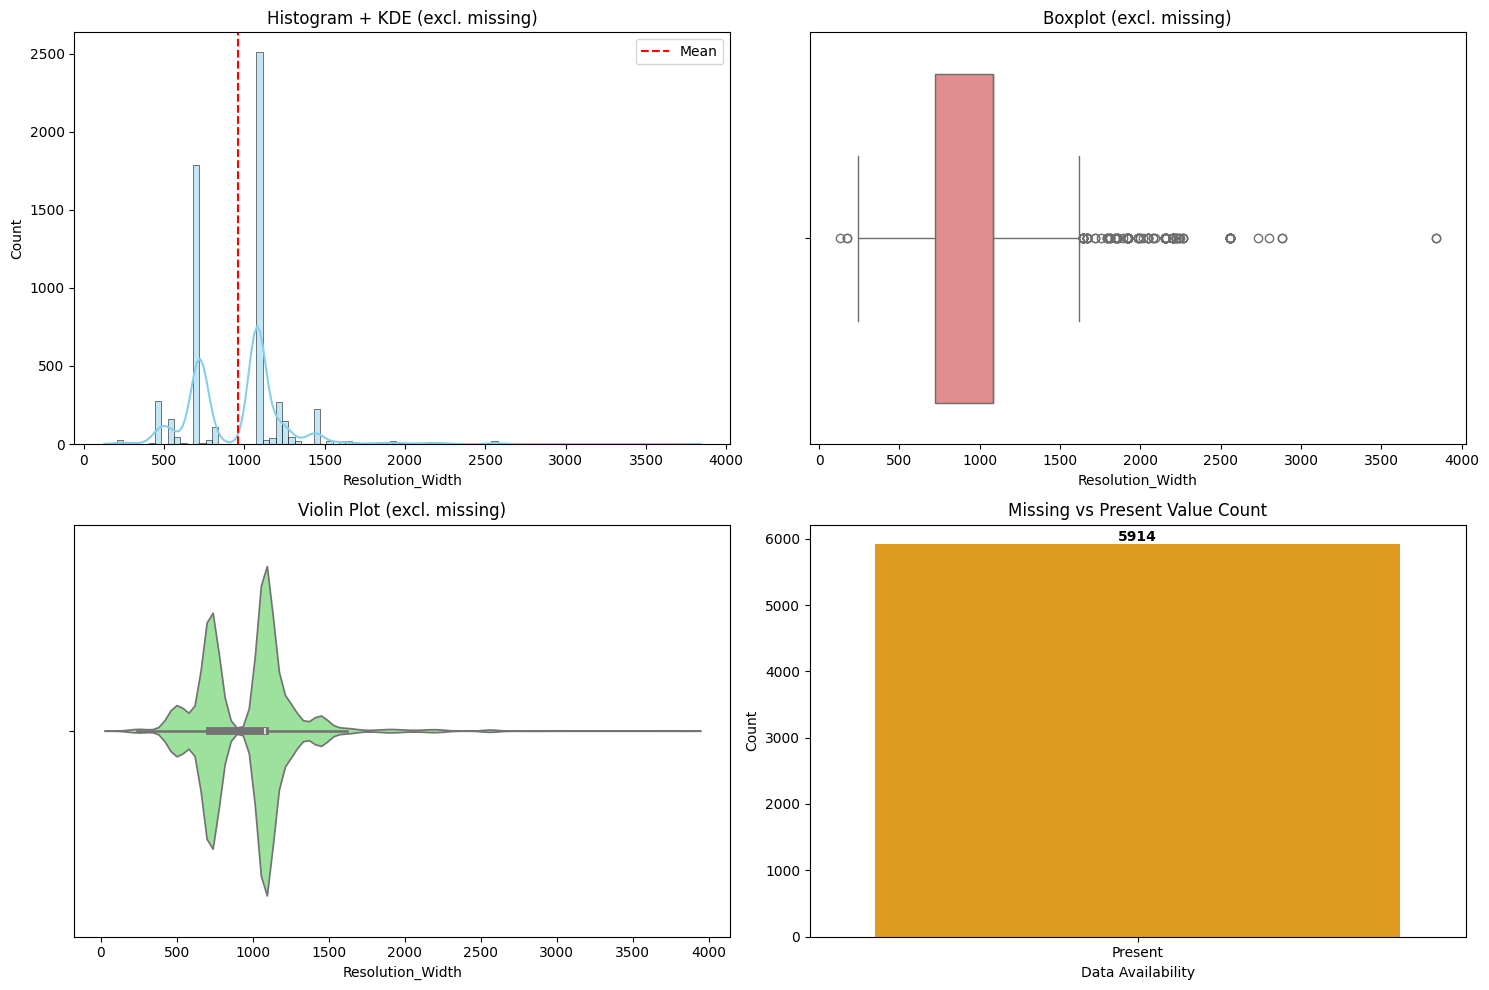

In [28]:
univariate_numerical_analysis(df, 'Resolution_Width')

- Most of the phones which are having Resolution_Width > 2500 are tabs. Remove those.


In [34]:
df[df['Resolution_Width'] > 2500].sample(10)

Name Sound_3.5mmjack    Brand  \
3781  Samsung Galaxy Note Pro 12.2 LTE             Yes  Samsung   
2163    Huawei MatePad Pro 13.2 (2025)              No   Huawei   
2432    Huawei MatePad Pro 10.8 (2021)              No   Huawei   
2219           Huawei MediaPad M6 10.8             Yes   Huawei   
1762        Apple iPad Pro 12.9 (2017)             Yes    Apple   
2433    Huawei MatePad Pro 12.6 (2021)              No   Huawei   
3778    Samsung Galaxy Tab Pro 12.2 3G             Yes  Samsung   
2177           Huawei MatePad Pro 13.2              No   Huawei   
3780   Samsung Galaxy Note Pro 12.2 3G             Yes  Samsung   
2575          Lenovo Yoga Tablet 2 Pro             Yes   Lenovo   

                         Model has_GSM has_UMTS has_HSPA has_LTE has_5G  \
3781  Galaxy Note Pro 12.2 LTE     1.0      0.0      1.0     1.0    0.0   
2163   MatePad Pro 13.2 (2025)     1.0      0.0      1.0     1.0    0.0   
2432   MatePad Pro 10.8 (2021)     1.0      0.0      1.0     1.0    1.0   
2219          MediaPad M6 10.8     1.0      0.0      1.0     1.0    0.0   
1762      iPad Pro 12.9 (2017)     1.0      0.0      1.0     1.0    0.0   
2433   MatePad Pro 12.6 (2021)     1.0      0.0      1.0     1.0    1.0   
3778    Galaxy Tab Pro 12.2 3G     1.0      0.0      1.0     0.0    0.0   
2177          MatePad Pro 13.2     1.0      0.0      1.0     1.0    0.0   
3780   Galaxy Note Pro 12.2 3G     1.0      0.0      1.0     0.0    0.0   
2575         Yoga Tablet 2 Pro     1.0      0.0      1.0     1.0    0.0   

     has_CDMA has_CDMA2000 has_EVDO number_of_sims number_of_2g_bands  \
3781      0.0          0.0      0.0            1.0                4.0   
2163      0.0          0.0      0.0            1.0                4.0   
2432      0.0          0.0      0.0            1.0                4.0   
2219      0.0          0.0      0.0            1.0                4.0   
1762      1.0          0.0      1.0            2.0                4.0   
2433      0.0          0.0      0.0            1.0                4.0   
3778      0.0          0.0      0.0            1.0                4.0   
2177      0.0          0.0      0.0            1.0                4.0   
3780      0.0          0.0      0.0            1.0                4.0   
2575      0.0          0.0      0.0            1.0                4.0   

     aws_support number_of_3g_bands is_foldable_phone  thickness has_Nano_SIM  \
3781         0.0                4.0             False        8.0          0.0   
2163         0.0                4.0             False        5.5          1.0   
2432         0.0                4.0             False        7.2          1.0   
2219         0.0                4.0             False        7.2          1.0   
1762         1.0                5.0             False        6.9          1.0   
2433         1.0                6.0             False        6.7          1.0   
3778         0.0                4.0             False        8.0          0.0   
2177         0.0                4.0             False        5.5          1.0   
3780         0.0                4.0             False        8.0          0.0   
2575         0.0                2.0             False       12.6          0.0   

     has_Micro_SIM has_Mini_SIM has_eSIM has_SIM_Type_Specified  \
3781           1.0          0.0      0.0                    1.0   
2163           0.0          0.0      0.0                    1.0   
2432           0.0          0.0      0.0                    1.0   
2219           0.0          0.0      0.0                    1.0   
1762           0.0          0.0      1.0                    1.0   
2433           0.0          0.0      0.0                    1.0   
3778           1.0          0.0      0.0                    1.0   
2177           0.0          0.0      0.0                    1.0   
3780           1.0          0.0      0.0                    1.0   
2575           1.0          0.0      0.0                    1.0   

     has_memory_card memory_type_mic

#### Resolution_Height


📊 Analyzing Numerical Column: **Resolution_Height**
--------------------------------------------------
🔹 Data Type: int64
🔹 Missing Values: 0 (0.00%)
🔹 Unique Values: 142

🔹 Descriptive Statistics (excluding NaNs):
count    5914.000000
mean     1940.712885
std       597.919816
min       160.000000
25%      1520.000000
50%      1920.000000
75%      2400.000000
max      4320.000000
Name: Resolution_Height, dtype: float64

🔹 Outliers Detected (IQR): 15
    - Lower bound: 200.00
    - Upper bound: 3720.00


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])
/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:104: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=axs[1, 1], palette=['orange', 'lightblue'])


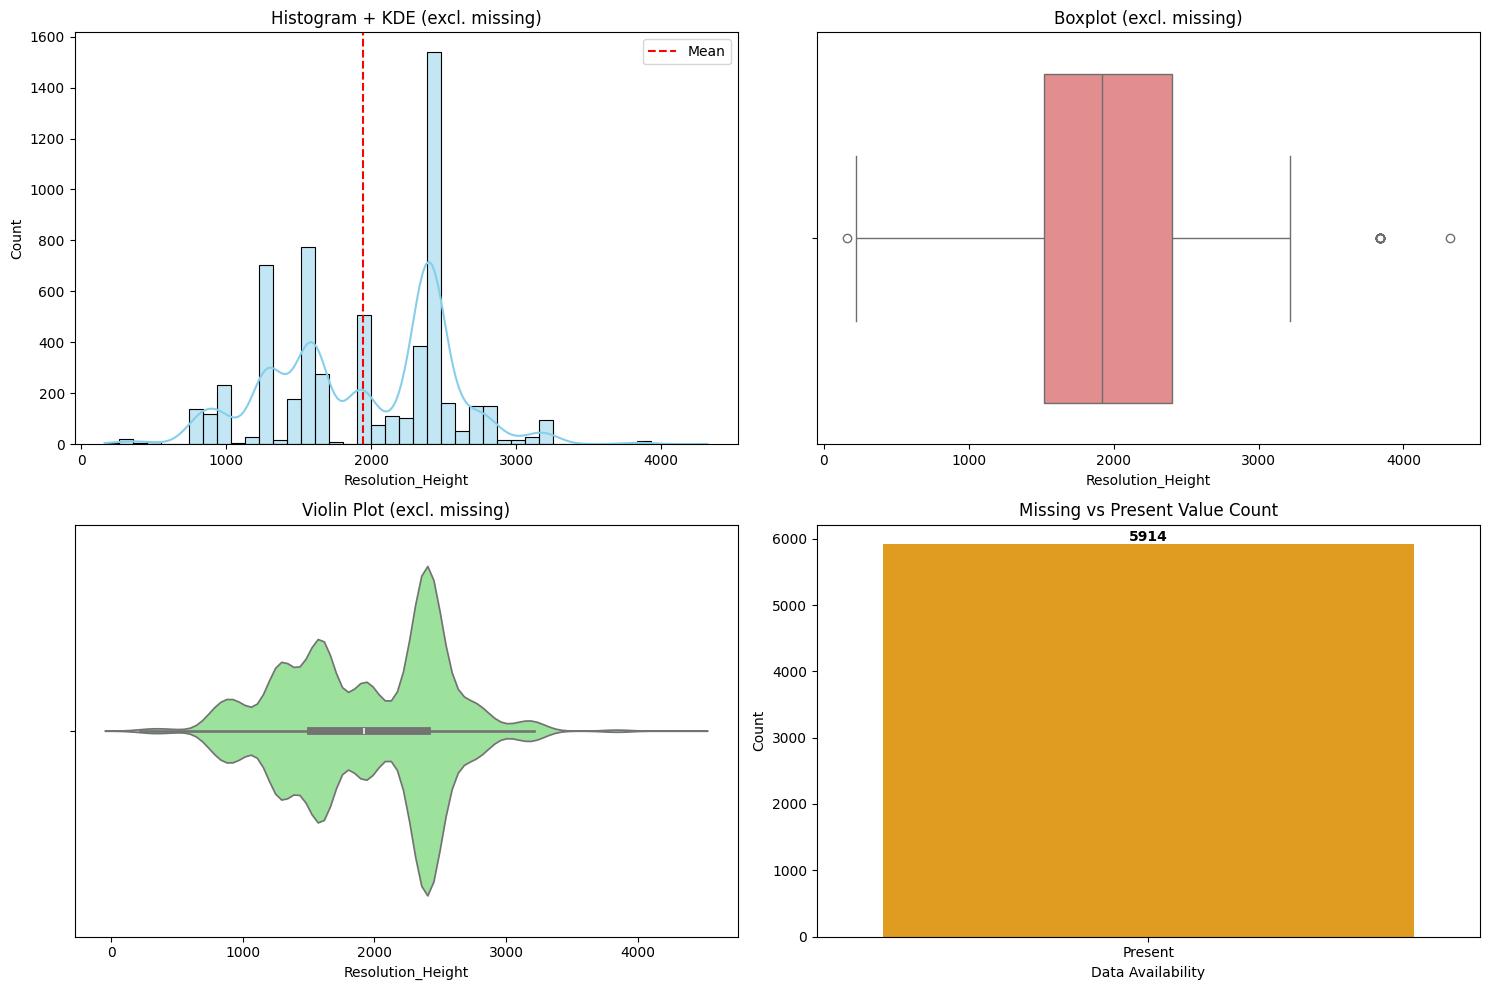

In [36]:
univariate_numerical_analysis(df, 'Resolution_Height')

Observations: - The phone having Resolution height < 200 is a feature phone => Remove it. - All the phones having resolution height > 3500 are not having actual prices. So remove them.


In [ ]:
df[df['Resolution_Height'] < 200]

Name Sound_3.5mmjack Brand    Model has_GSM has_UMTS has_HSPA  \
414  ZTE Link II             Yes   ZTE  Link II     1.0      0.0      1.0   

    has_LTE has_5G has_CDMA has_CDMA2000 has_EVDO number_of_sims  \
414     1.0    0.0      0.0          0.0      0.0            1.0   

    number_of_2g_bands aws_support number_of_3g_bands is_foldable_phone  \
414                2.0         1.0                3.0             False   

     thickness has_Nano_SIM has_Micro_SIM has_Mini_SIM has_eSIM  \
414       19.8          1.0           0.0          0.0      0.0   

    has_SIM_Type_Specified has_memory_card memory_type_microSDXC  \
414                    1.0            True                 False   

    memory_type_microSDHC memory_type_microSD memory_type_SD  \
414                  True               False          False   

    memory_type_Nano_Memory Battery_Is_removable  Battery_Capacity  \
414                   False            Removable            1600.0   

    Battery_Type_Lithium Sound_has_stereo_speakers camera_hdr camera_laser_af  \
414          Lithium Ion                        No        0.0             0.0   

    camera_panorama GPU_company Number_of_cores CPU_Brand  \
414             0.0    Qualcomm            quad  qualcomm   

     CPU_Transistor_Size             CPU_Model Is_OS_Upgradable   os_version  \
414             0.035714  qm215 snapdragon 215            False  proprietary   

     Resolution_Width  Resolution_Height  PPI  Display_Size  Price_In_Dollars  \
414               128                160   73           2.8              43.2   

    has_8k has_4k has_1440p has_1080p has_720p has_480p has_EIS has_HDR  \
414      0      0         0         0        1        0       0       0   

    has_stereo has_dolby_vision has_OIS max_resolution max_FPS ram  \
414          0                0       0           720p      30   1   

     Total_Pixels number_of_camera_features maincamera_mp selfiecamera_mp  \
414       20480.0                       1.0             2               0   

    latest_wifi_version Bluetooth_version has_nfc USB_Type  
414                   1               4.2     0.0   Type-B

In [44]:
df[df['Resolution_Height'] > 3500][['Name', 'Price_In_Dollars']]

Name  Price_In_Dollars
3857                Sony Xperia 1            540.00
3861             Sony Xperia 1 II            756.00
3863              Sony Xperia Pro           2160.00
3865            Sony Xperia Pro-I           1004.40
3866       Sony Xperia Z5 Premium            205.20
3867  Sony Xperia Z5 Premium Dual            237.60
3902        Sony Xperia X Premium               NaN
3904            Sony Xperia H8541               NaN
5534            Sony Xperia 1 III           1049.00
5535            Sony Xperia 1 III           1440.94
5537             Sony Xperia 1 IV           1065.00
5538             Sony Xperia 1 IV            689.99
5543              Sony Xperia 1 V            799.99
5544              Sony Xperia 1 V           2285.00